## <a id = '0'> Índice </a>

* [**Entorno**](#1)  
   * [Librerías](#1d1)  
   * [Funciones](#1d2)  
   * [Constantes](#1d3)

* [**Lectura de datos**](#2)

* [**Análisis de autocorrelaciones y autocorrelaciones parciales**](#3)  
   * [Análisis de autocorrelaciones y autocorrelaciones parciales de series originales](#3d1)  
   * [Raíces unitarias](#3d2)  
   * [Análisis de autocorrelaciones y autocorrelaciones parciales con diferencias](#3d3)

* [**Análisis de descomposición de series**](#4)  
   * [Máximos y mínimos globales de la descomposición estacional](#4d1)  
   * [Análisis de la periodicidad en la estacionalidad: Promedios por señal y clase](#4d2)  
   * [Descomposición de series (Estacionalidad)](#4d3)

----

## <a id = '1'> Entorno </a>
[índice](#0)

### <a id = '1d1'> Librerías </a>


In [1]:
import os
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

import math
import itertools
# from config import data_folder

In [2]:
os.chdir("../")

### <a id = '1d2'> Funciones </a>

In [3]:
from src.utils import *

### <a id = '1d3'> Constantes </a>

In [4]:
from config.cons import data_folder, cara_lateral, cara_anterior, cara_interior, cara_sepal, window_jason

## <a id = '2'> Lectura de datos </a>
[índice](#0)

In [5]:
proyect_path = os.getcwd()
data_path = proyect_path + data_folder

In [6]:
lateral_combinaciones = list(itertools.combinations(cara_lateral, 2))
anterior_combinaciones = list(itertools.combinations(cara_anterior, 2))
interior_combinaciones = list(itertools.combinations(cara_interior, 2))
sepal_combinaciones = list(itertools.combinations(cara_sepal, 2))

In [7]:
df_all = lectura_carpetas_dict(data_path)

In [8]:
df_mi = df_all["mi"]
df_sttc_mi = df_all["sttc_mi"]
df_sttc = df_all["sttc"]
df_other = df_all["other"]

In [9]:
list_signals = ['AVL', 'V3', 'V1', 'V2', 'II', 'V4', 'V5', 'V6', 'III', 'AVR', 'AVF', 'I']

## <a id = '3'>  Análisis autocorrelaciones y autocorrelaciones parciales </a>
[índice](#0)

In [10]:
df_mi_signals = get_dict_labels(df_mi, list_signals)
df_sttc_mi_signals = get_dict_labels(df_sttc_mi, list_signals)
df_sttc_signals = get_dict_labels(df_sttc, list_signals)
df_other_signals = get_dict_labels(df_other, list_signals)

In [11]:
df_signal_list = [df_mi_signals, df_sttc_mi_signals, df_sttc_signals, df_other_signals]
df_signal_dict = {"MI": df_mi_signals,
                  "STTC_MI": df_sttc_mi_signals, 
                  "STTC": df_sttc_signals, 
                  "OTHER": df_other_signals}

### <a id = '3d1'>  Análisis de autocorrelaciones y autocorrelaciones parciales series originales </a>

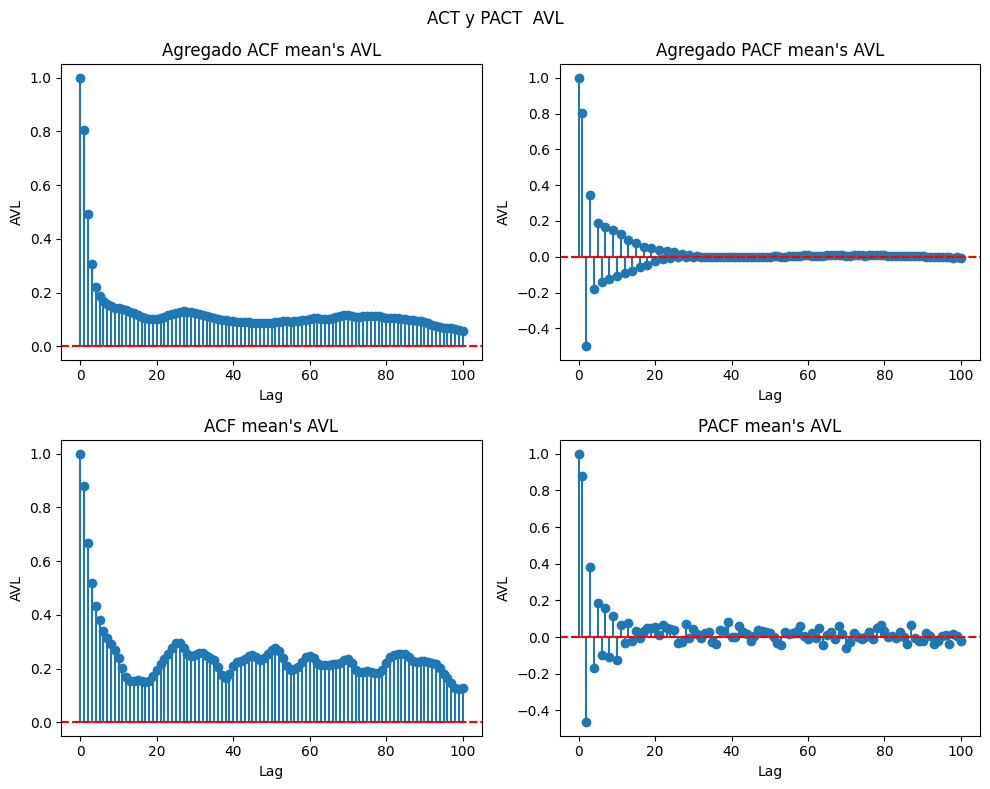

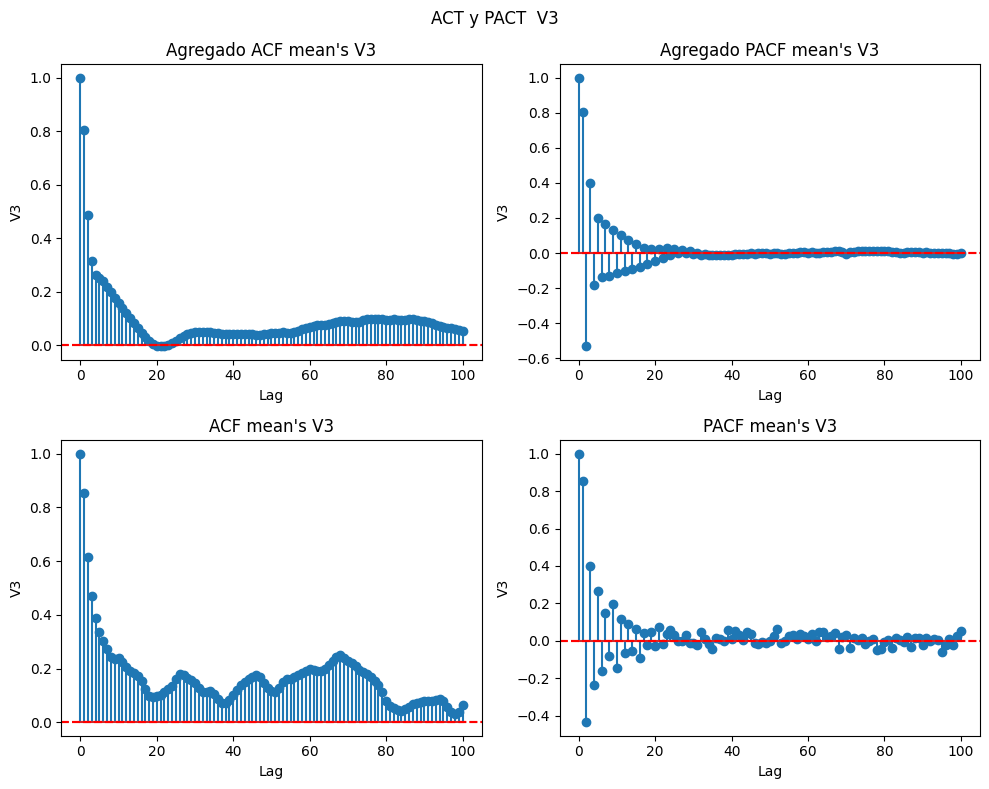

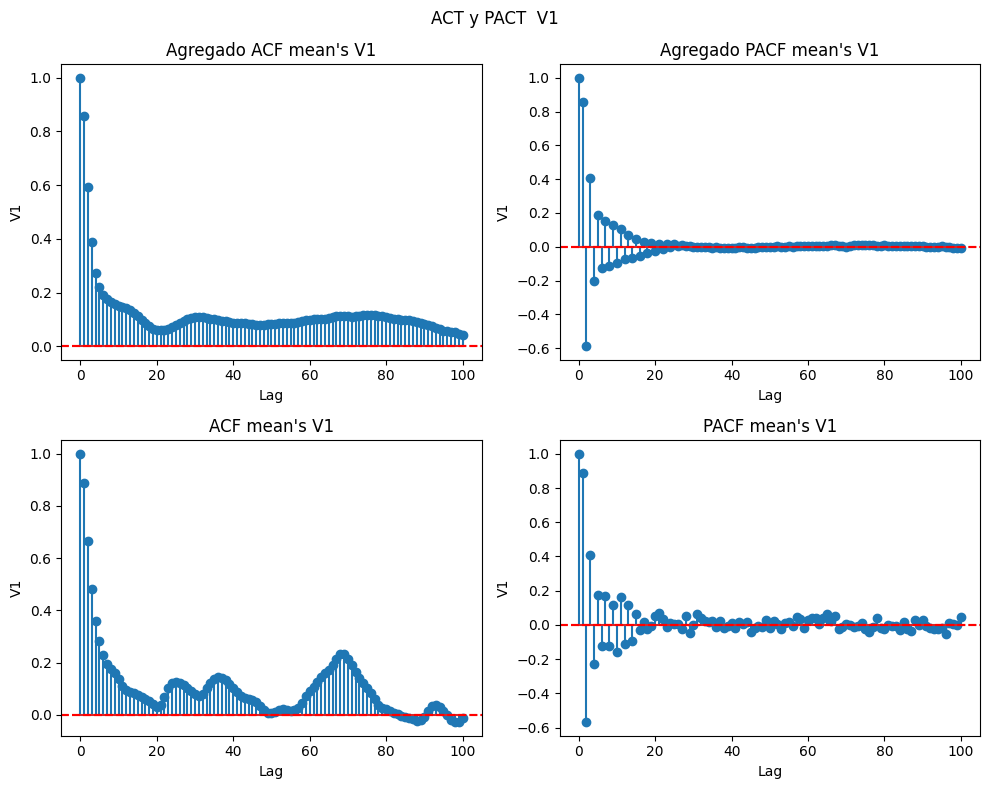

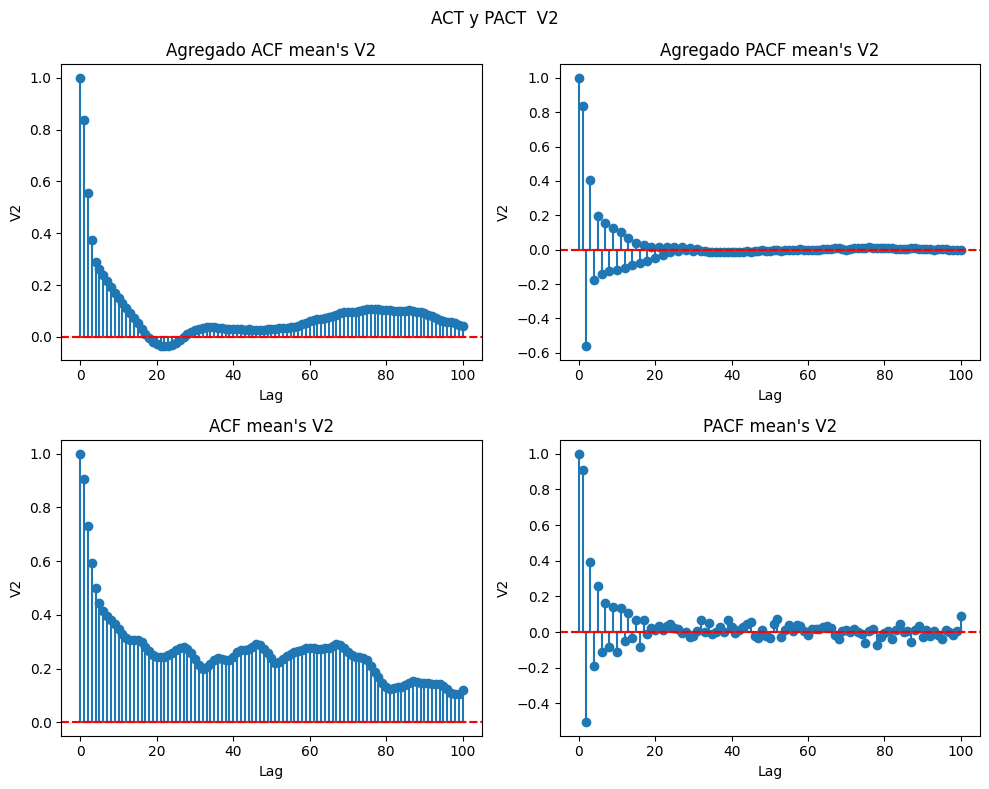

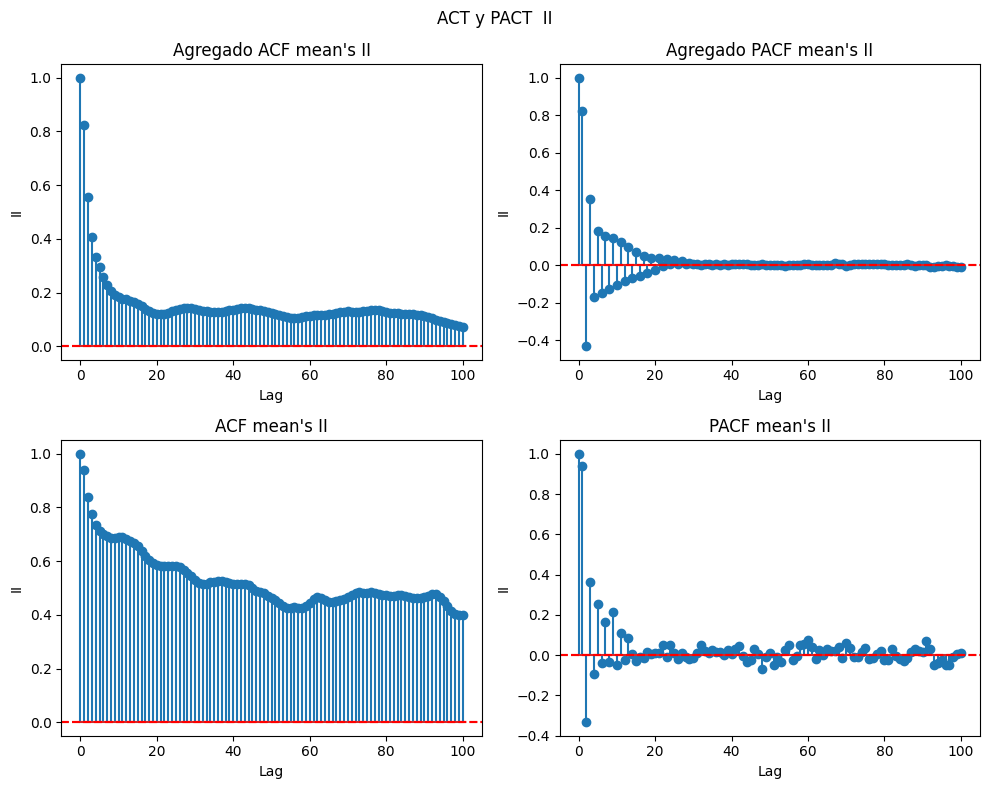

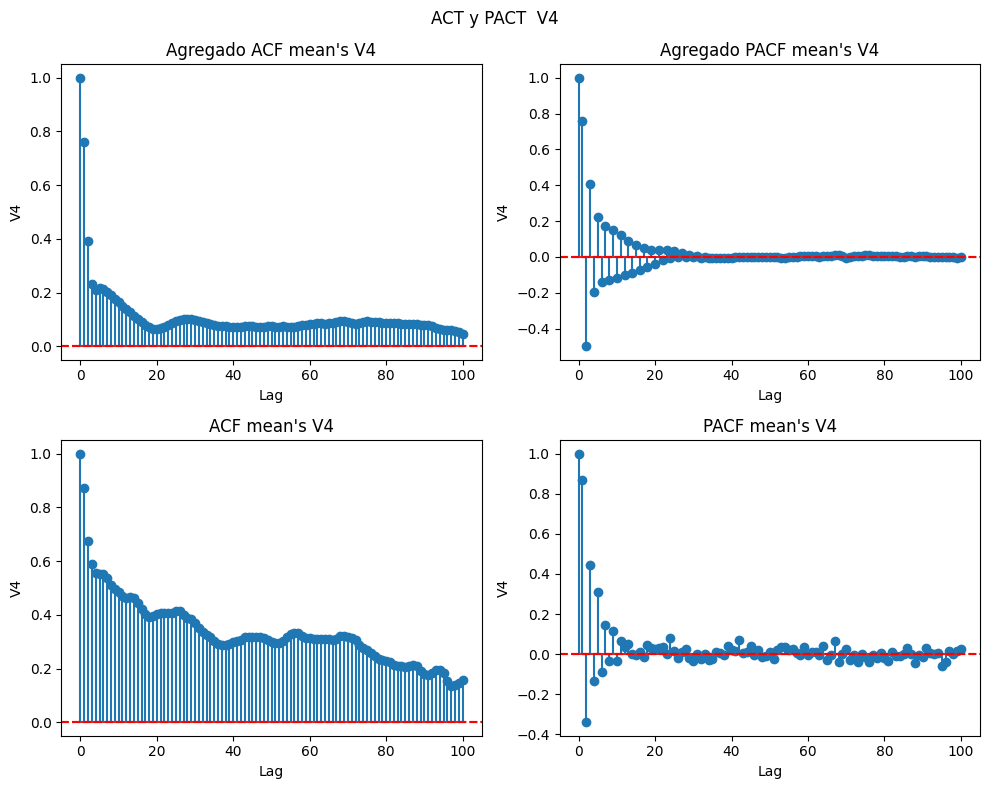

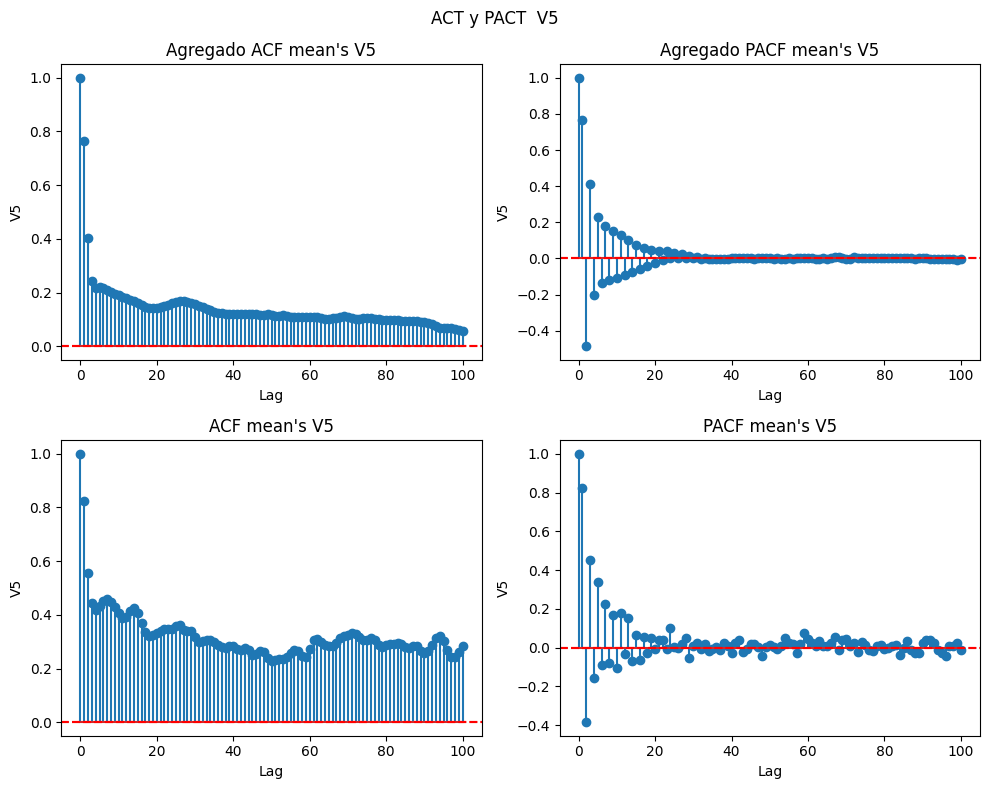

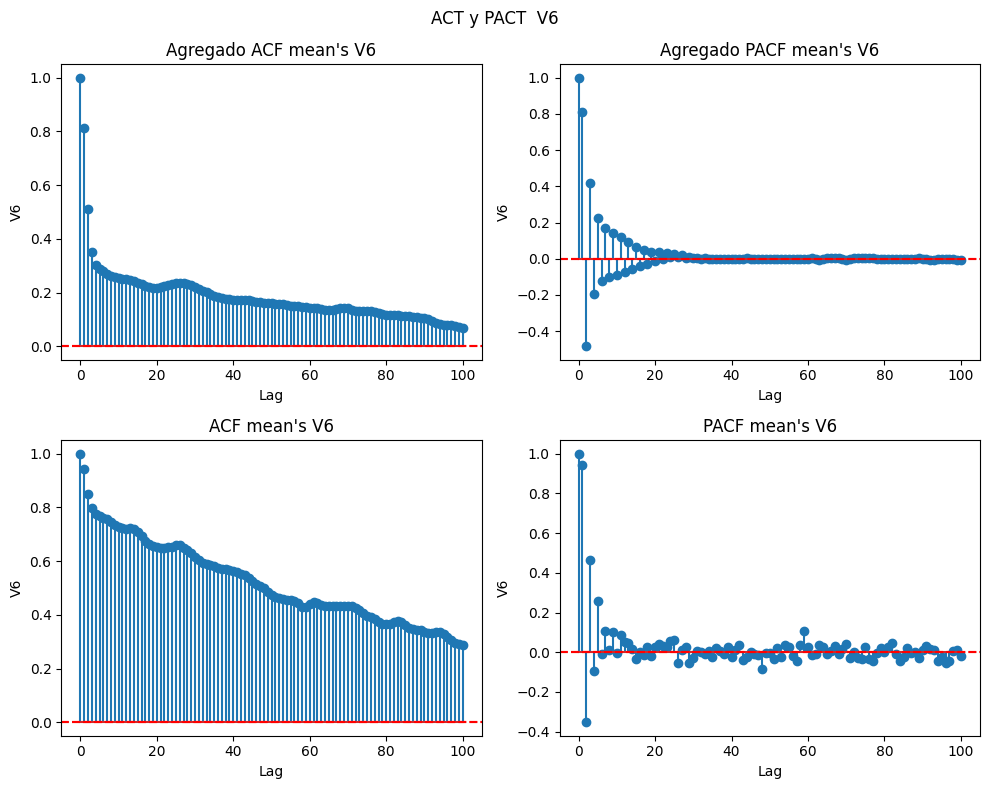

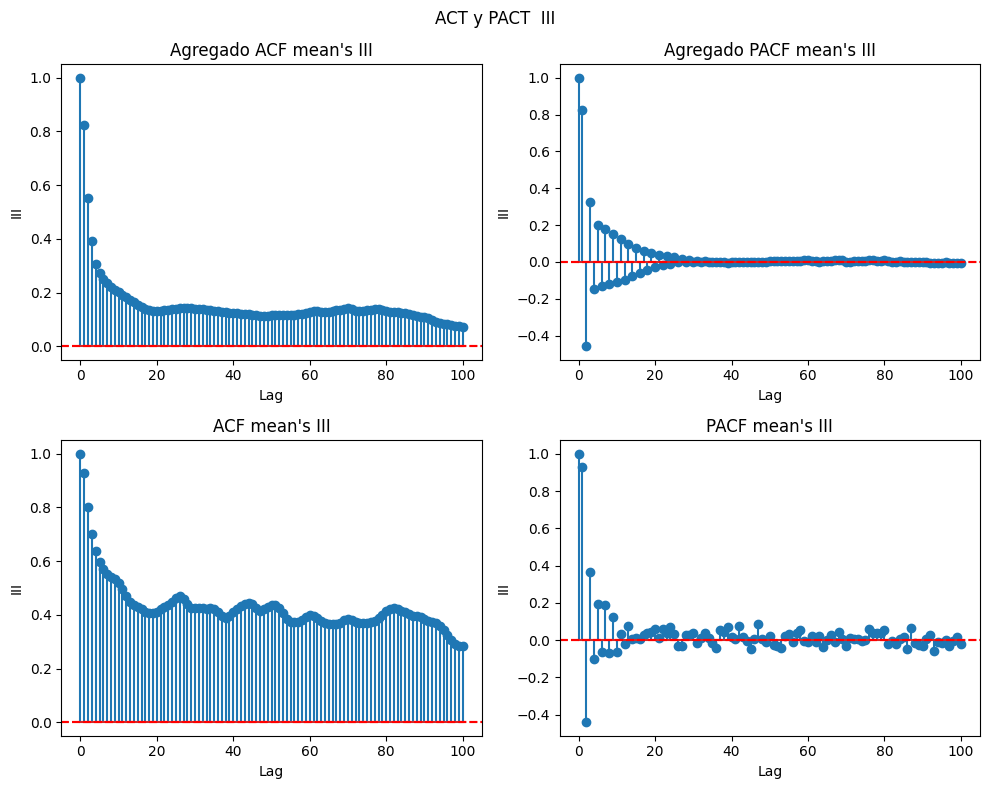

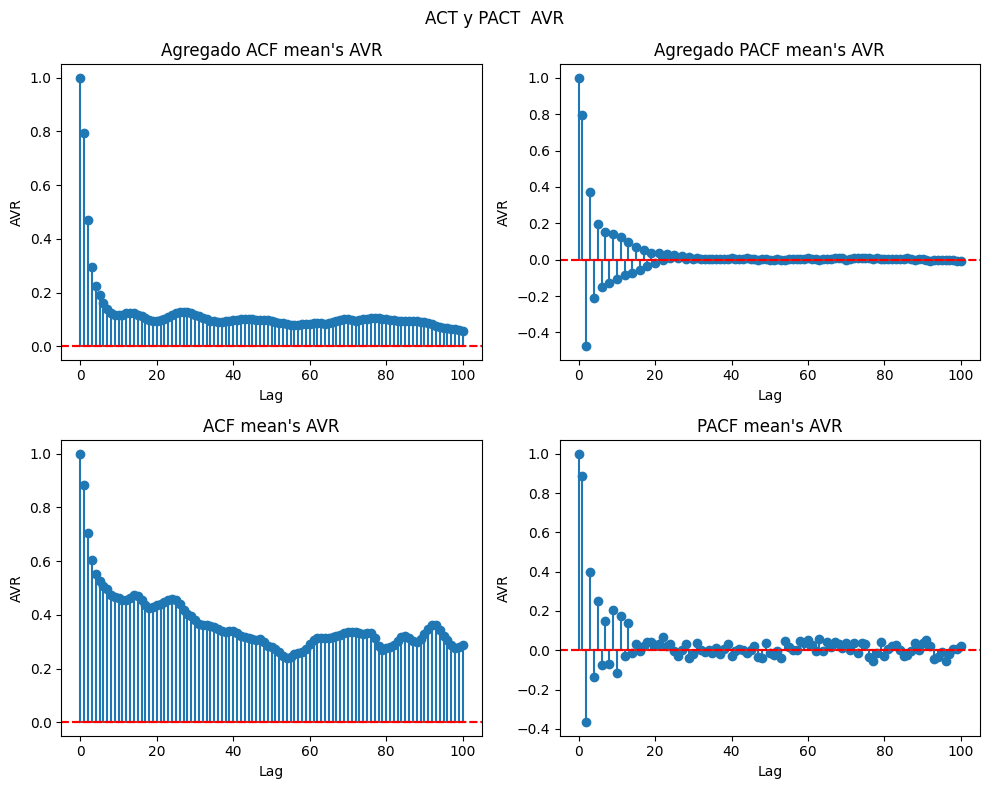

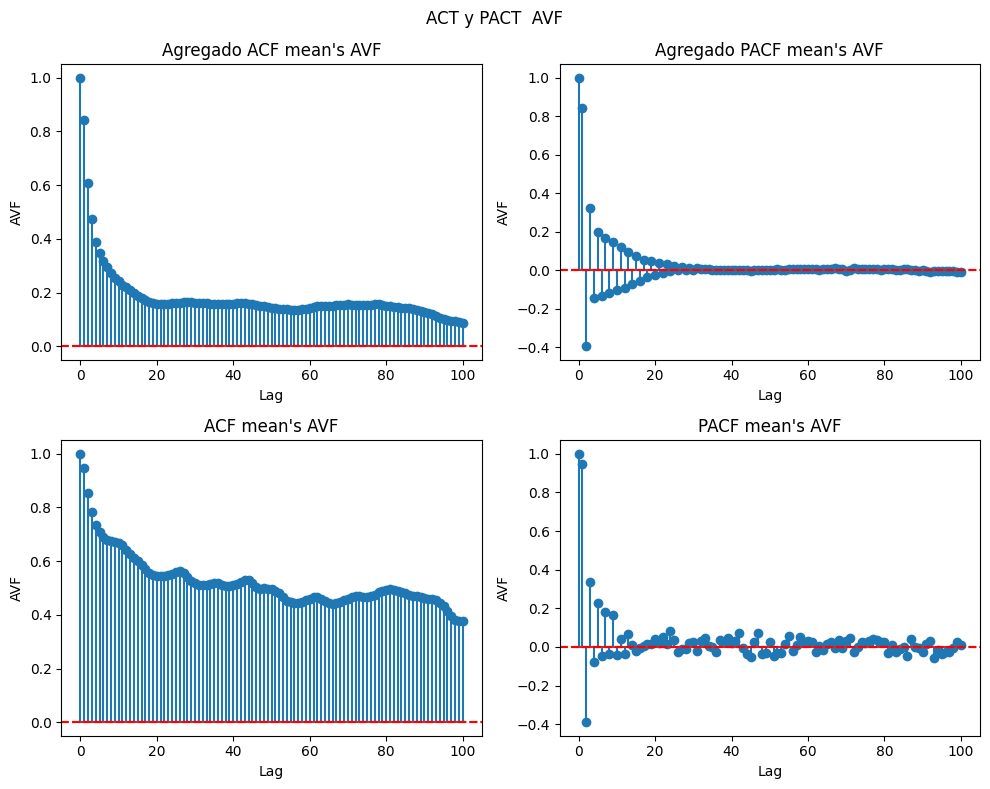

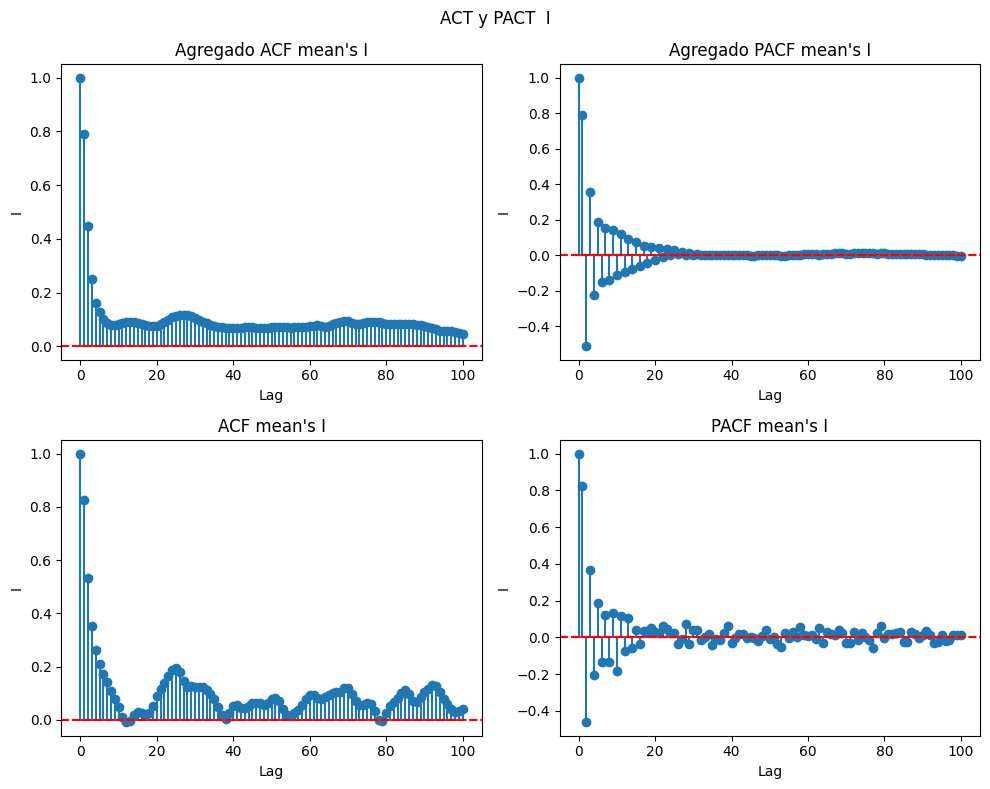

In [12]:
for label in list_signals:

    plot_acf_pact_analysis(df_mi_signals, label, apply_diff = False, nlags = 100, method = "ywm")

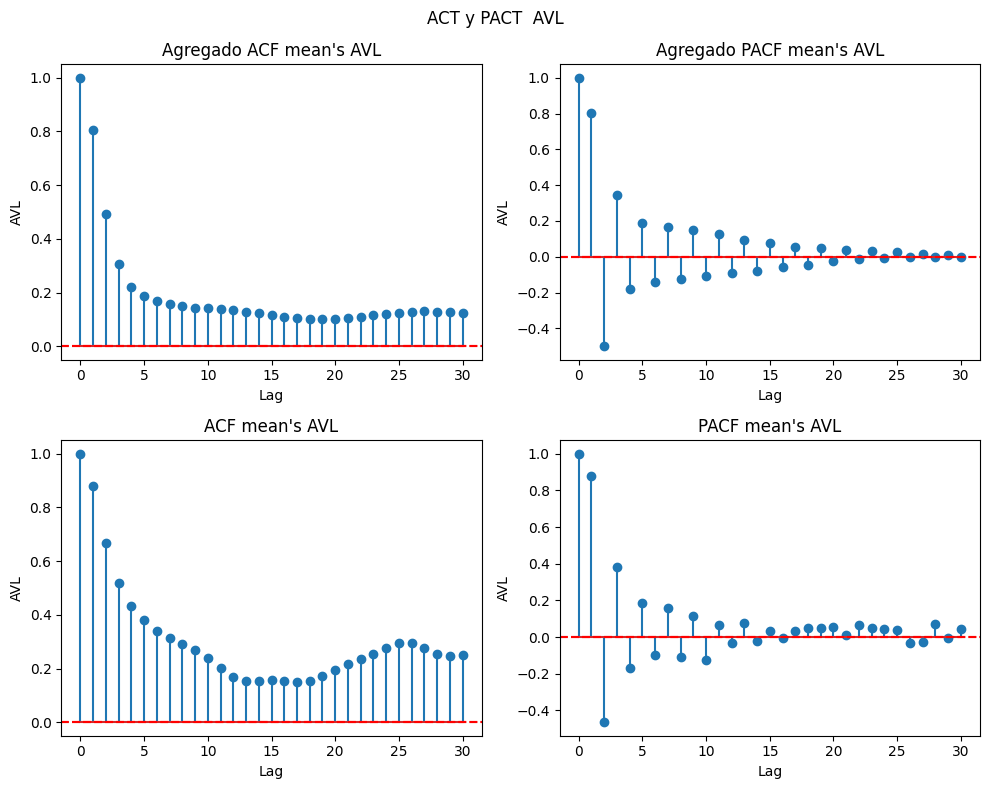

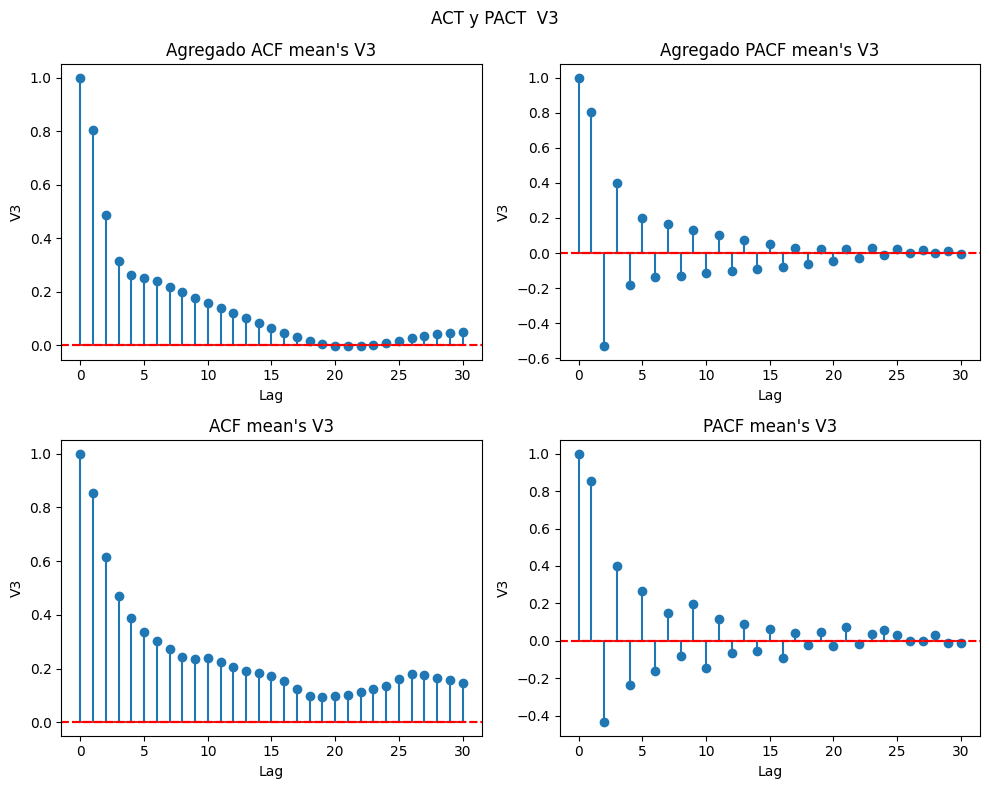

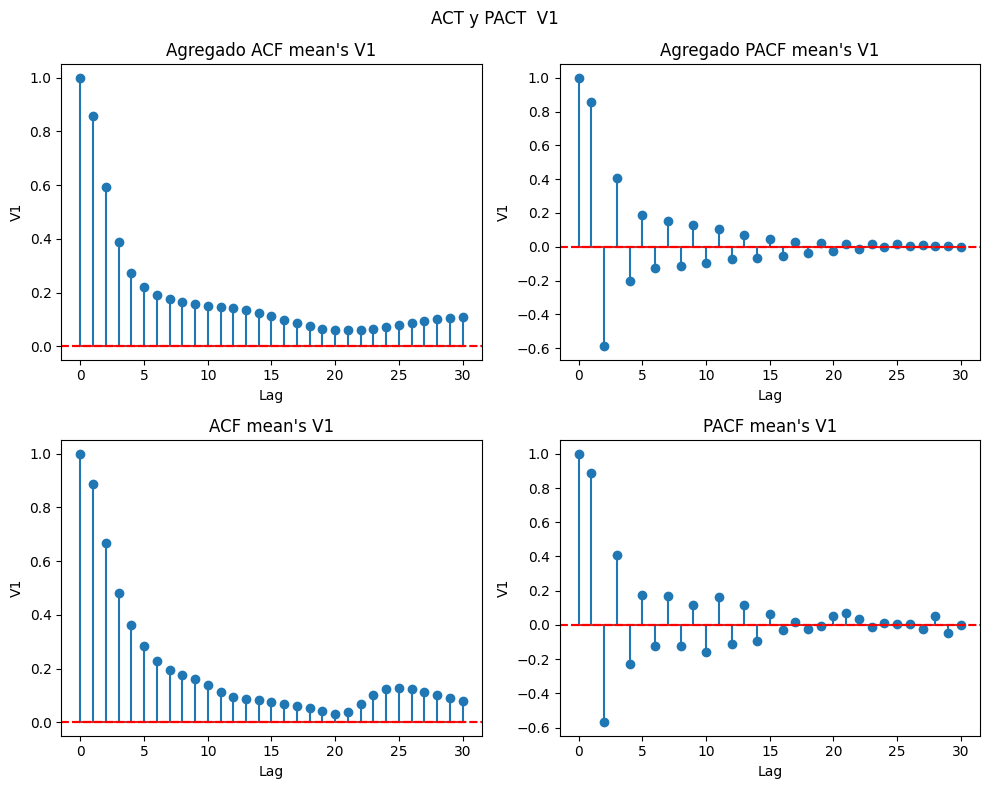

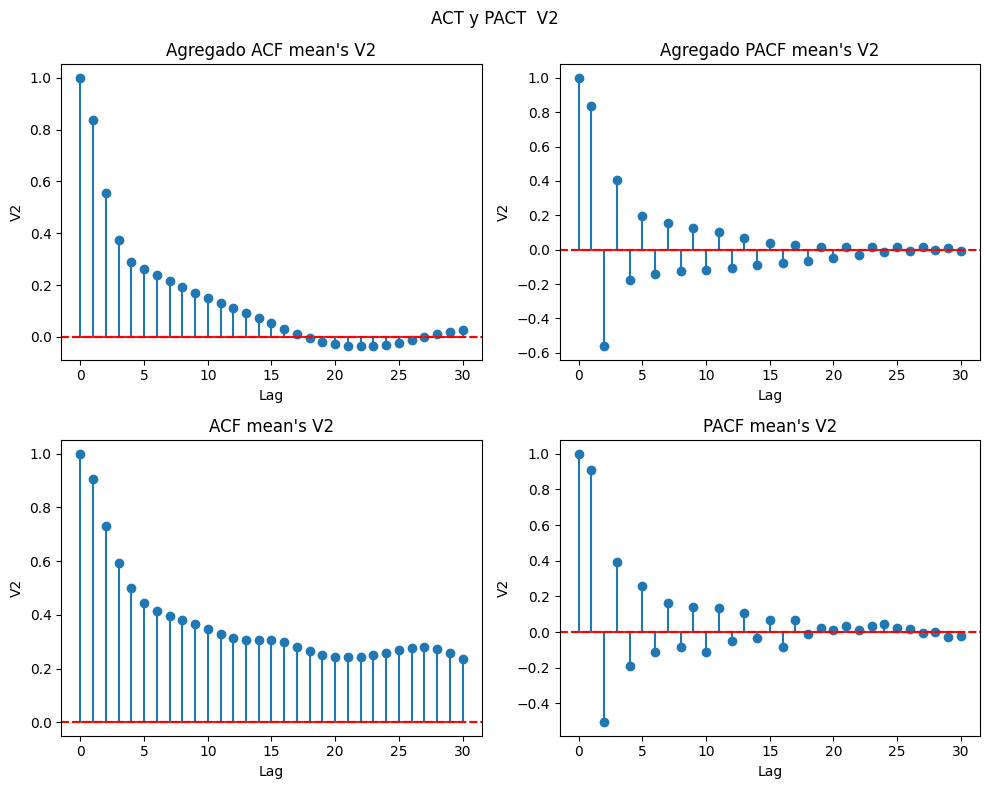

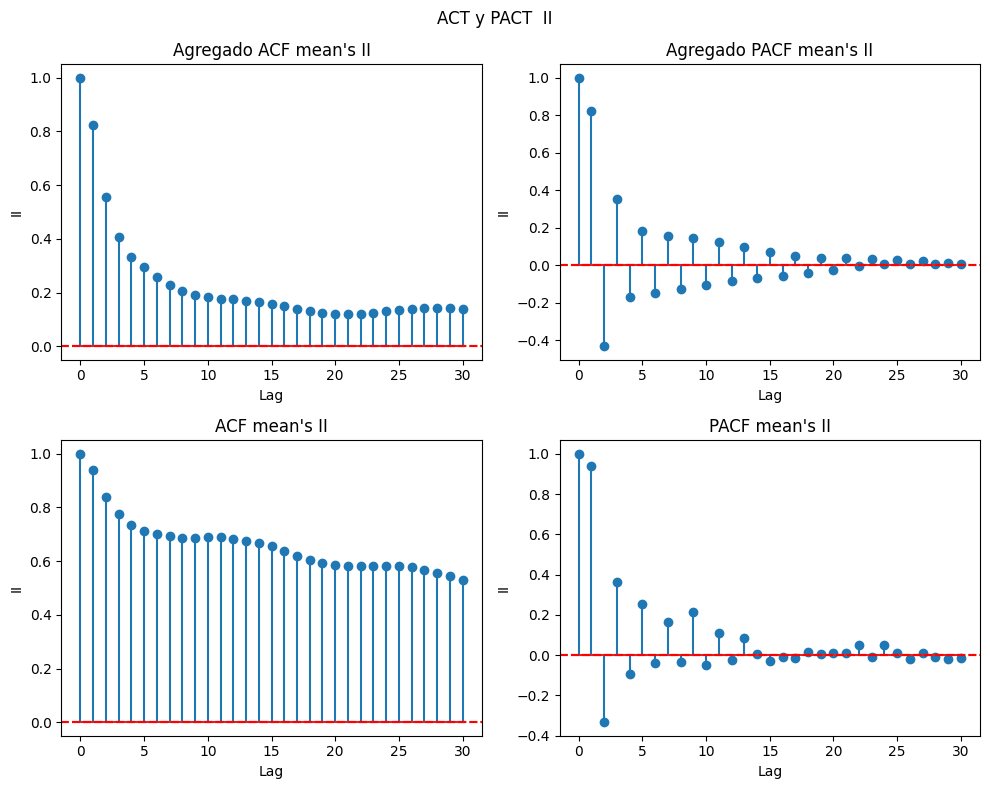

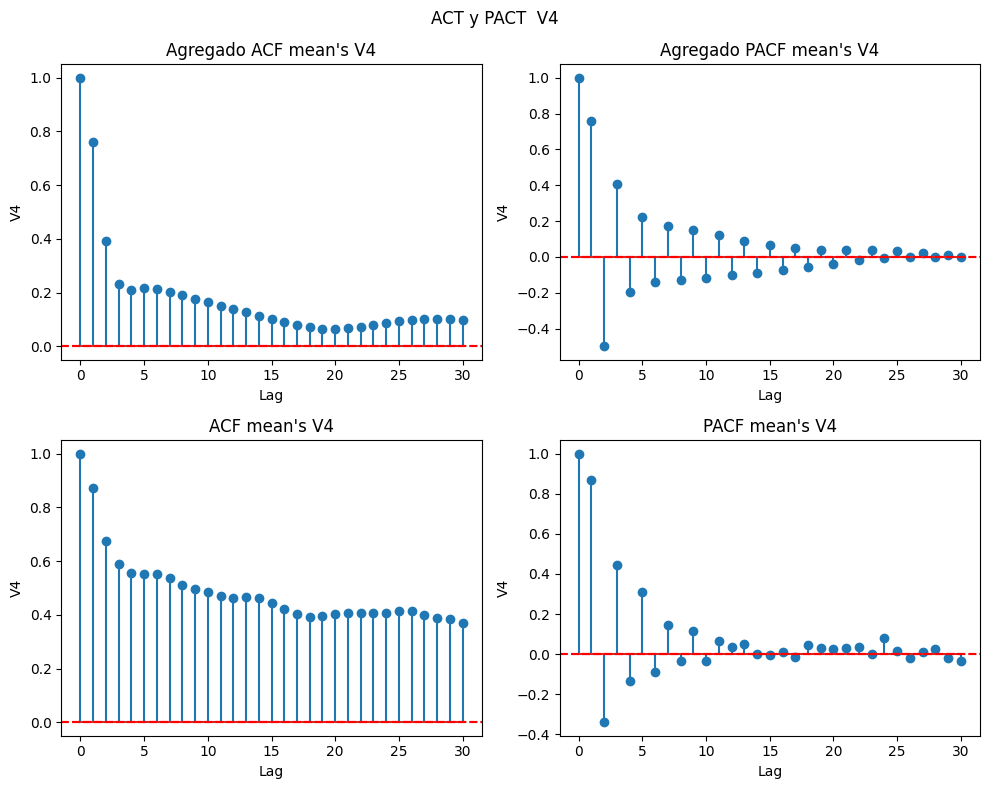

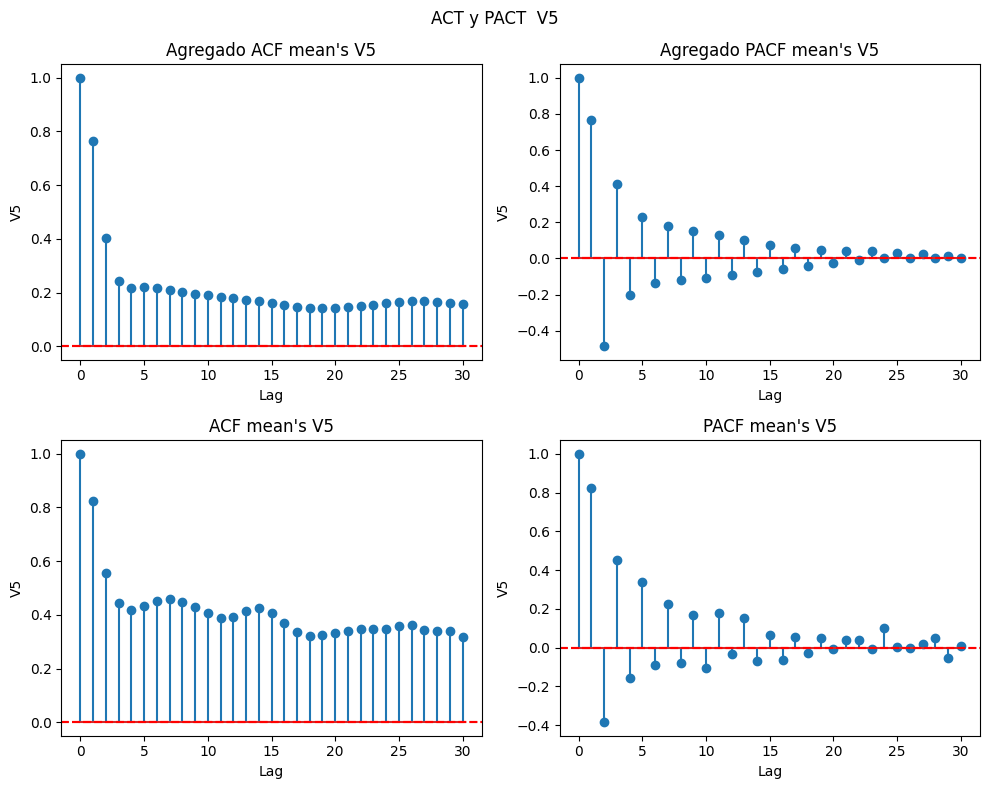

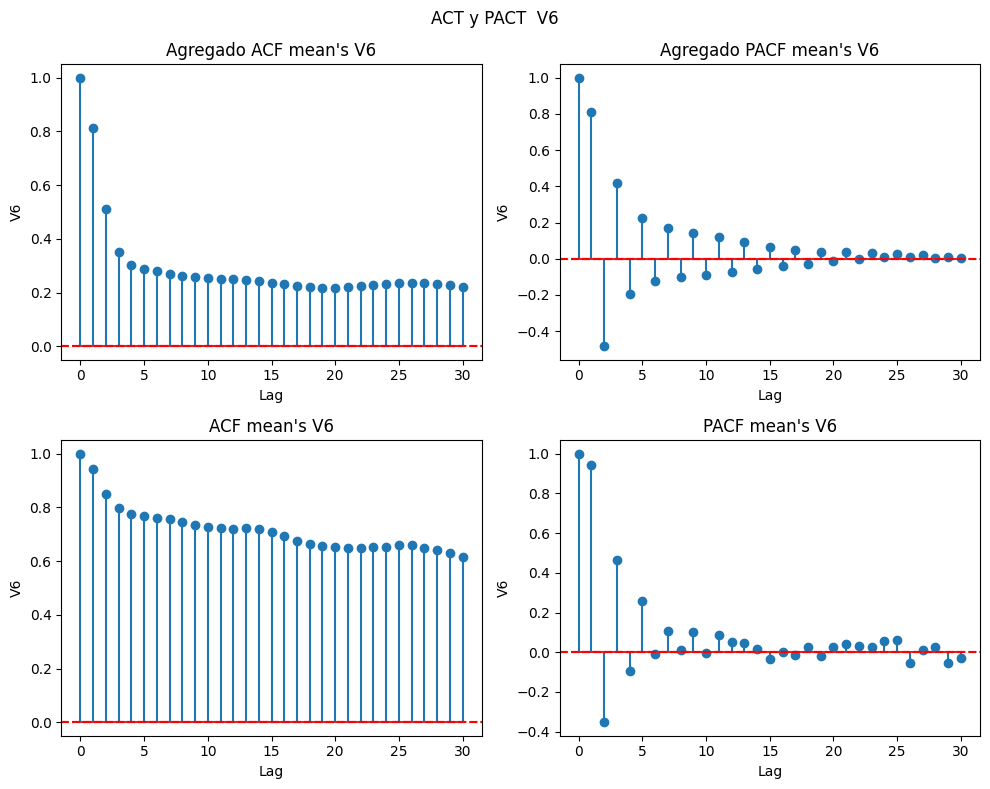

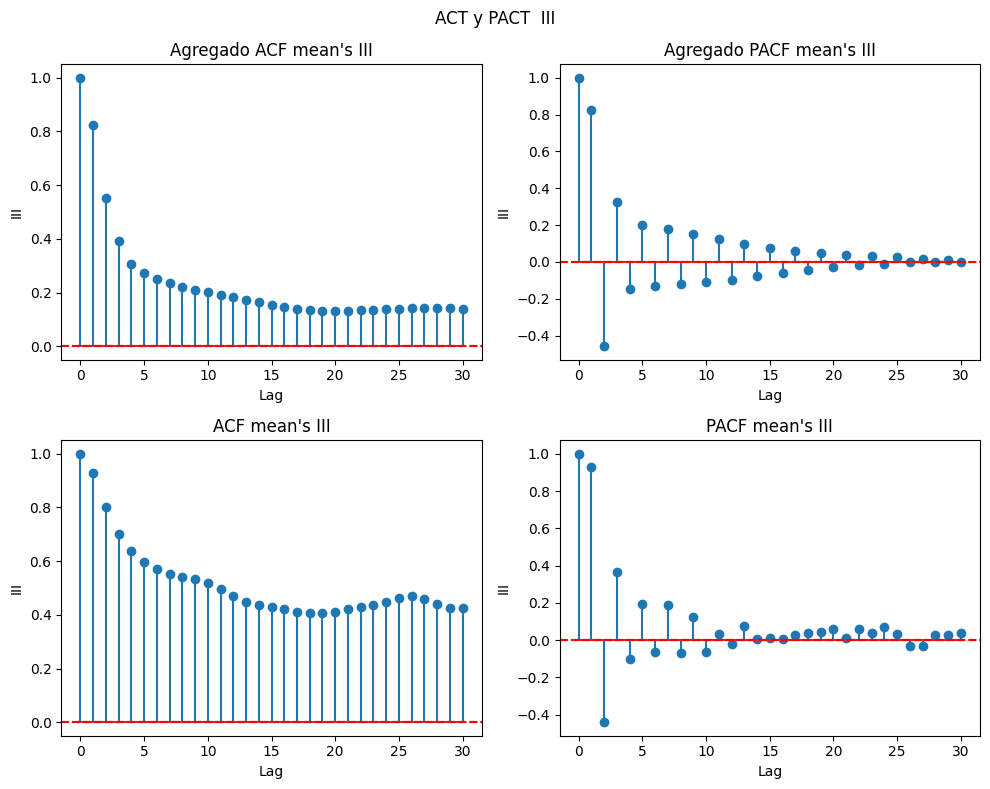

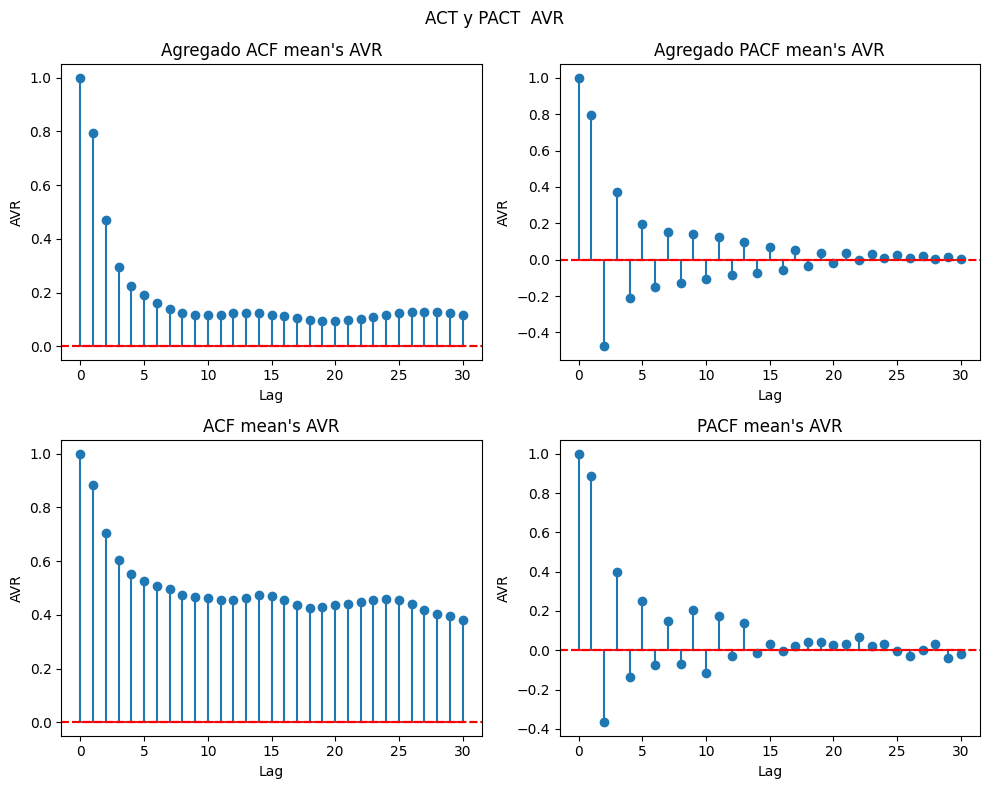

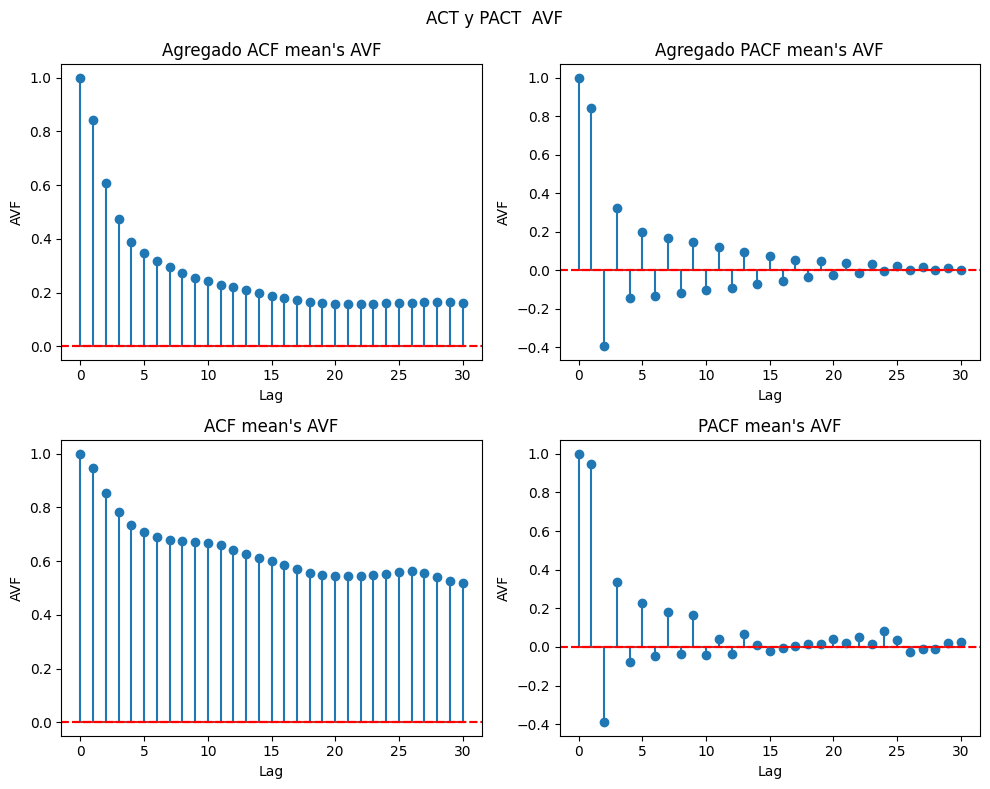

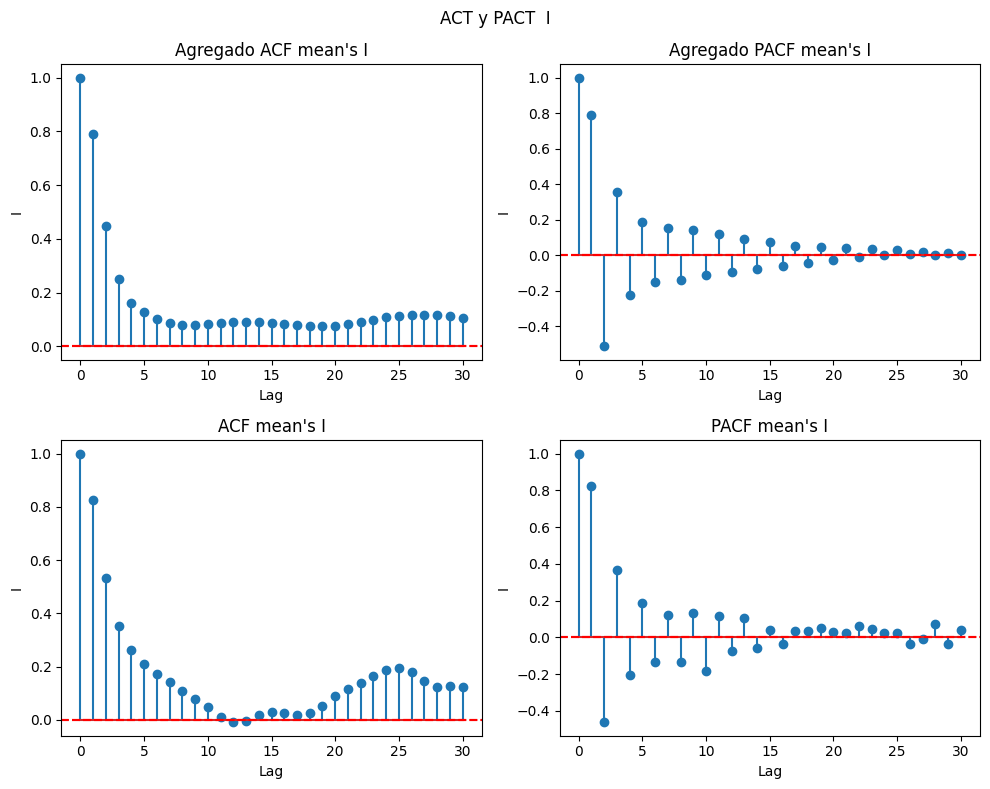

In [13]:
for label in list_signals:

    plot_acf_pact_analysis(df_mi_signals, label, apply_diff = False, method = "ywm")

### <a id = '3d2'> Raíces Unitarias </a>

In [14]:
adf_mi = prueba_dickey_fuller(df_mi, list_signals)
adf_sttc_mi = prueba_dickey_fuller(df_sttc_mi, list_signals)
adf_sttc = prueba_dickey_fuller(df_sttc, list_signals)
adf_other = prueba_dickey_fuller(df_other, list_signals)

In [15]:
adf_mi_diff = prueba_dickey_fuller(df_mi, list_signals, apply_diff = True)
adf_sttc_mi_diff = prueba_dickey_fuller(df_sttc_mi, list_signals, apply_diff = True)
adf_sttc_diff = prueba_dickey_fuller(df_sttc, list_signals, apply_diff = True)
adf_other_diff = prueba_dickey_fuller(df_other, list_signals, apply_diff = True)

In [16]:
adf_df = pd.DataFrame({"MI" : adf_mi,
                       "STTC MI" : adf_sttc_mi,
                       "STTC" : adf_sttc,
                       "OTHER" : adf_other})

In [17]:
print(adf_df.rename_axis("Señal").to_markdown())

| Señal   |       MI |   STTC MI |     STTC |    OTHER |
|:--------|---------:|----------:|---------:|---------:|
| AVL     | 0.843333 |  0.88     | 0.818333 | 0.735    |
| V3      | 0.916667 |  0.916667 | 0.881667 | 0.941667 |
| V1      | 0.856667 |  0.906667 | 0.86     | 0.853333 |
| V2      | 0.923333 |  0.941667 | 0.891667 | 0.941667 |
| II      | 0.841667 |  0.861667 | 0.823333 | 0.85     |
| V4      | 0.861667 |  0.891667 | 0.805    | 0.911667 |
| V5      | 0.795    |  0.876667 | 0.815    | 0.883333 |
| V6      | 0.708333 |  0.836667 | 0.753333 | 0.82     |
| III     | 0.808333 |  0.873333 | 0.733333 | 0.681667 |
| AVR     | 0.888333 |  0.908333 | 0.878333 | 0.91     |
| AVF     | 0.785    |  0.84     | 0.733333 | 0.733333 |
| I       | 0.891667 |  0.9      | 0.888333 | 0.906667 |


In [18]:
adf_df_diff = pd.DataFrame({"MI" : adf_mi_diff,
                       "STTC MI" : adf_sttc_mi_diff,
                       "STTC" : adf_sttc_diff,
                       "OTHER" : adf_other_diff})

In [19]:
print(adf_df_diff.rename_axis("Señal").to_markdown())

| Señal   |       MI |   STTC MI |     STTC |   OTHER |
|:--------|---------:|----------:|---------:|--------:|
| AVL     | 0.996667 |         1 | 0.998333 |       1 |
| V3      | 1        |         1 | 1        |       1 |
| V1      | 1        |         1 | 1        |       1 |
| V2      | 1        |         1 | 1        |       1 |
| II      | 1        |         1 | 1        |       1 |
| V4      | 1        |         1 | 1        |       1 |
| V5      | 1        |         1 | 1        |       1 |
| V6      | 0.998333 |         1 | 1        |       1 |
| III     | 0.996667 |         1 | 0.998333 |       1 |
| AVR     | 1        |         1 | 1        |       1 |
| AVF     | 0.998333 |         1 | 1        |       1 |
| I       | 0.998333 |         1 | 1        |       1 |


### <a id = '3d3'> Análisis autocorrelaciones y autocorrelaciones parcial con diferencias </a>

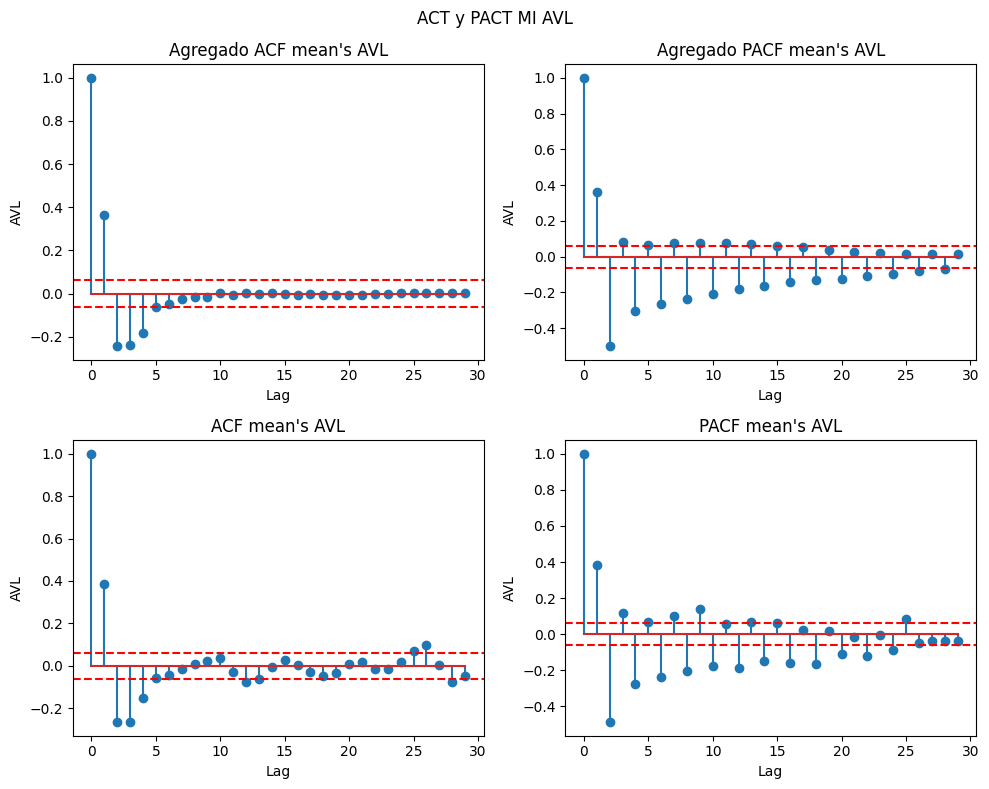

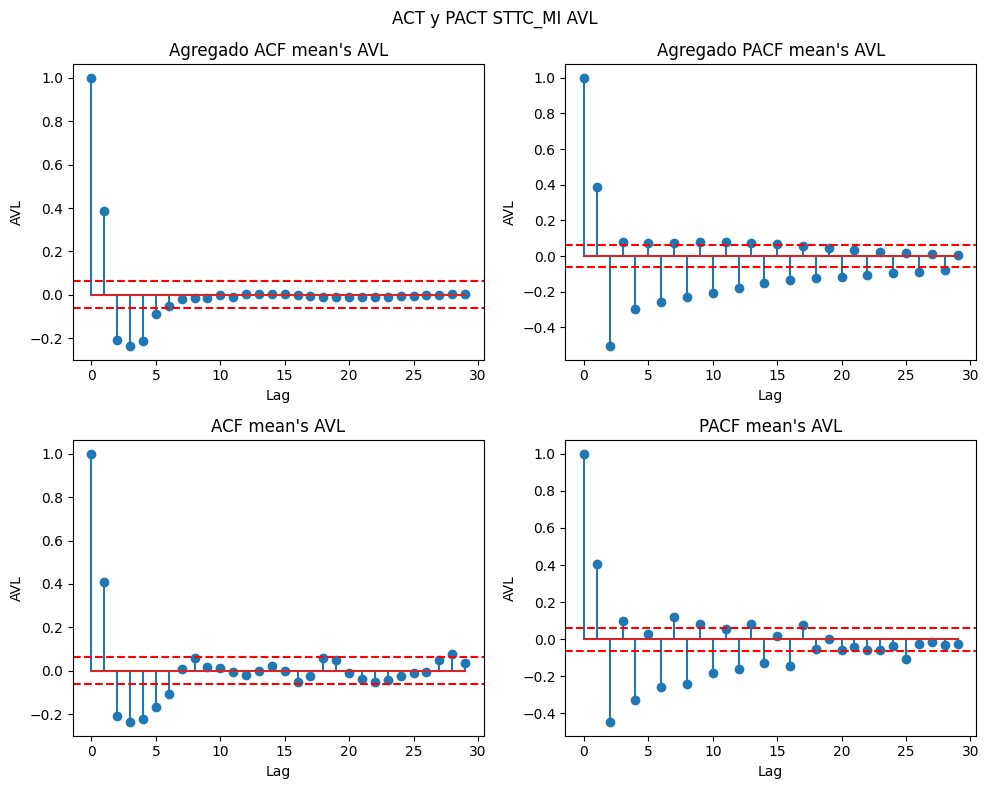

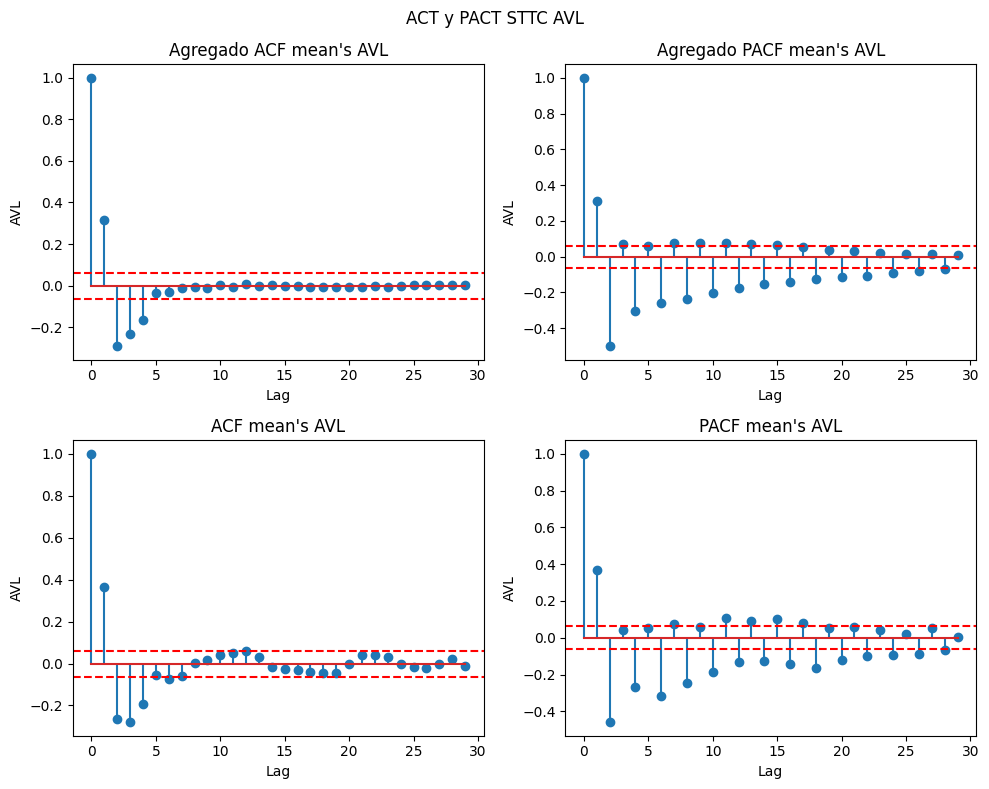

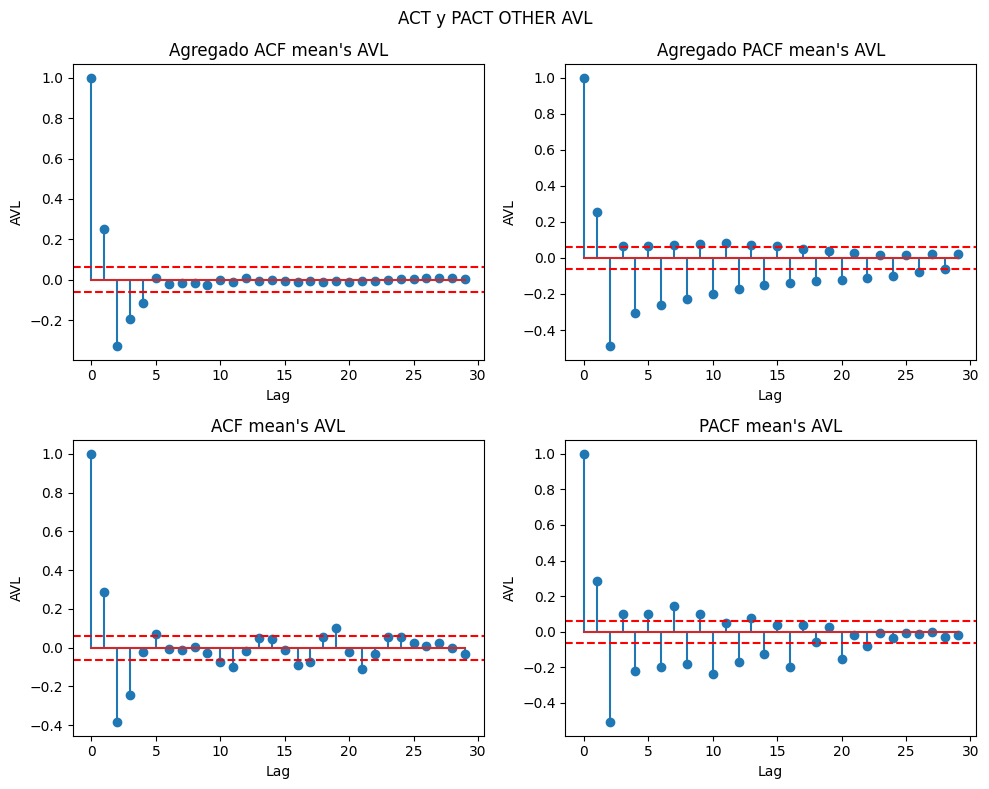

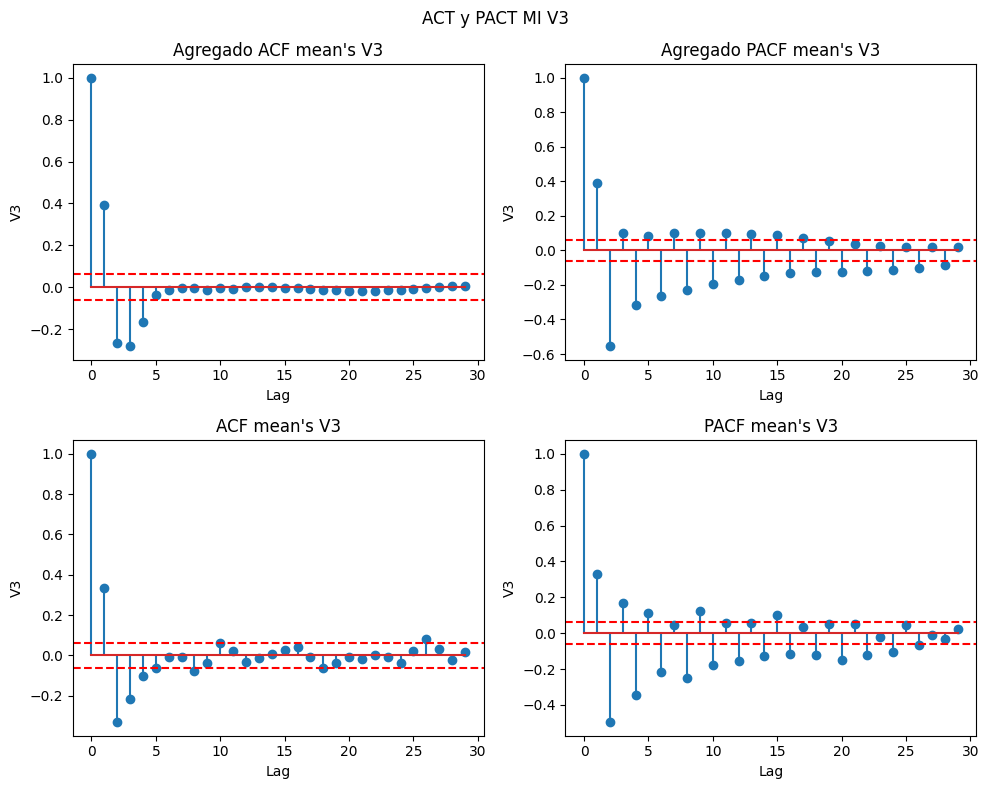

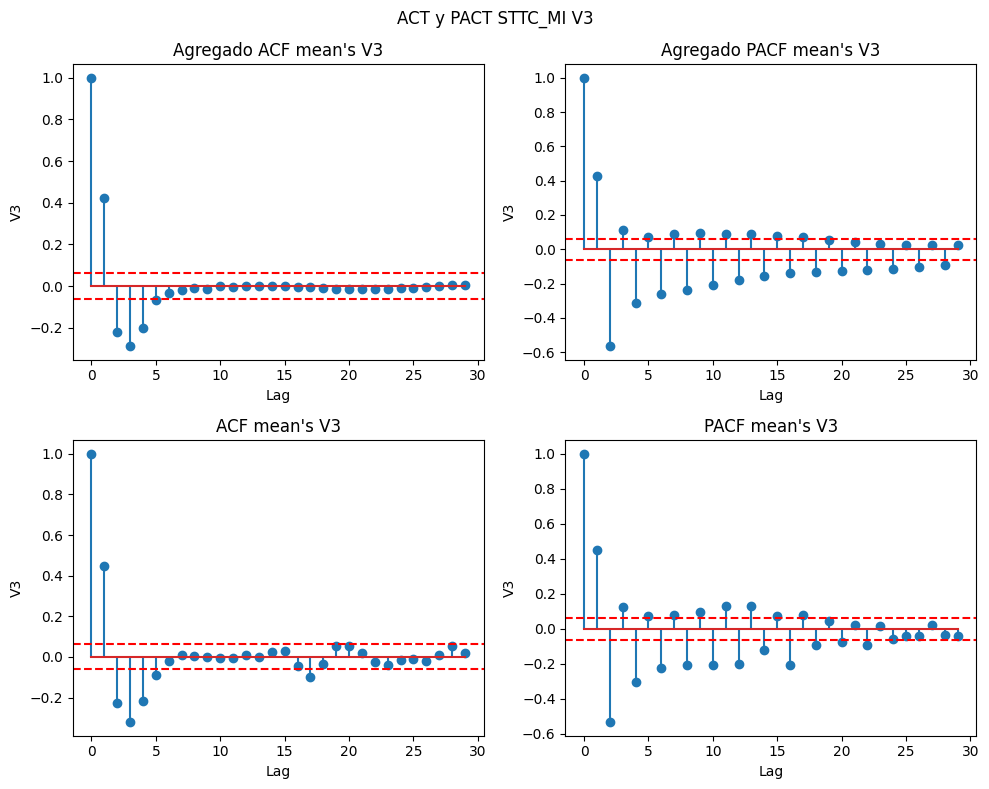

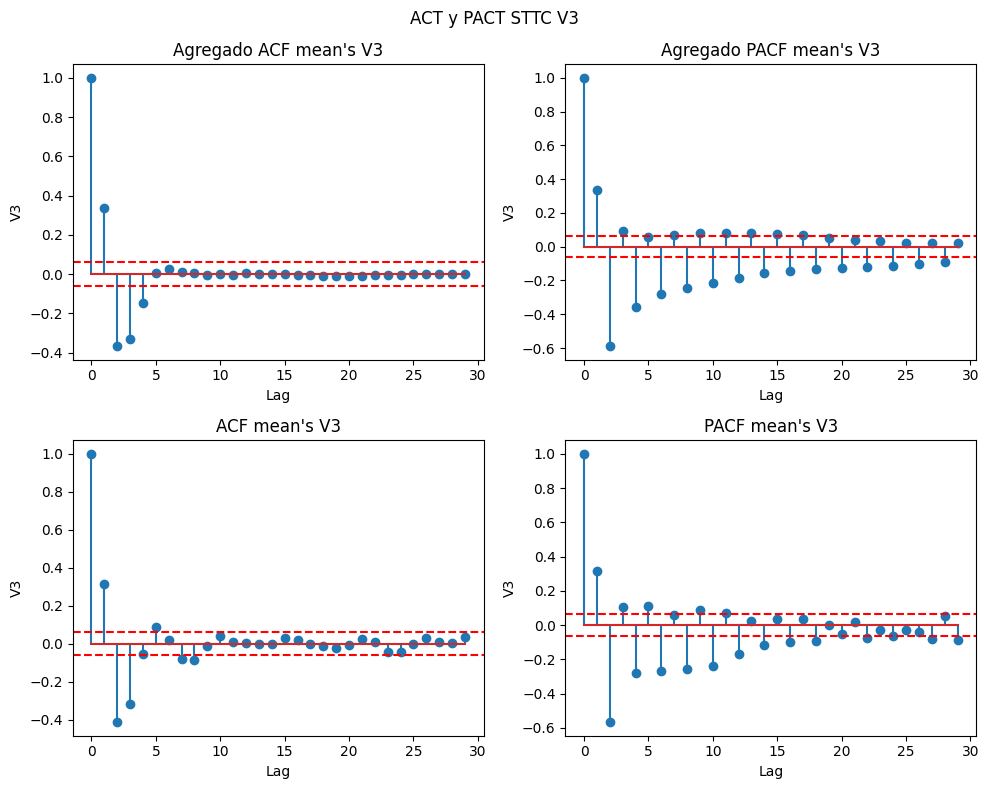

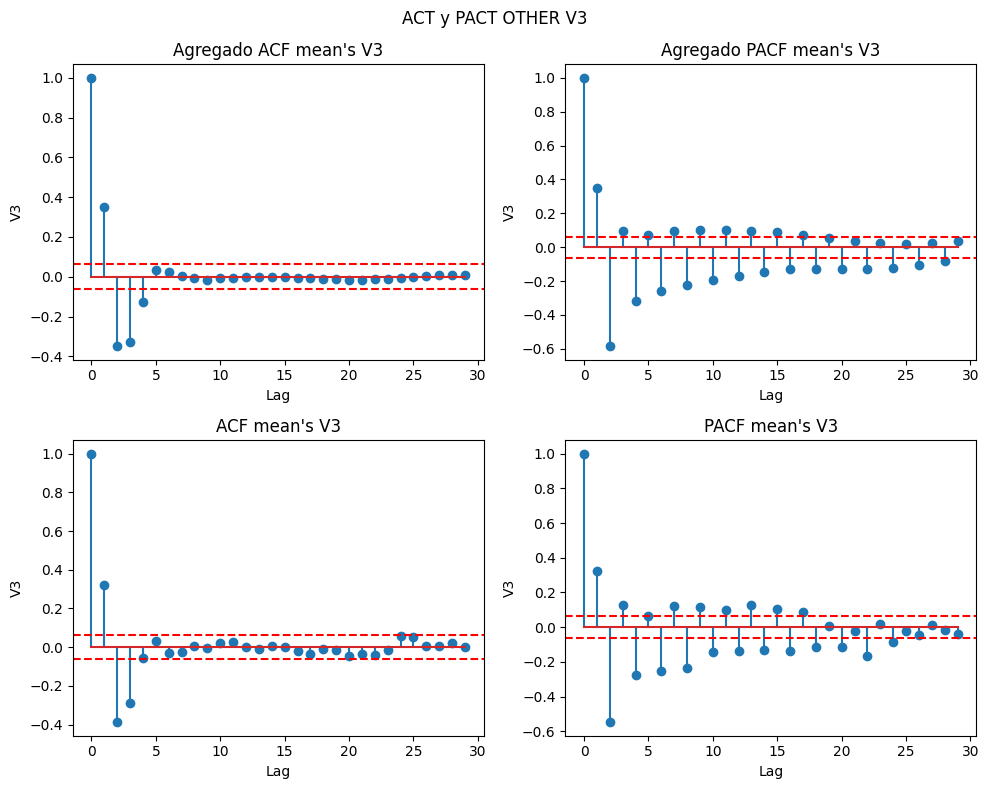

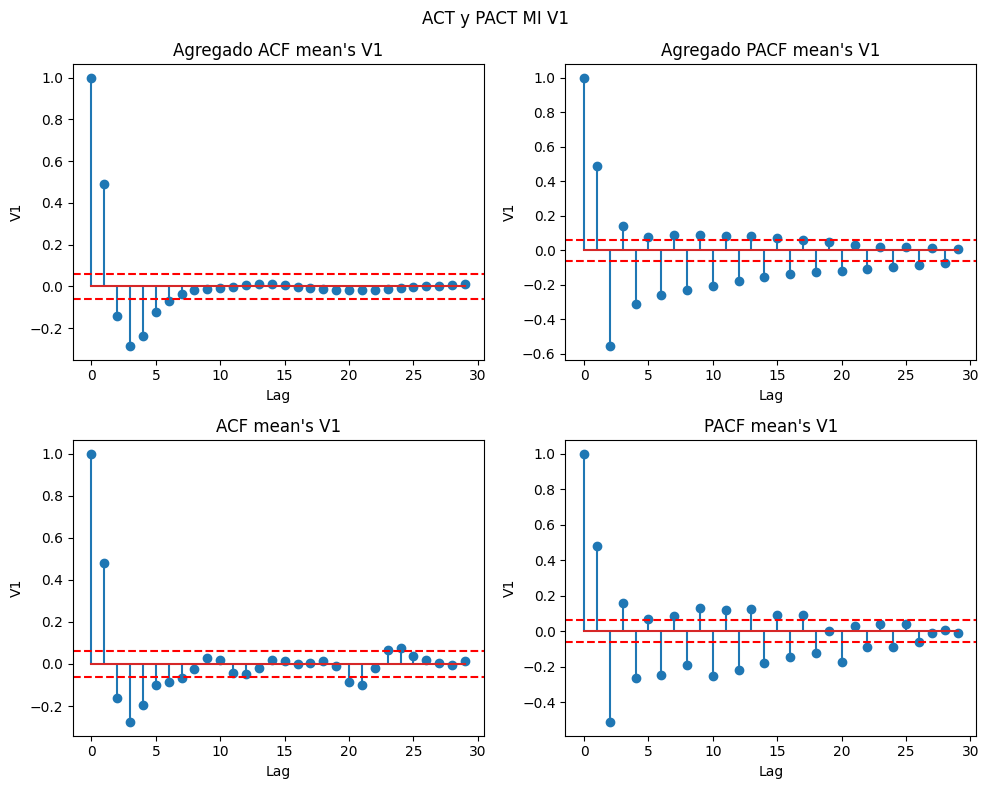

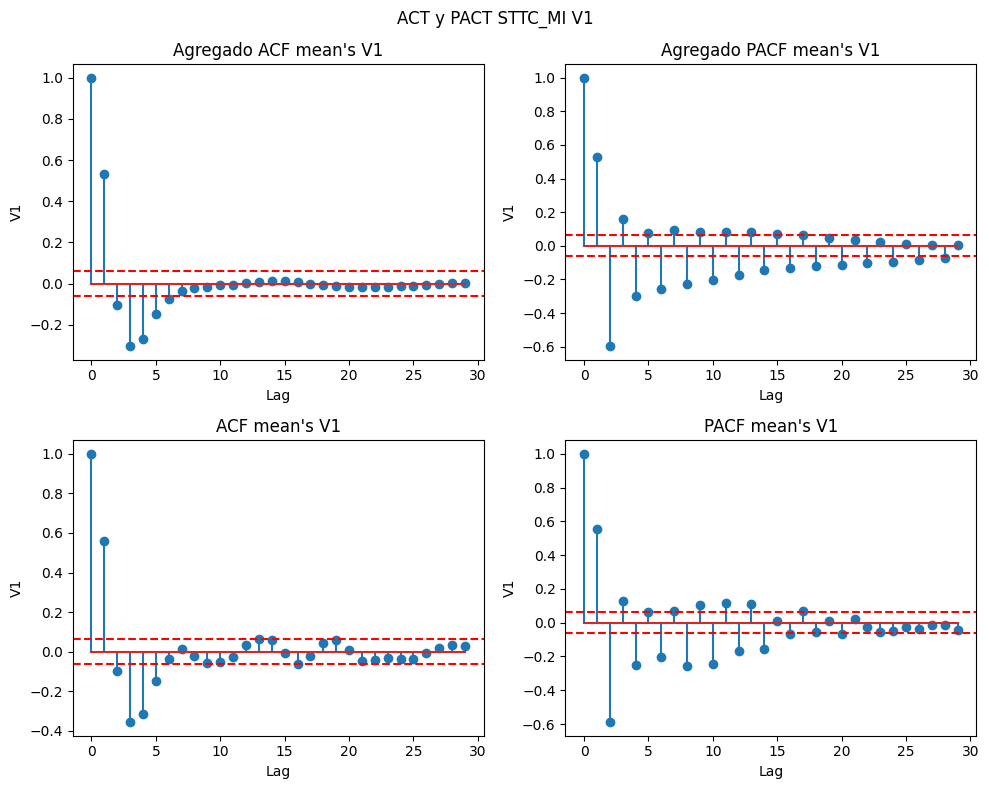

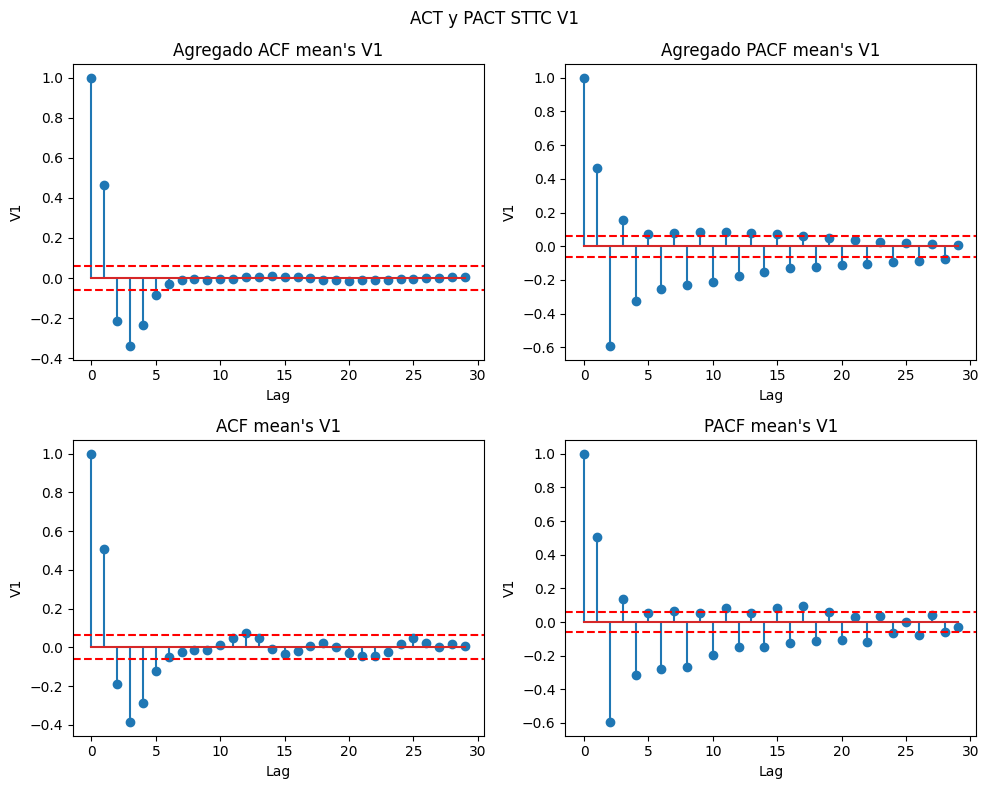

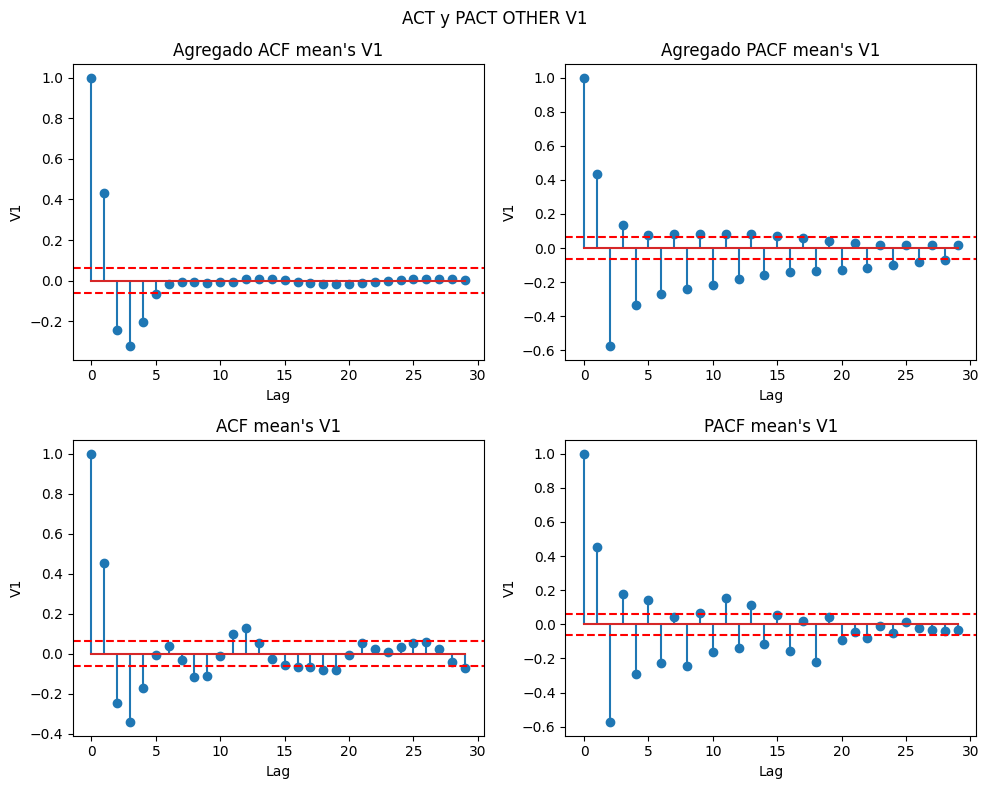

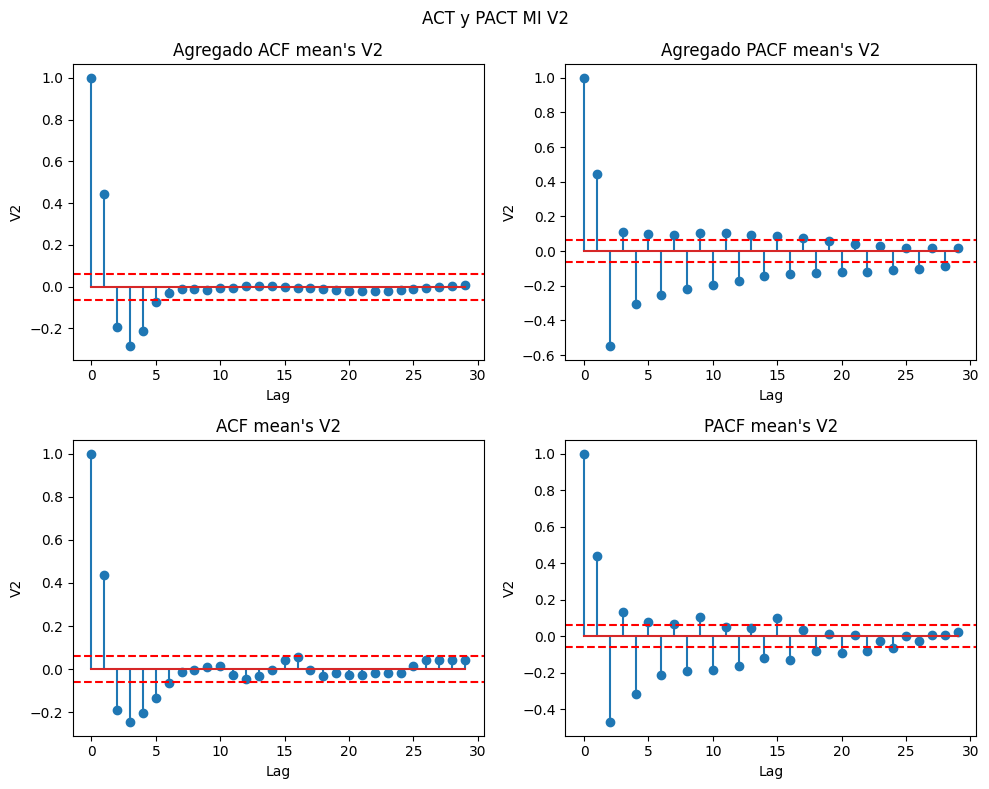

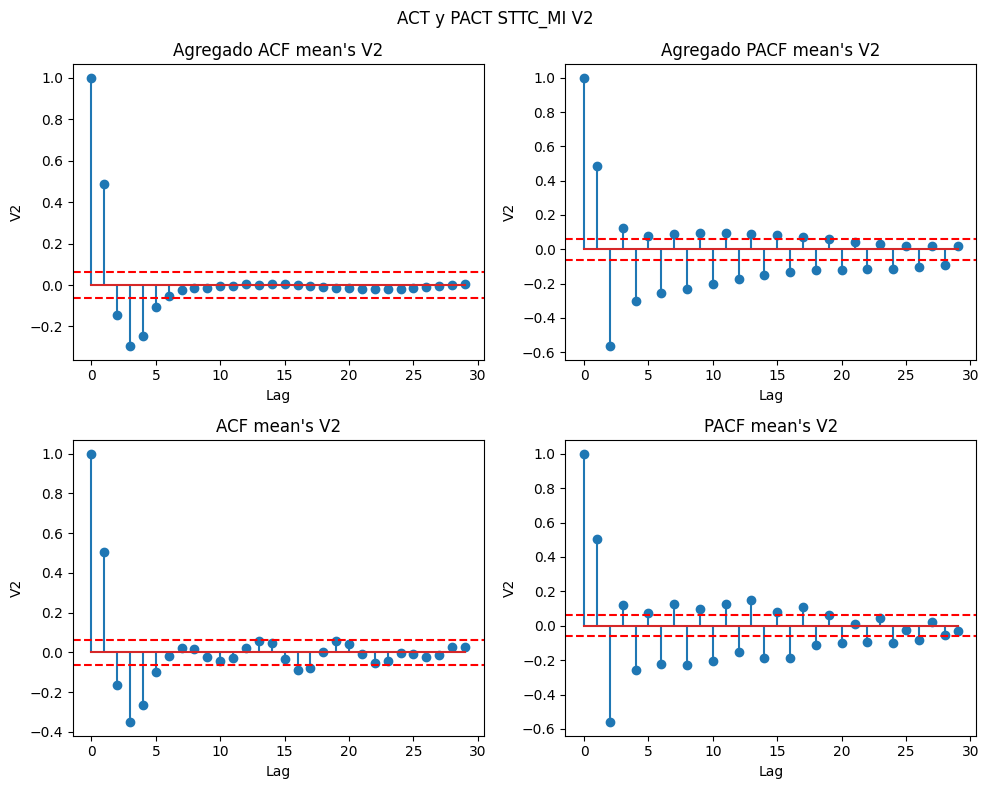

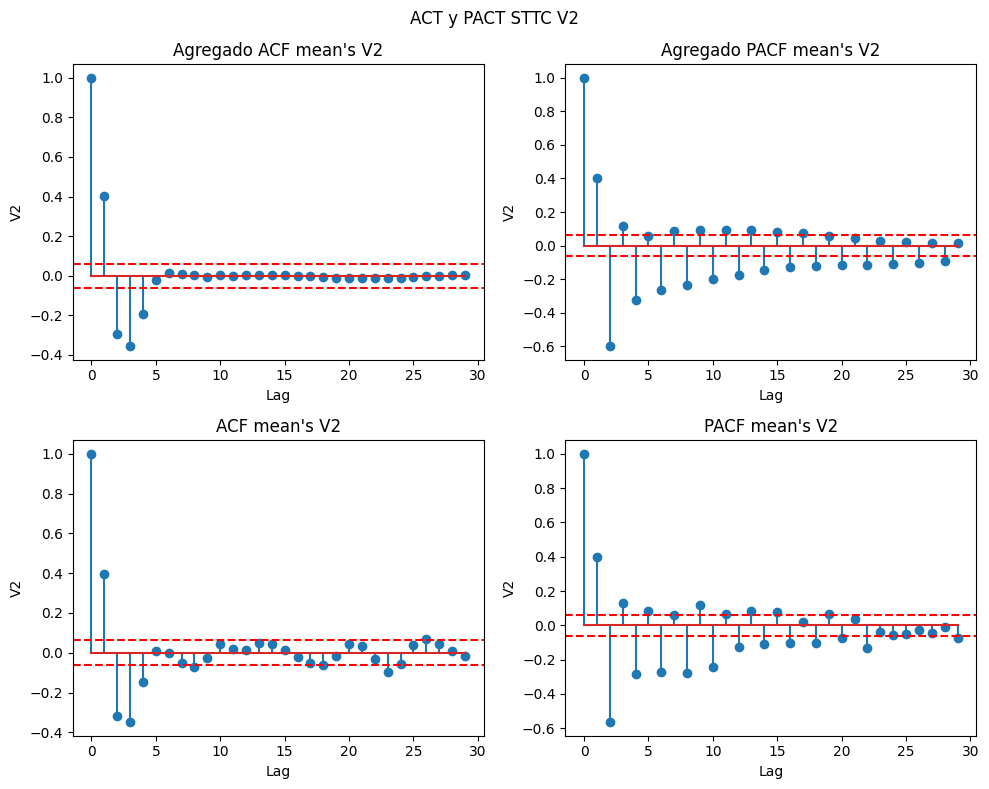

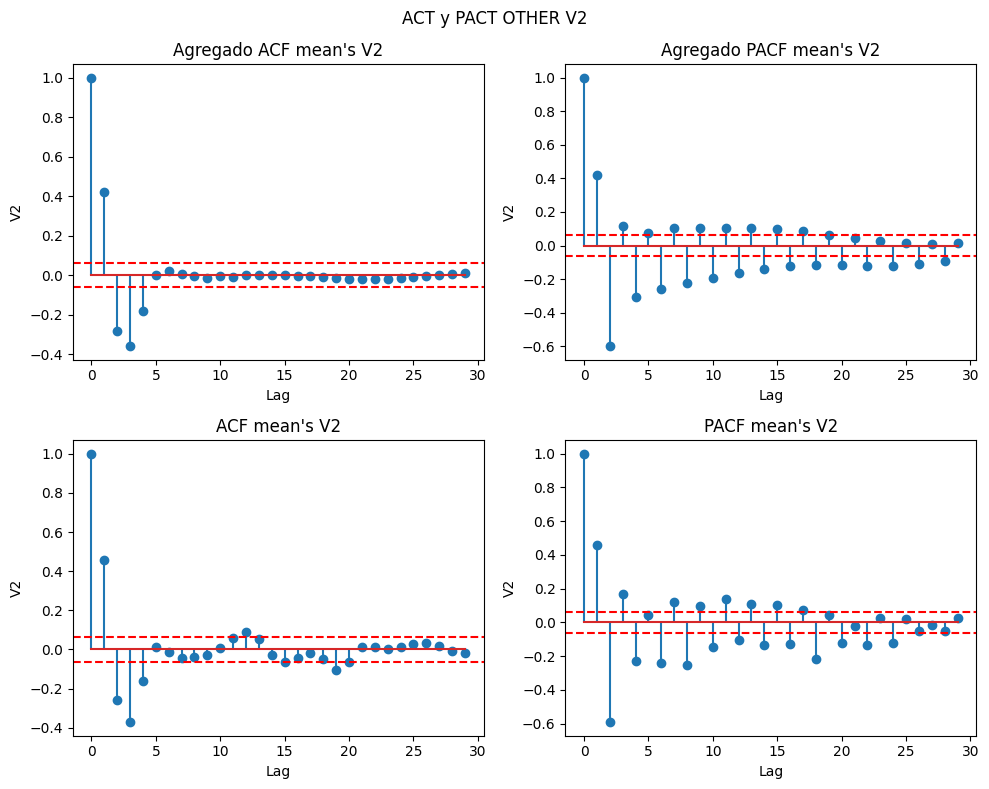

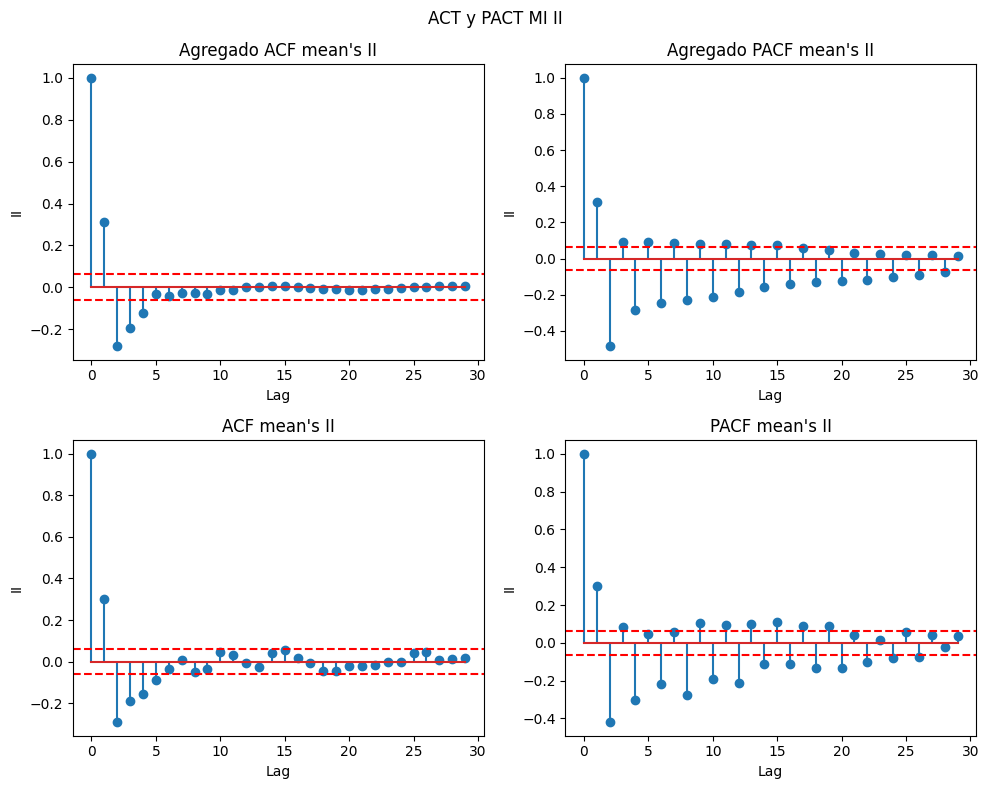

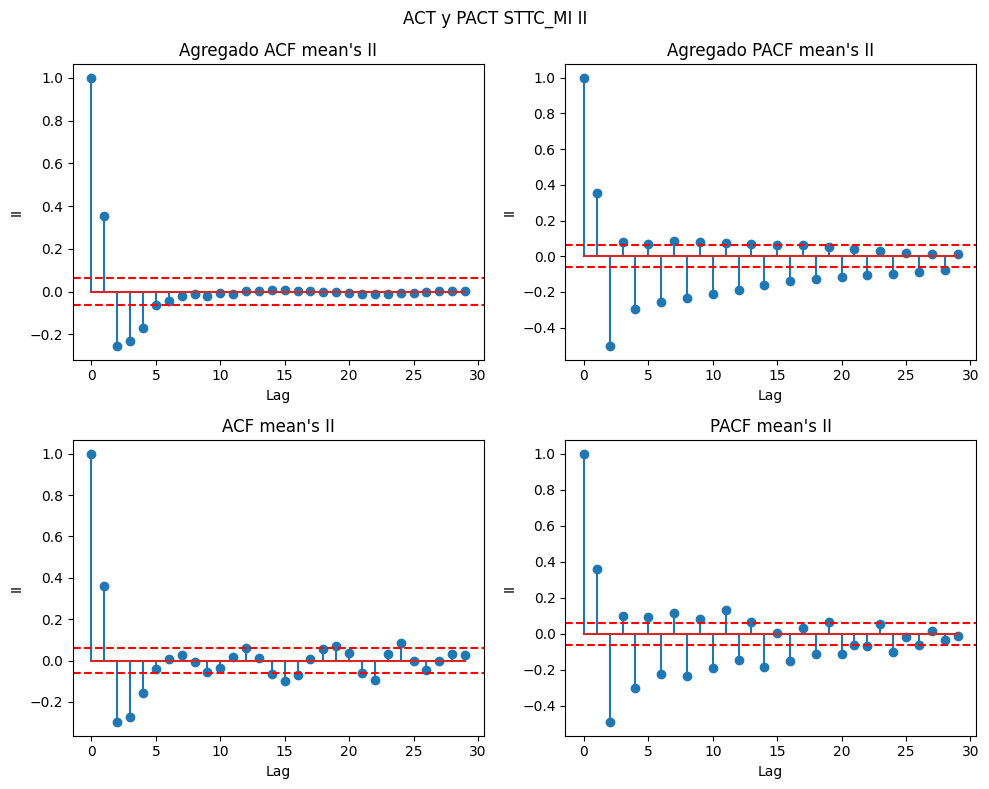

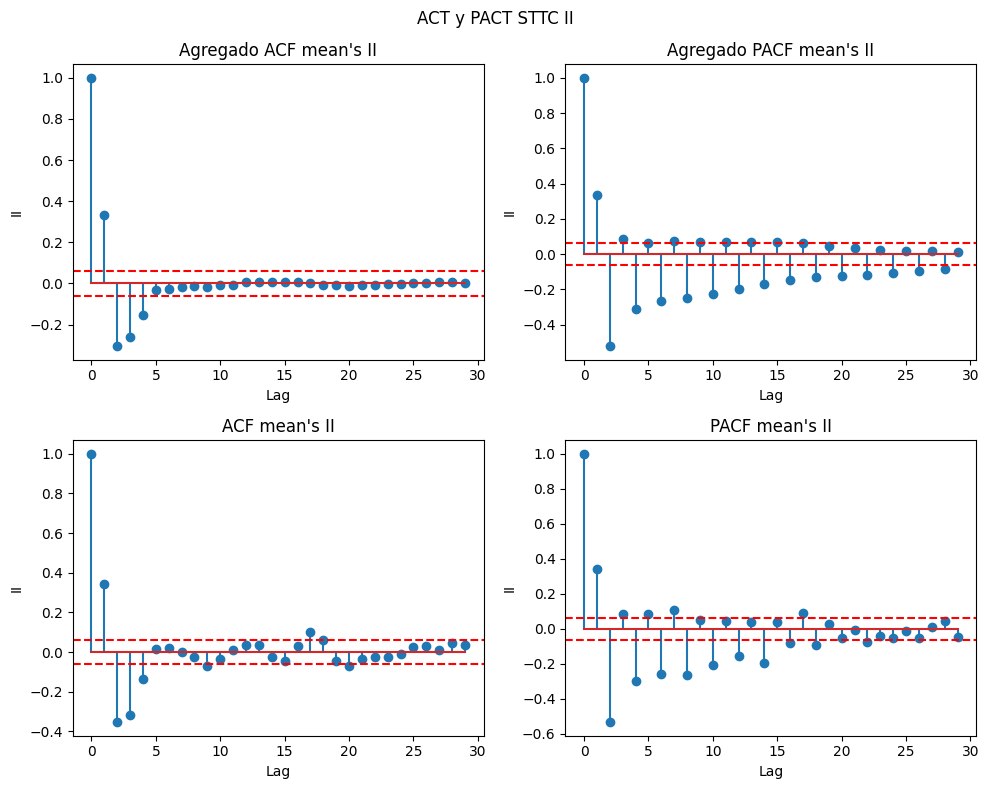

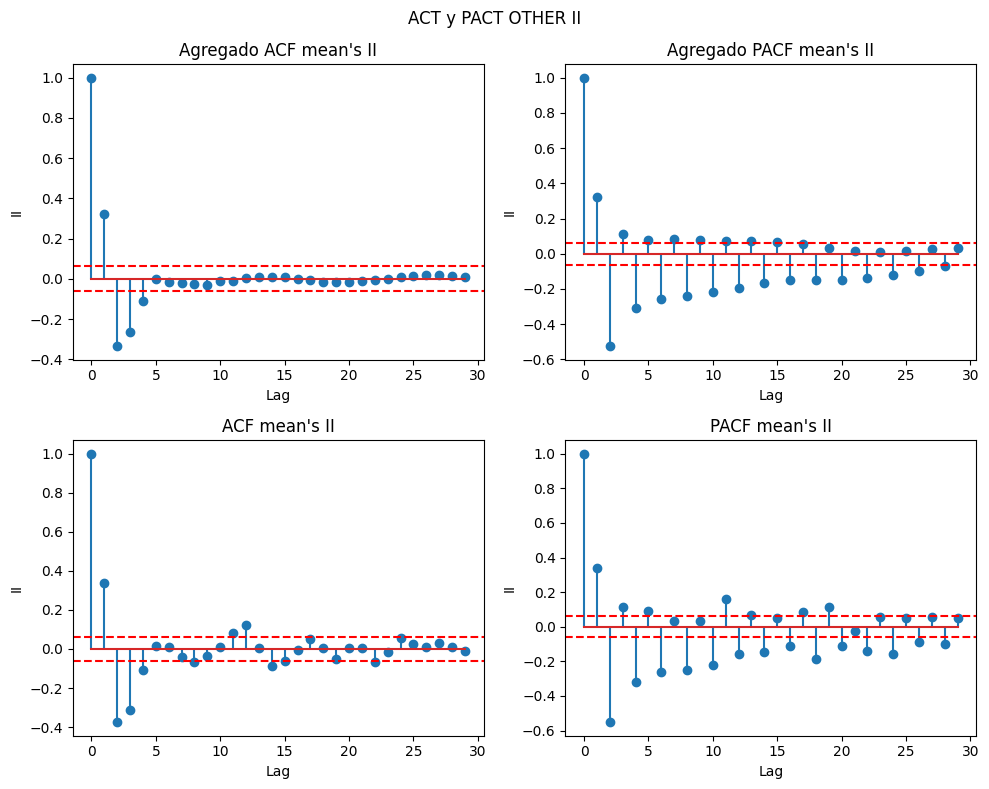

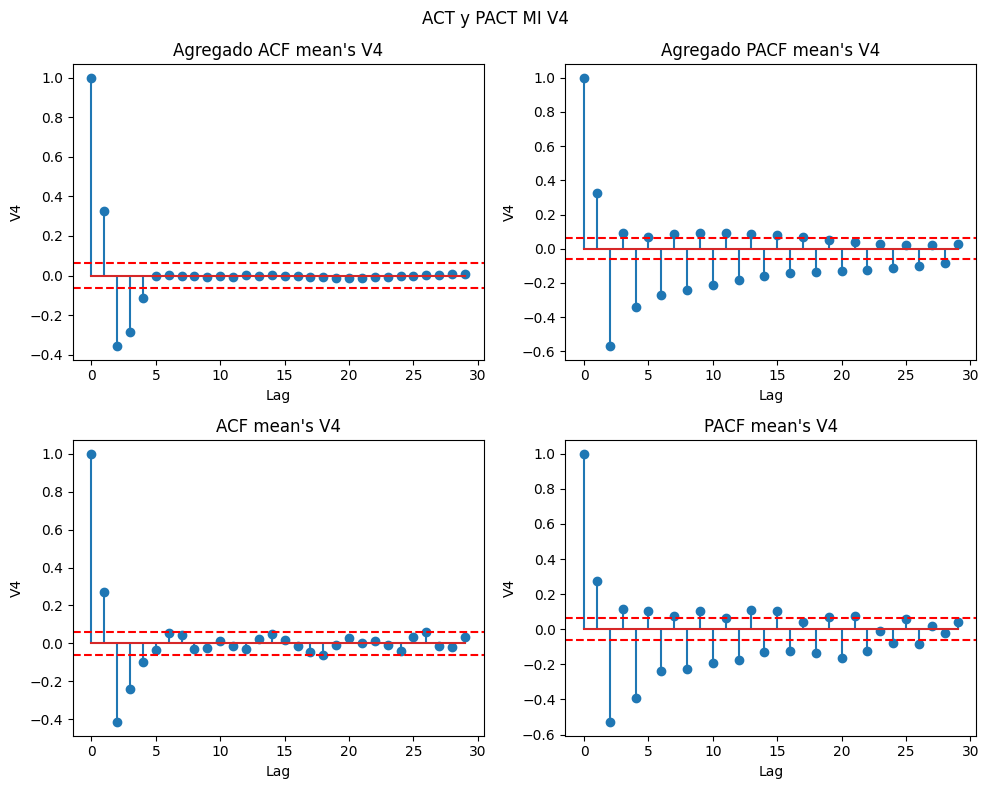

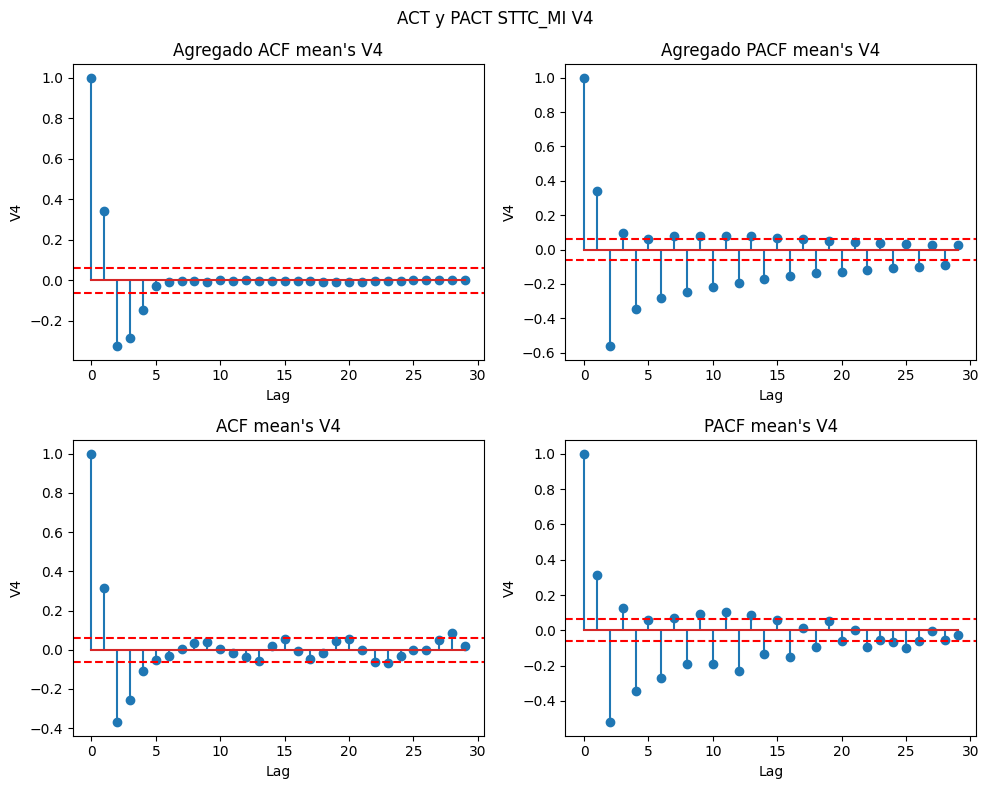

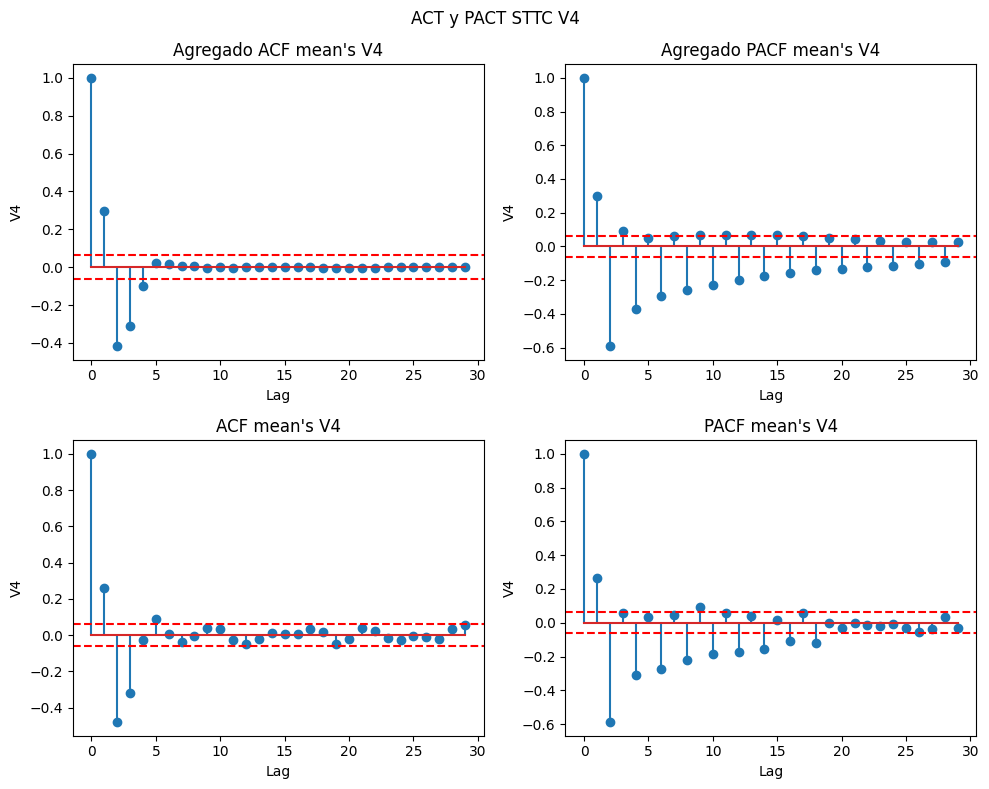

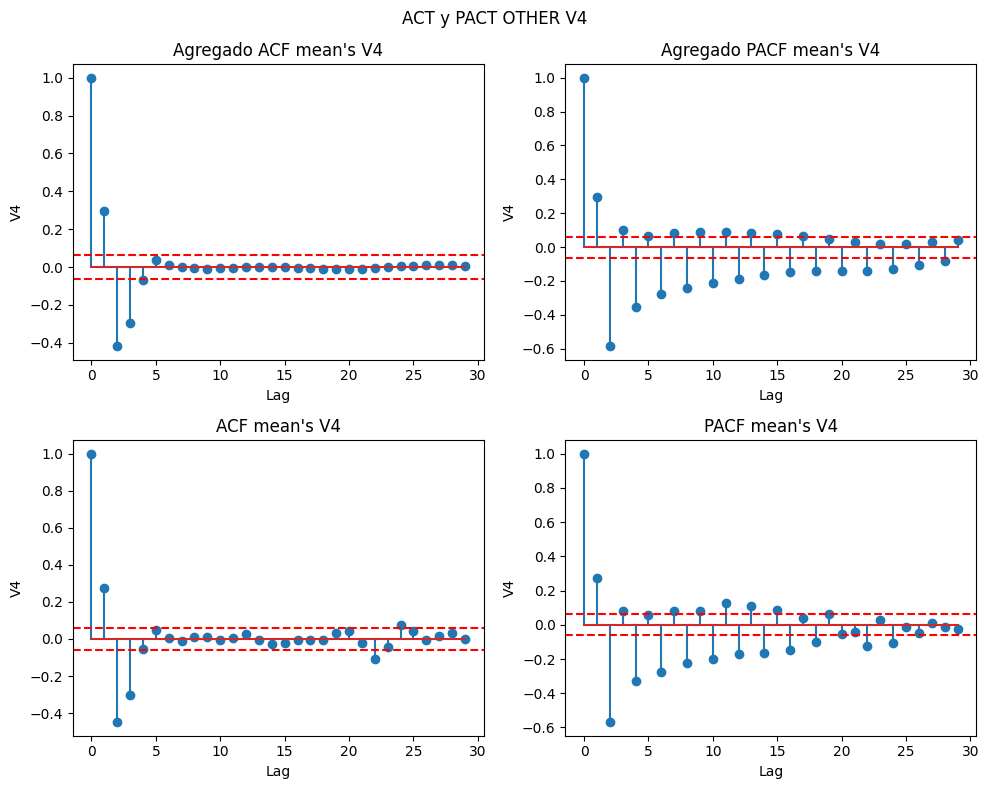

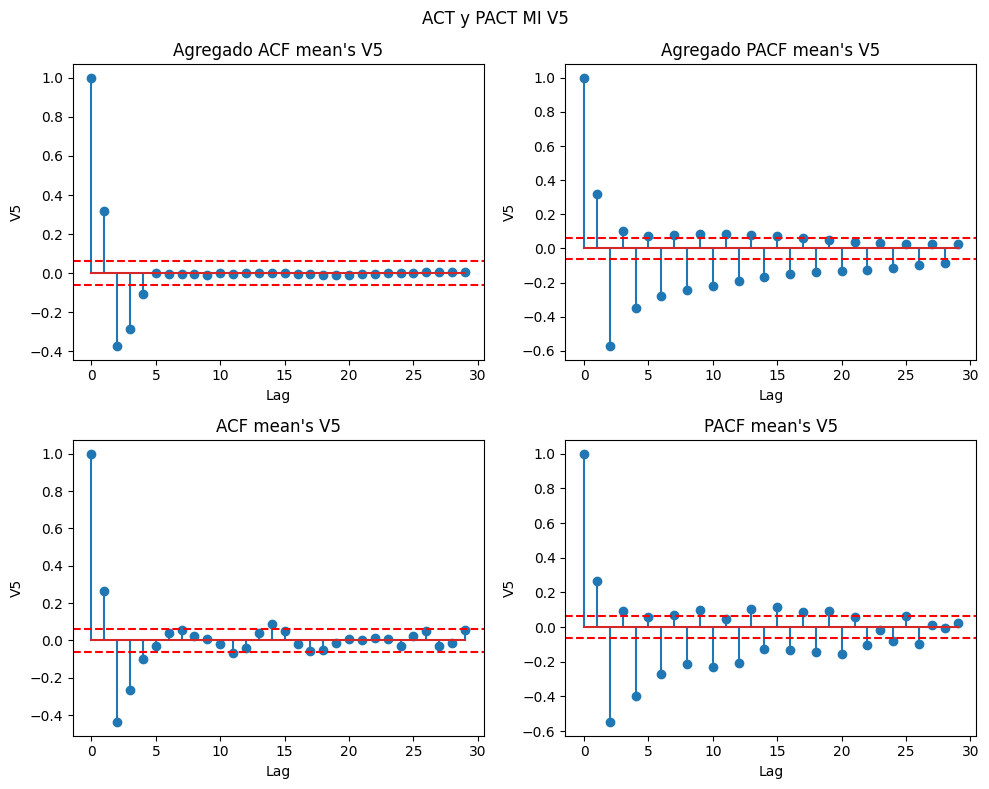

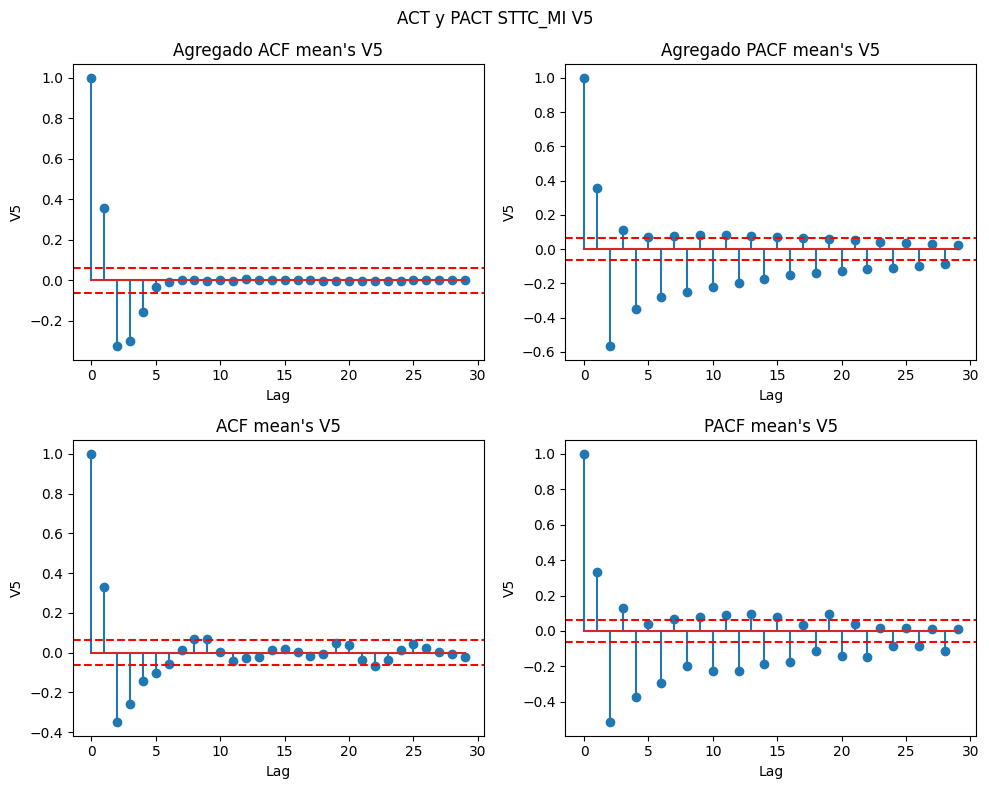

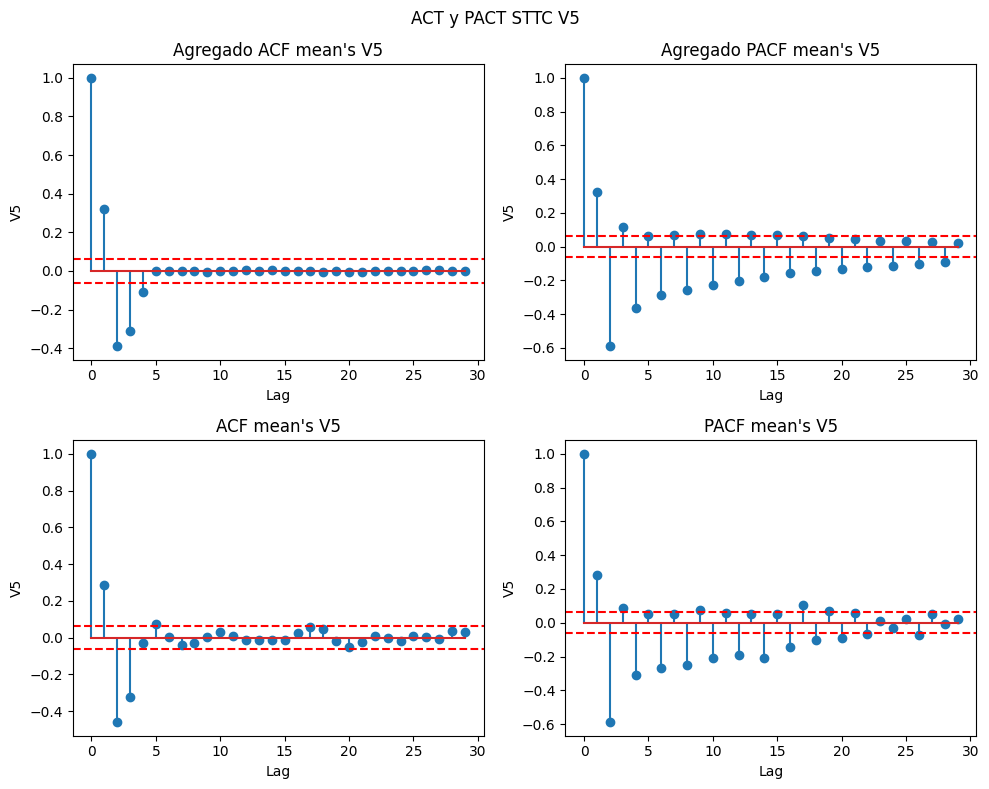

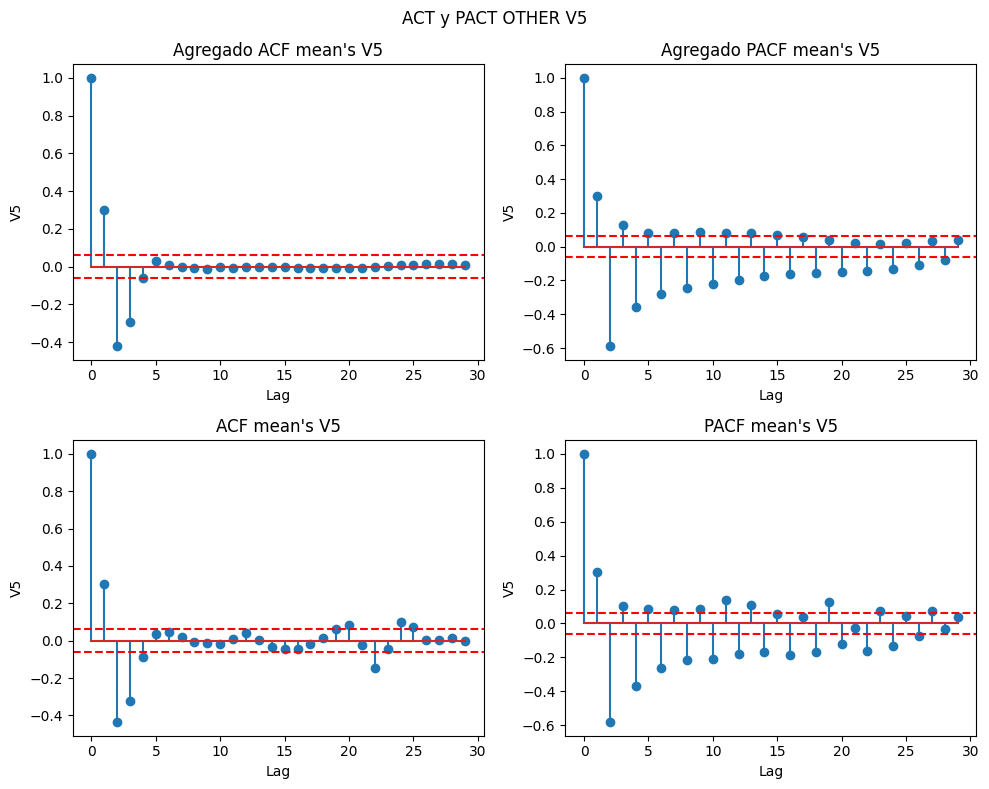

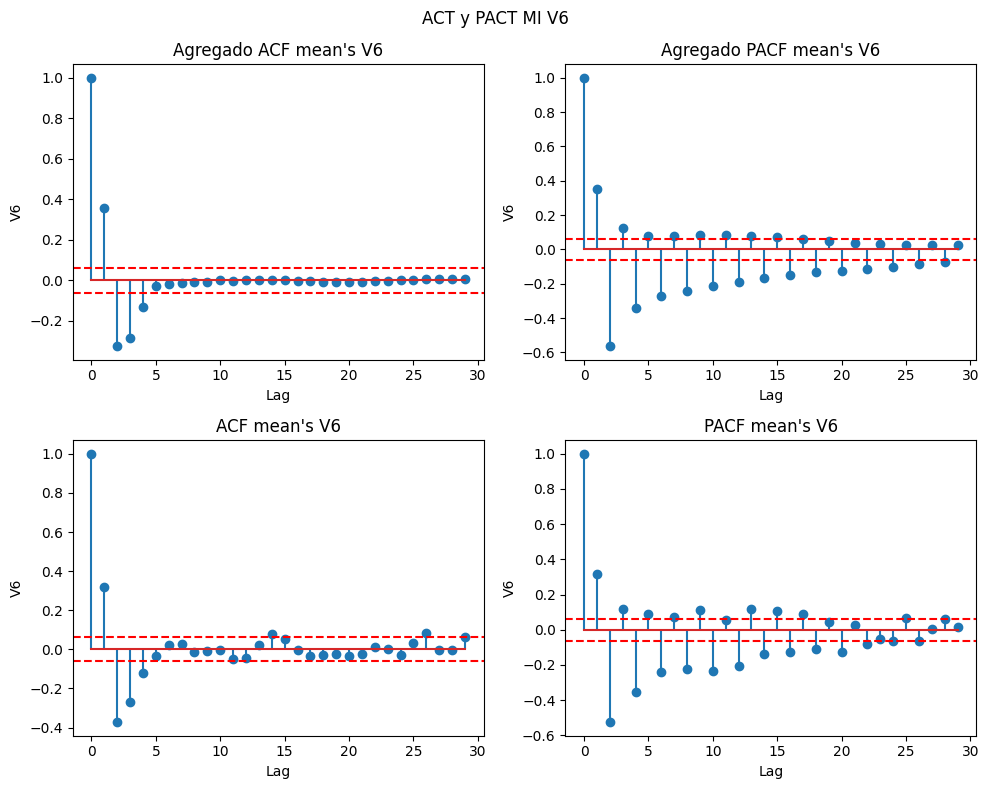

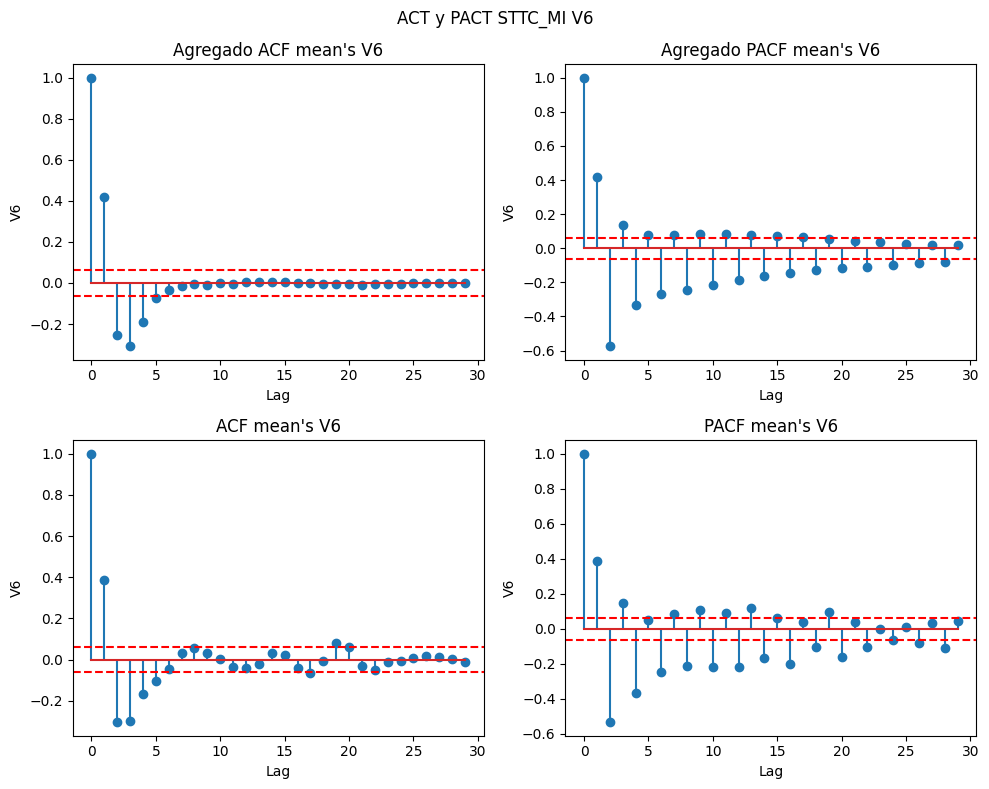

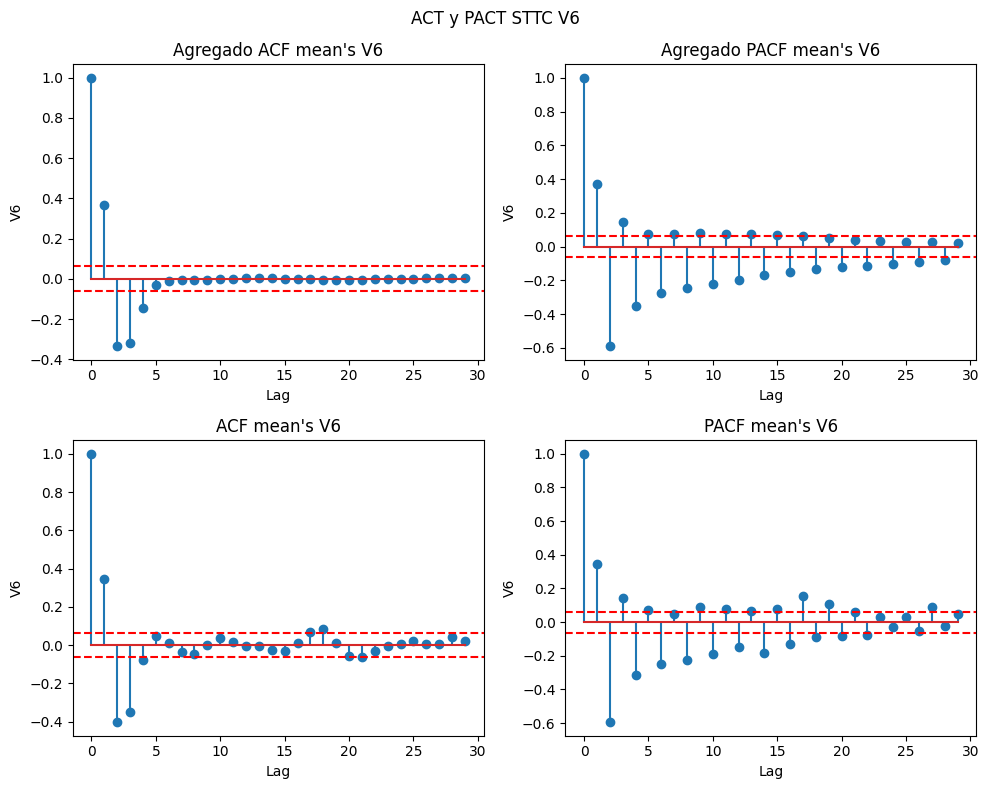

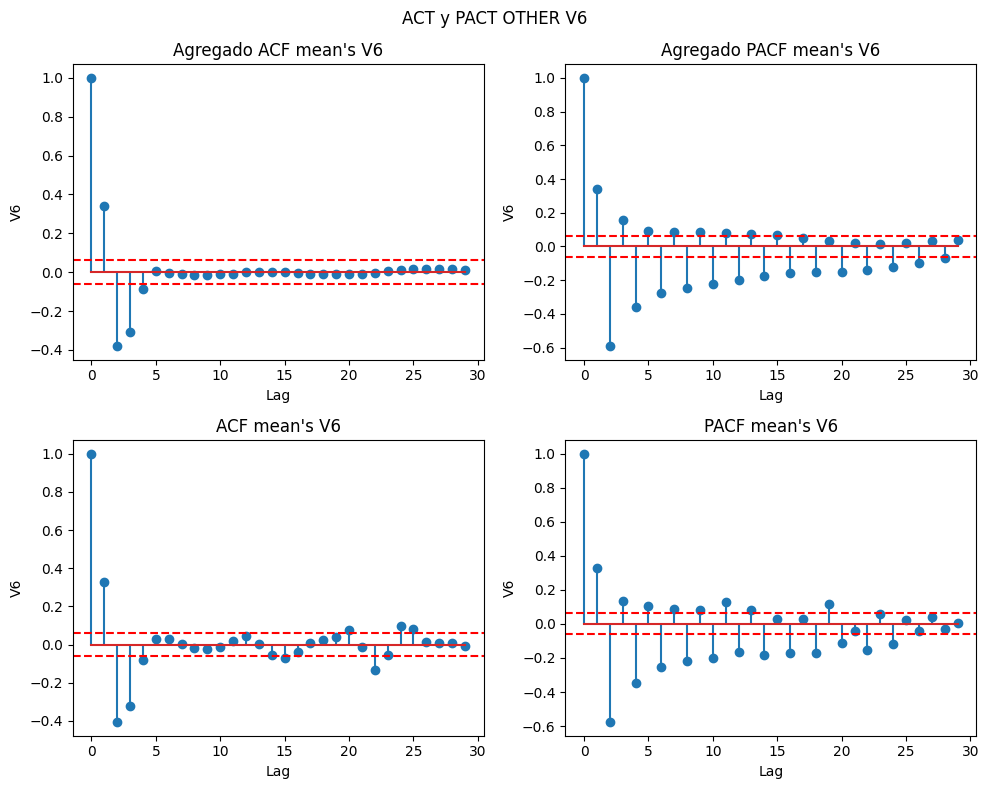

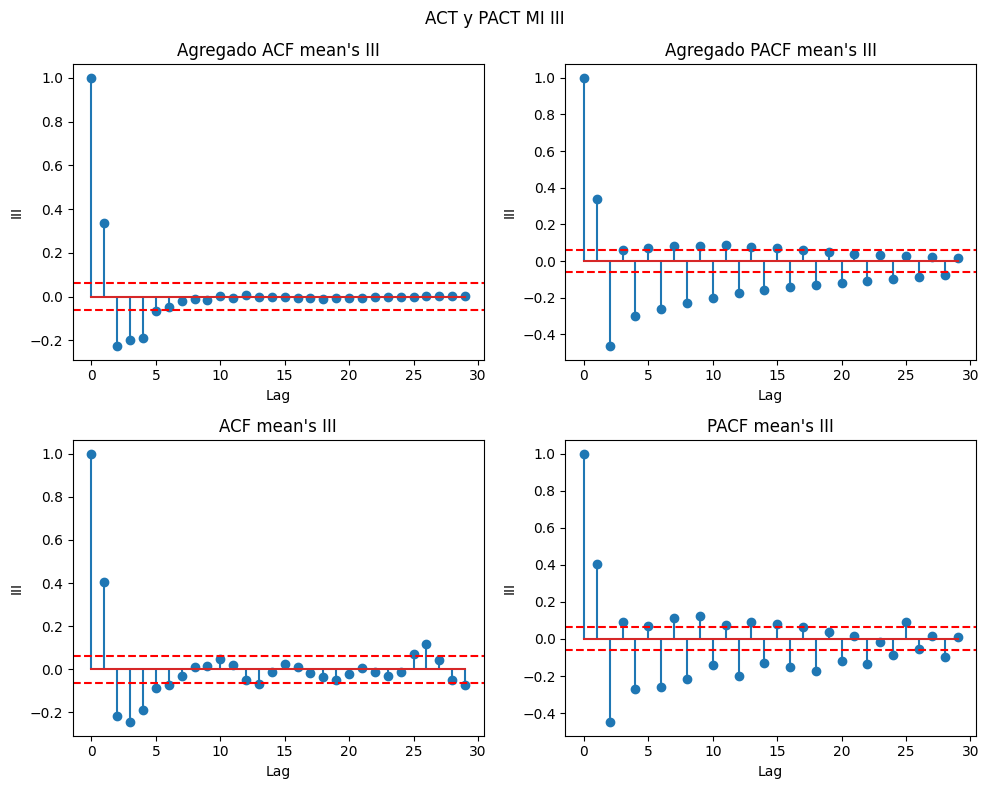

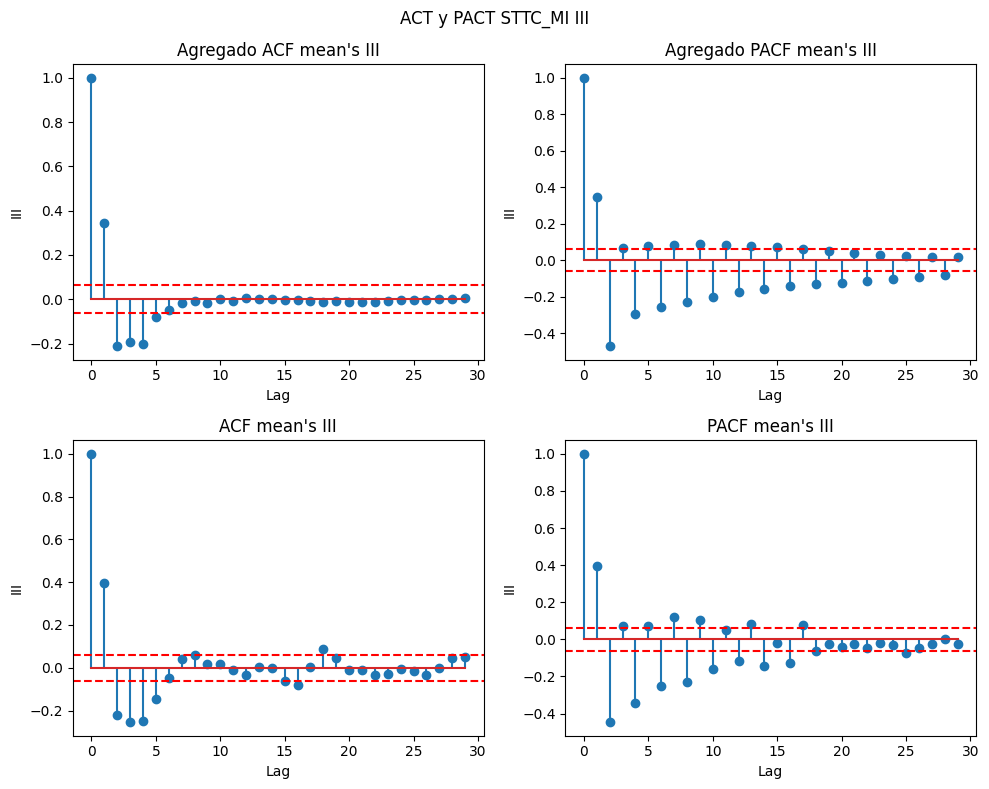

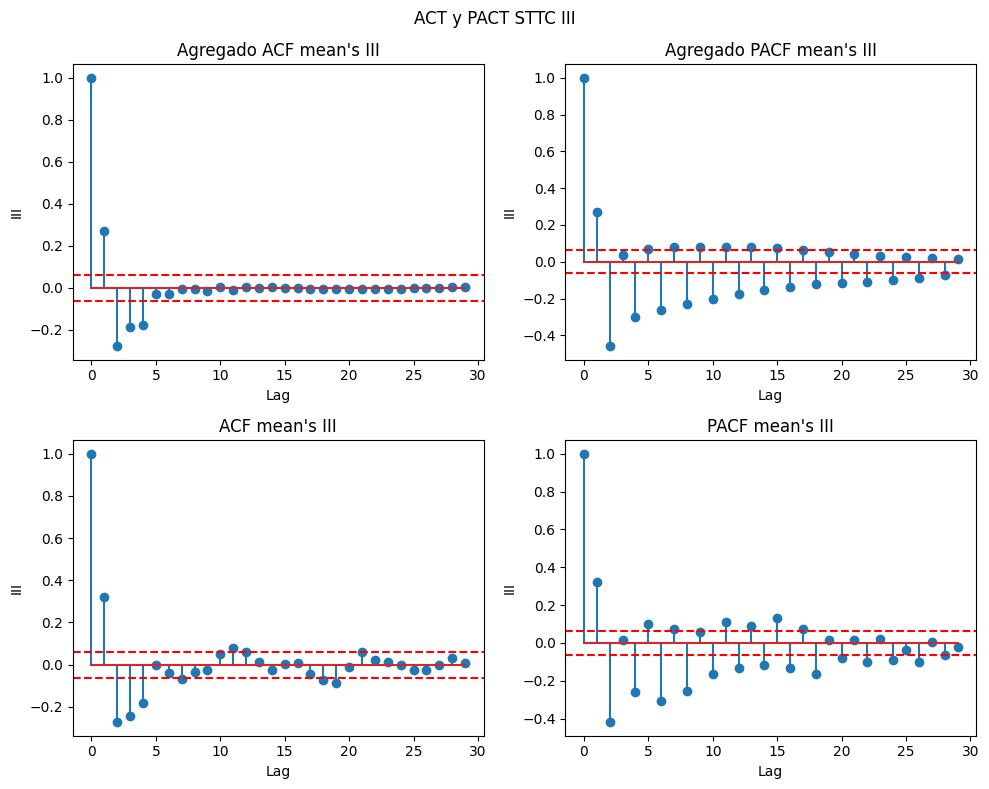

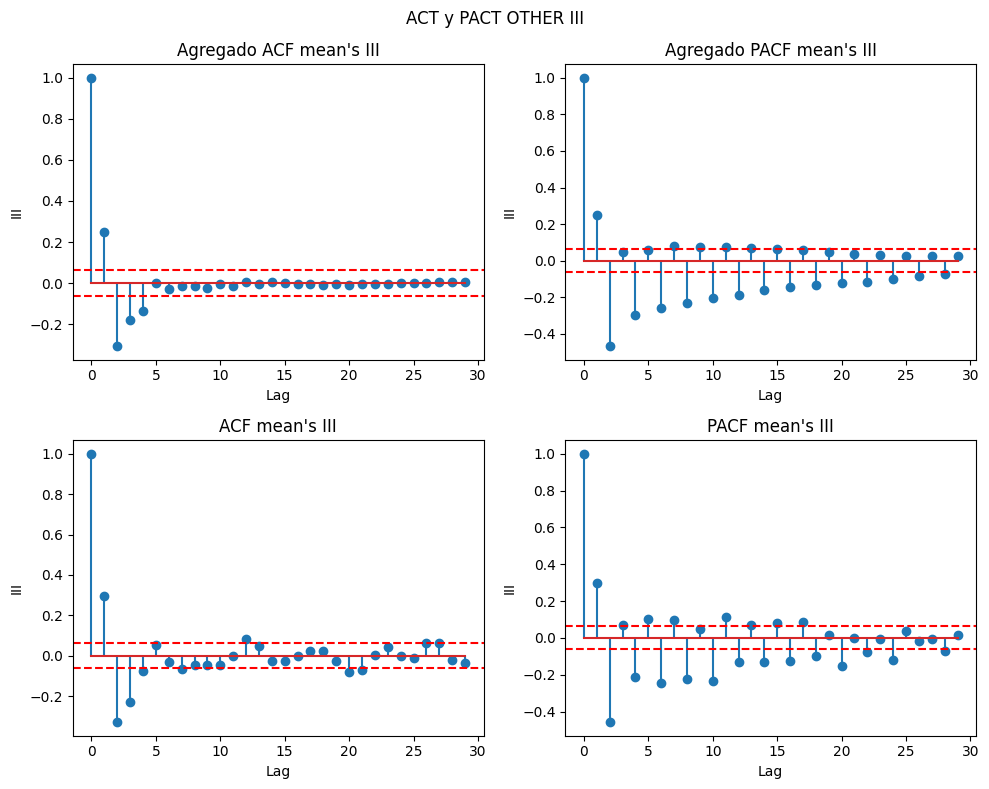

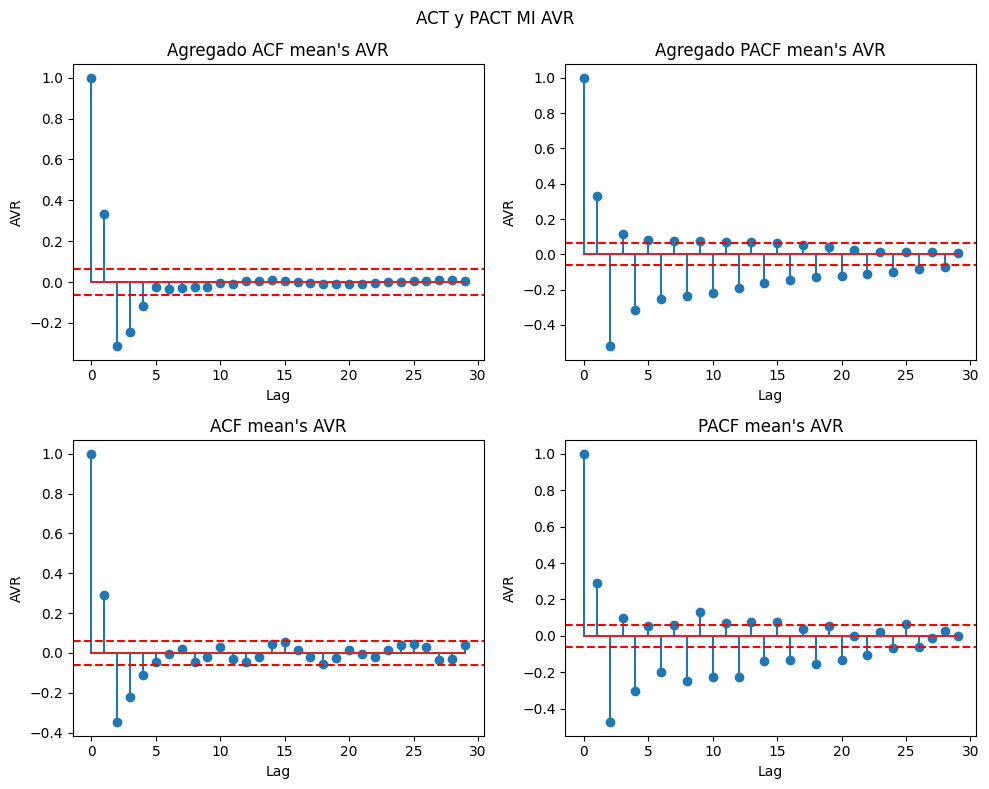

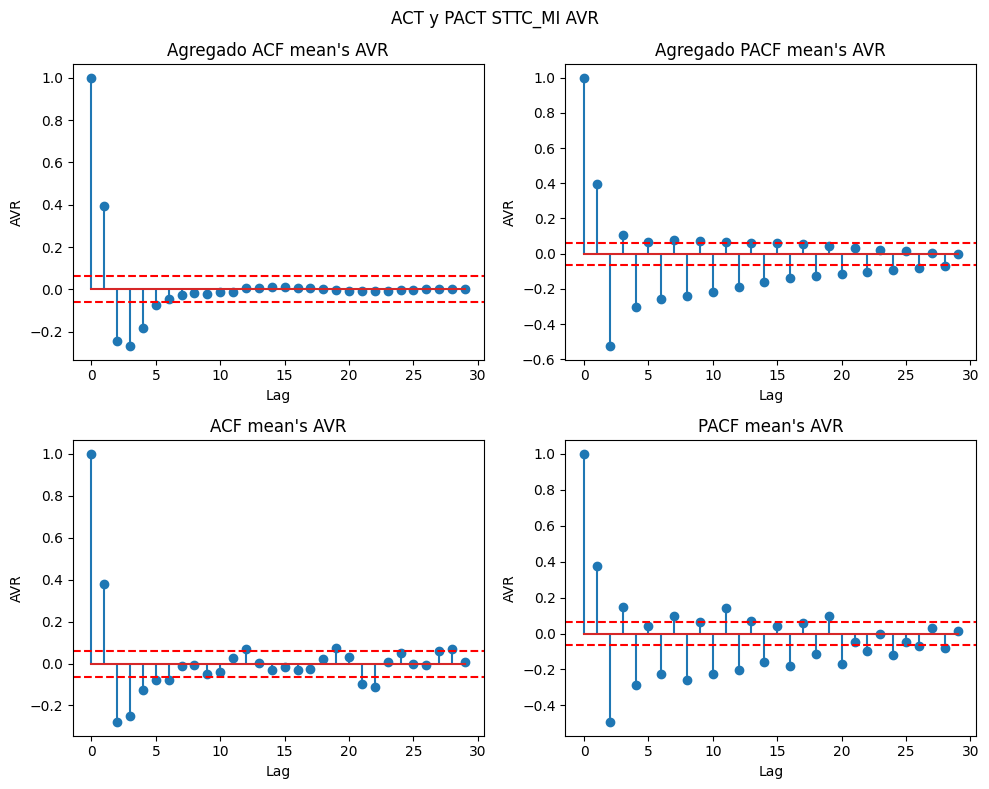

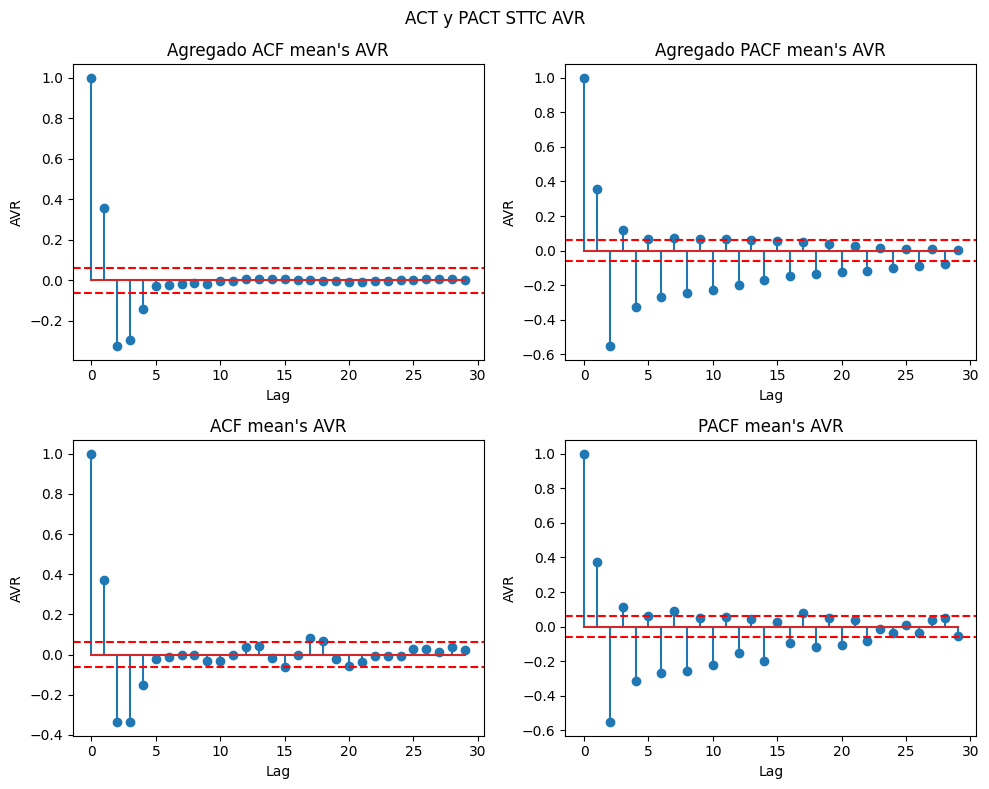

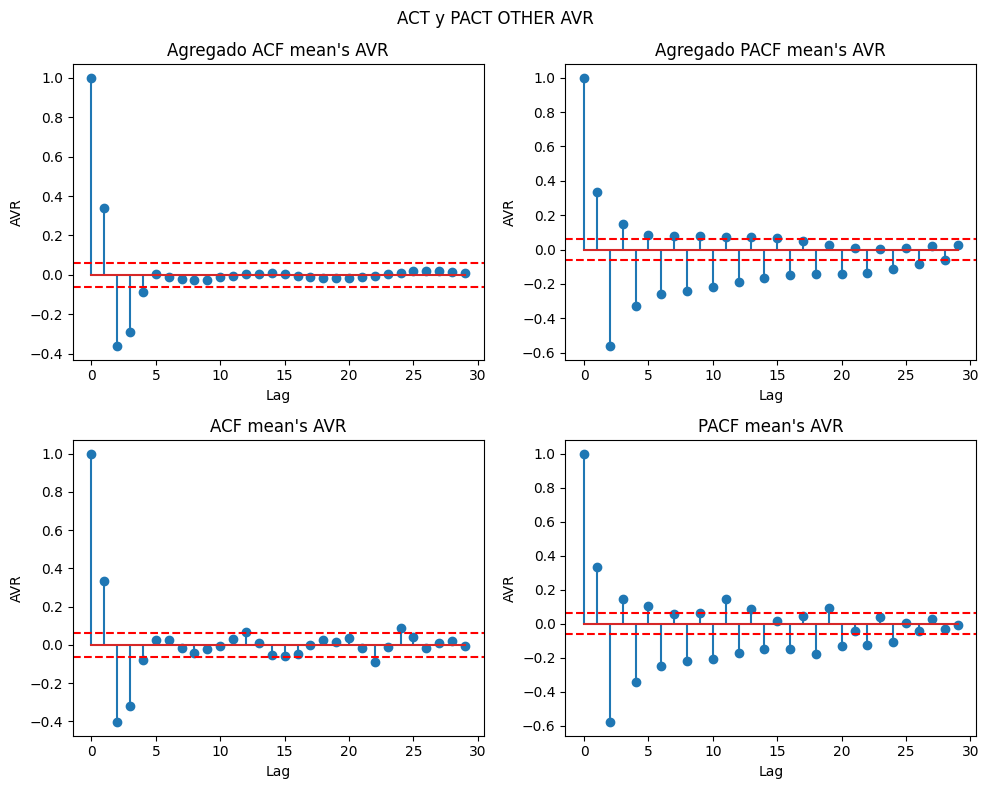

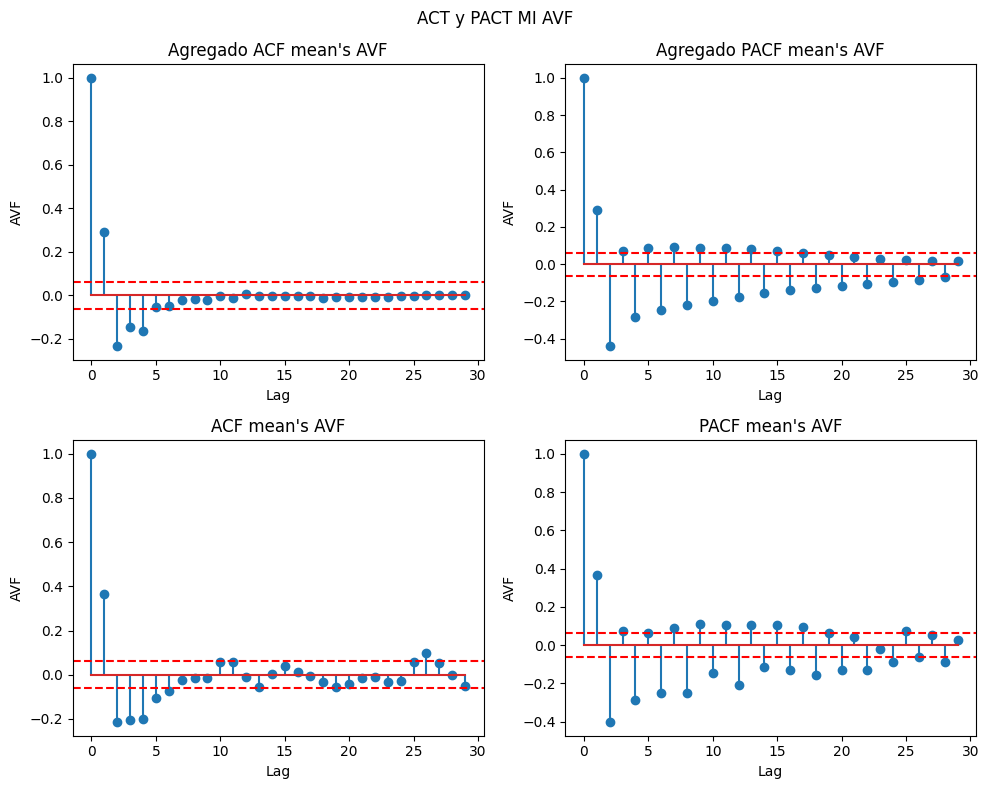

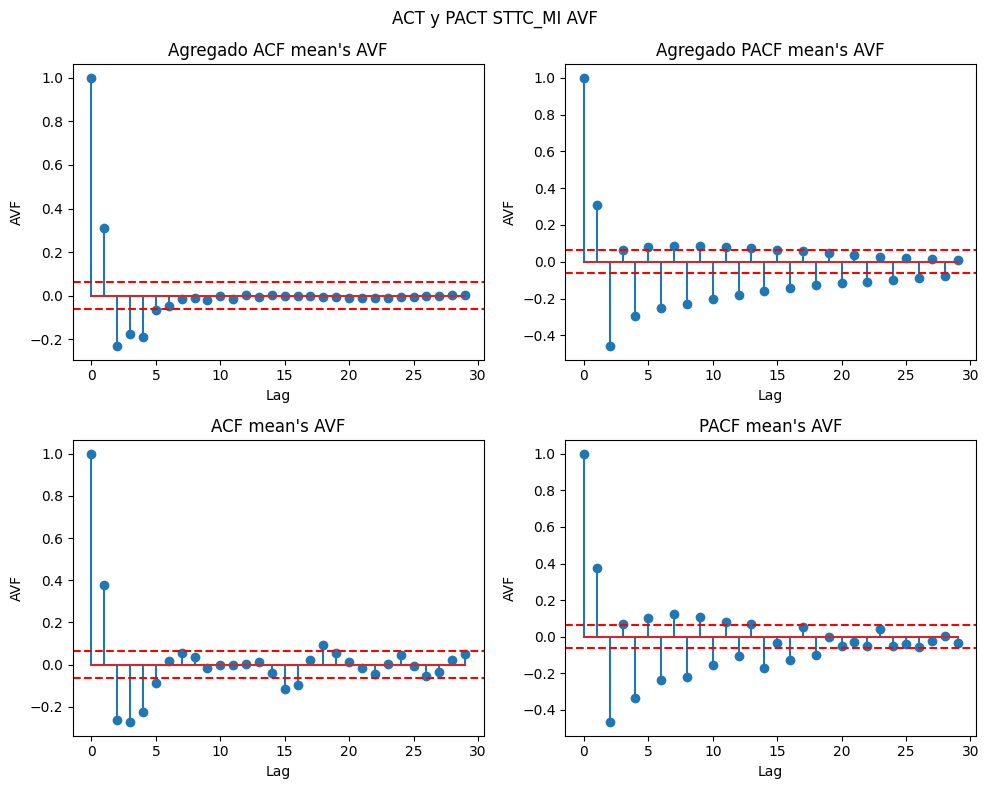

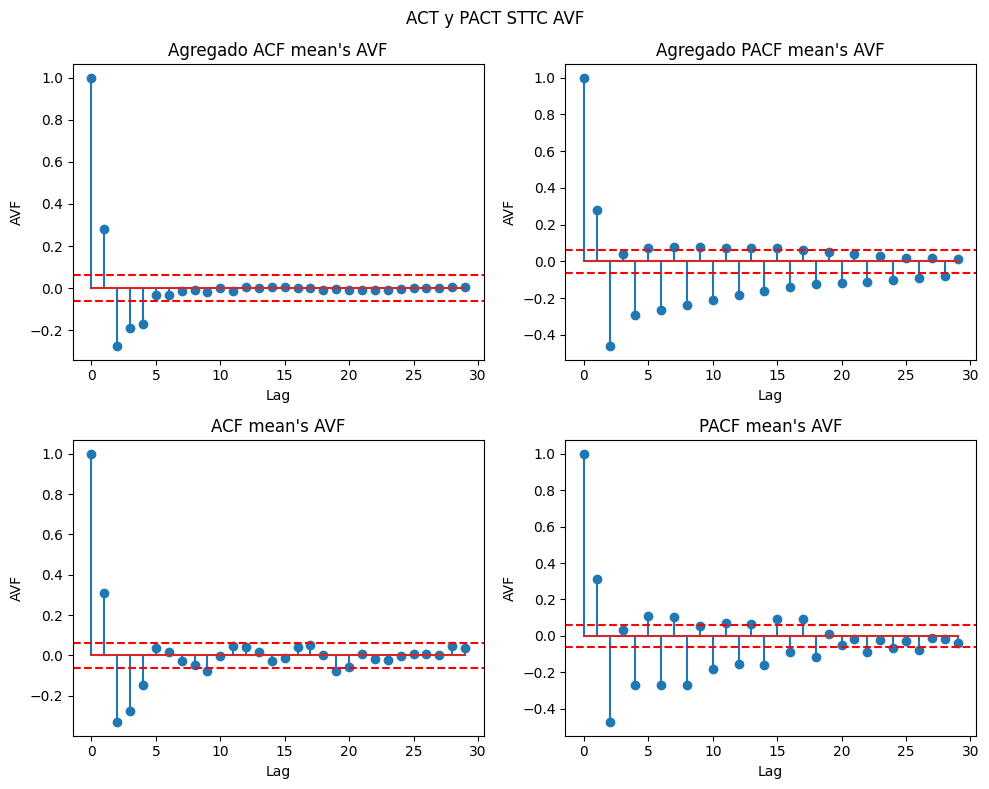

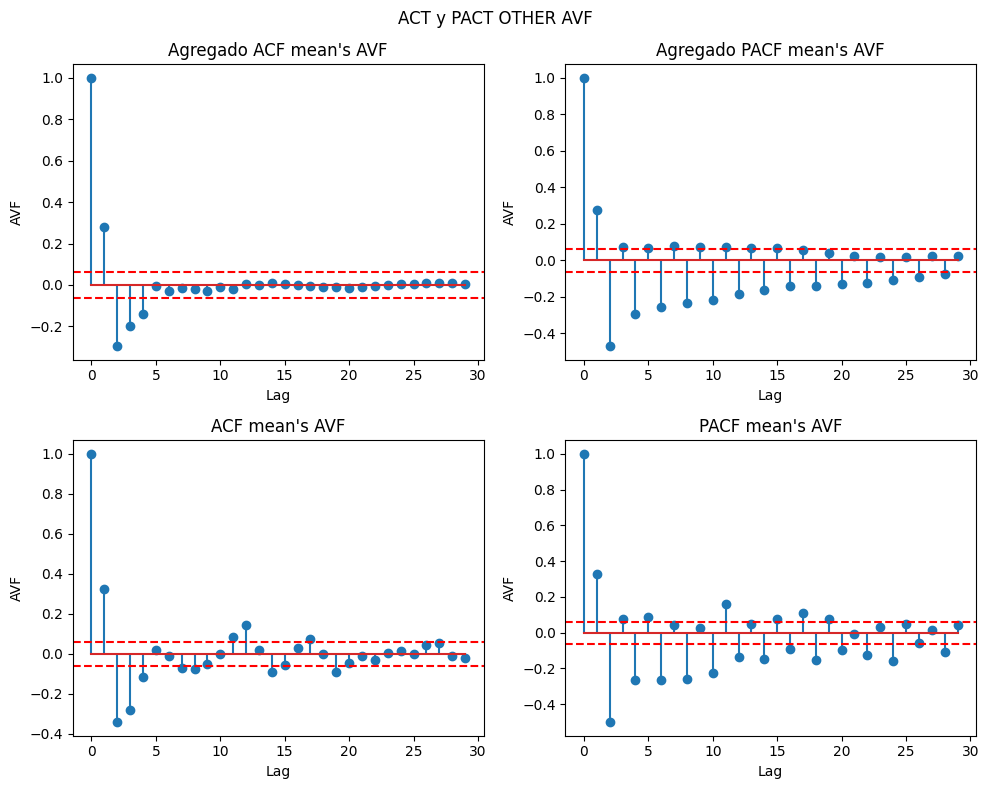

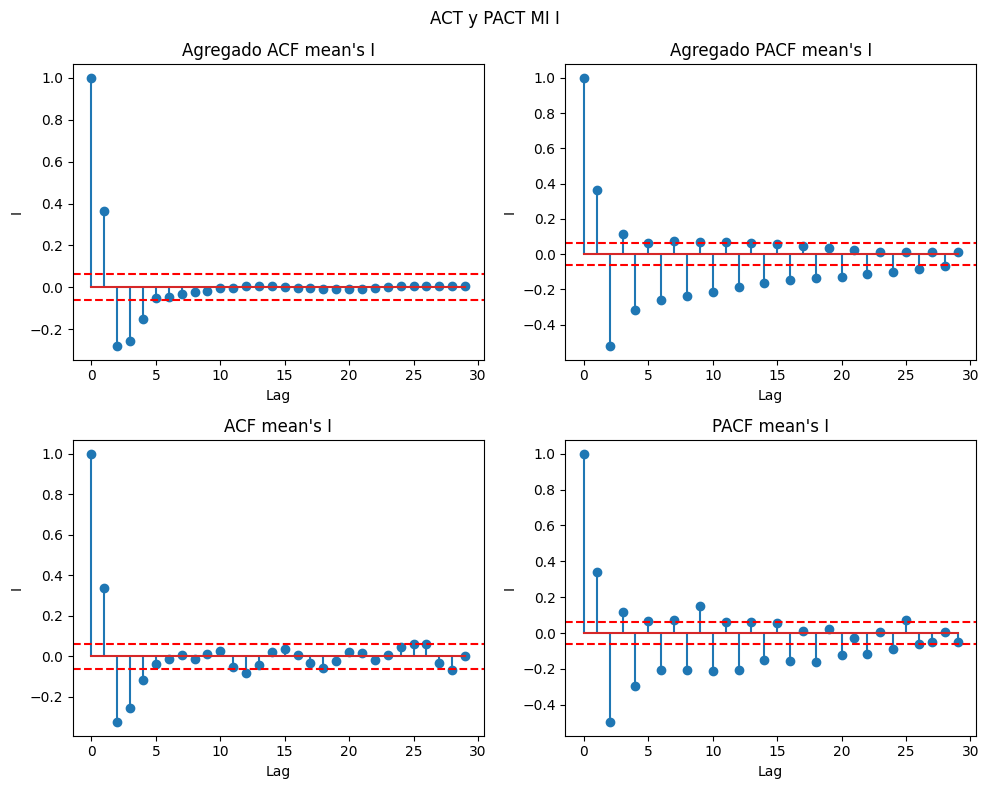

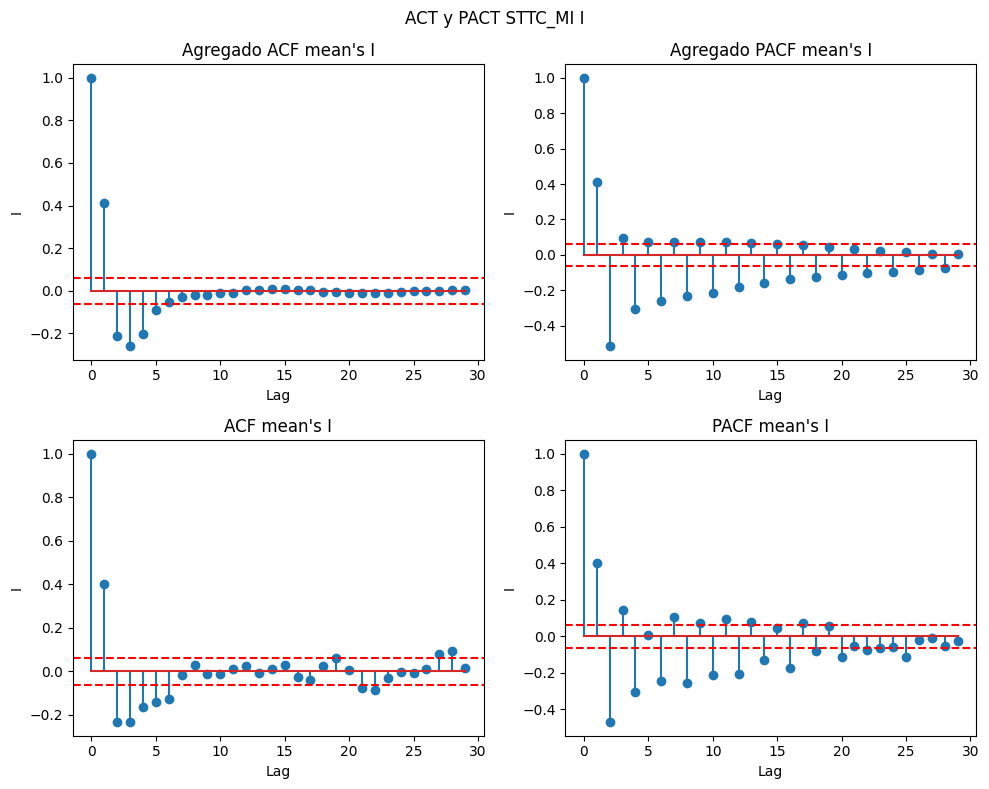

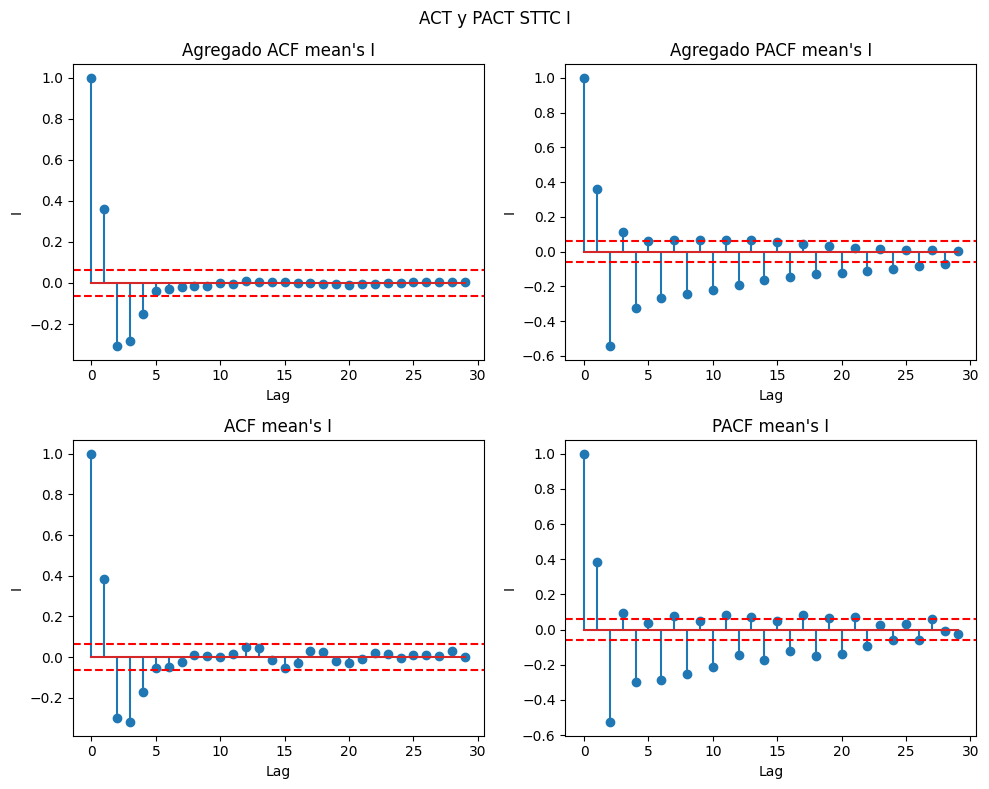

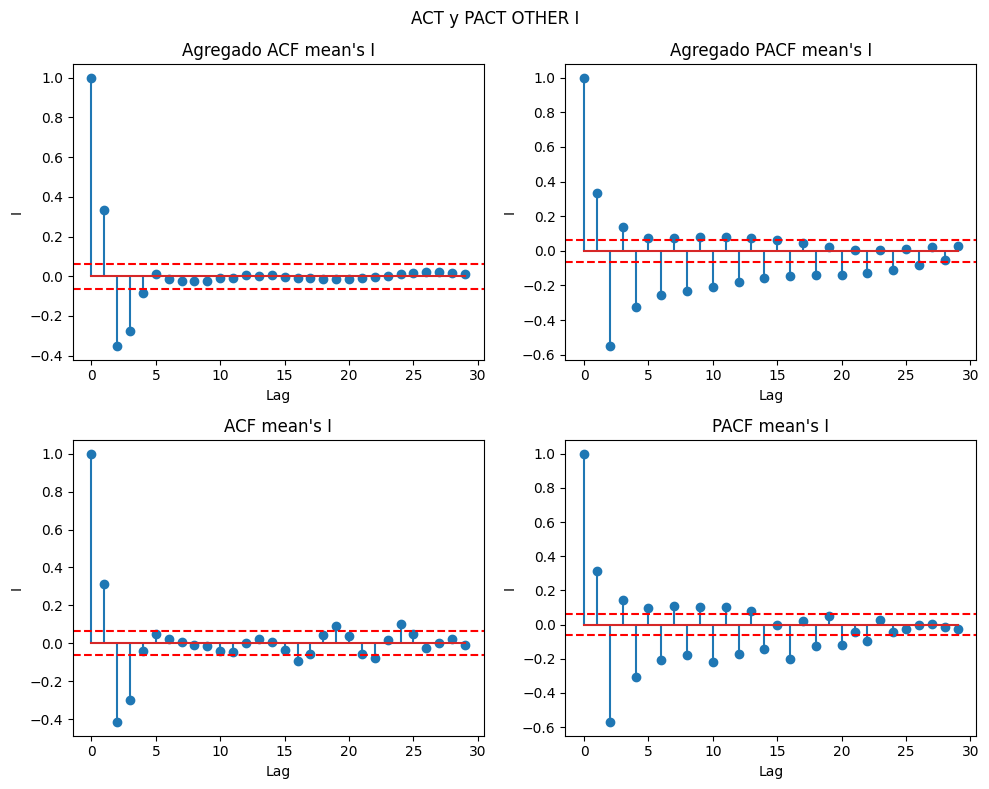

In [14]:
for label in list_signals:
    for cat_signal, df_signal in df_signal_dict.items():
        plot_acf_pact_analysis(df_signal, label, apply_diff = True, method = "ywm", clase = cat_signal, intervalo_confianza = True)

## <a id = '4'>  Análisis descomposición de series </a>
[índice](#0)

Con la descomposición de la serie, revisar cada cuánto pasan los periodos estacionales

In [21]:
mi_seasonal = seasonal_decompose(pd.Series(get_estadisticas(df_mi_signals["II"])["mean"]),period = 100).seasonal
sttc_mi_seasonal = seasonal_decompose(pd.Series(get_estadisticas(df_sttc_mi_signals["II"])["mean"]),period = 100).seasonal
sttc_seasonal = seasonal_decompose(pd.Series(get_estadisticas(df_sttc_signals["II"])["mean"]),period = 100).seasonal
other_seasonal = seasonal_decompose(pd.Series(get_estadisticas(df_other_signals["II"])["mean"]),period = 100).seasonal

### <a id = '4d1'> Máximos y mínimos globales de la descomposición estacional </a>

In [22]:
print("MI")
print(get_peaks_seasonal(mi_seasonal))
print("STTC MI")
print(get_peaks_seasonal(sttc_mi_seasonal))
print("STTC")
print(get_peaks_seasonal(sttc_seasonal))
print("OTHER")
print(get_peaks_seasonal(other_seasonal))

MI
[1, 55, 101, 155, 201, 255, 301, 355, 401, 455, 501, 555, 601, 655, 701, 755, 801, 855, 901, 955]
STTC MI
[59, 67, 159, 167, 259, 267, 359, 367, 459, 467, 559, 567, 659, 667, 759, 767, 859, 867, 959, 967]
STTC
[9, 17, 43, 109, 117, 143, 209, 217, 243, 309, 317, 343, 409, 417, 443, 509, 517, 543, 609, 617, 643, 709, 717, 743, 809, 817, 843, 909, 917, 943]
OTHER
[46, 65, 146, 165, 246, 265, 346, 365, 446, 465, 546, 565, 646, 665, 746, 765, 846, 865, 946, 965]


In [23]:
print((get_list_jumps(get_peaks_seasonal(mi_seasonal))))
print((get_list_jumps(get_peaks_seasonal(sttc_mi_seasonal))))
print((get_list_jumps(get_peaks_seasonal(sttc_seasonal))))
print((get_list_jumps(get_peaks_seasonal(other_seasonal))))

[54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54]
[8, 92, 8, 92, 8, 92, 8, 92, 8, 92, 8, 92, 8, 92, 8, 92, 8, 92, 8]
[8, 26, 66, 8, 26, 66, 8, 26, 66, 8, 26, 66, 8, 26, 66, 8, 26, 66, 8, 26, 66, 8, 26, 66, 8, 26, 66, 8, 26]
[19, 81, 19, 81, 19, 81, 19, 81, 19, 81, 19, 81, 19, 81, 19, 81, 19, 81, 19]


In [24]:
mi_seasonal = seasonal_decompose(pd.Series(get_estadisticas(df_mi_signals["II"])["mean"]),period = 100).seasonal
print("MI")
print(get_peaks_seasonal(mi_seasonal))
print((get_list_jumps(get_peaks_seasonal(mi_seasonal))))

MI
[1, 55, 101, 155, 201, 255, 301, 355, 401, 455, 501, 555, 601, 655, 701, 755, 801, 855, 901, 955]
[54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54, 46, 54]


### <a id = '4d2'> Análisis de la preiodicidad en la estacionalidad: Promedios por señal y clase </a>

In [27]:
df_data_jump = genera_df_jumps_signals(get_jumps_signal(df_mi_signals),
                        get_jumps_signal(df_sttc_mi_signals),
                        get_jumps_signal(df_sttc_signals),
                        get_jumps_signal(df_other_signals))

df_data_jump[["MI", "STTC MI", "STTC", "OTHER", "promedio", "std"]] = df_data_jump[["MI", "STTC MI", "STTC", "OTHER", "promedio", "std"]].round(0).astype(int)
dict_data_jump = df_data_jump.set_index("Señal").to_dict()

import json
with open(window_jason, "w") as f:
    json.dump(dict_data_jump, f)  # Guarda en JSON

In [23]:
print(genera_df_jumps_signals(get_jumps_signal(df_mi_signals),
                        get_jumps_signal(df_sttc_mi_signals),
                        get_jumps_signal(df_sttc_signals),
                        get_jumps_signal(df_other_signals)))

   Señal          MI     STTC MI        STTC       OTHER   promedio        std
0    AVL   48.210526   33.448276  100.000000   31.793103  53.362976  31.955252
1     V3  100.000000   48.842105   25.205128   32.551724  51.649739  33.712916
2     V1  100.000000  100.000000   25.025641   50.000000  68.756410  37.490029
3     V2   33.379310  100.000000   50.000000   50.000000  58.344828  28.854247
4     II   50.210526   47.789474   32.206897   48.368421  44.643829   8.355299
5     V4   25.358974   19.897959  100.000000  100.000000  61.314233  44.726076
6     V5   24.487179   24.025641   19.918367   31.827586  25.064694   4.954276
7     V6   25.384615   24.307692   33.379310  100.000000  45.767905  36.380474
8    III   19.693878   50.368421   24.358974  100.000000  48.605318  36.825165
9    AVR   24.487179   31.551724   32.206897   32.275862  30.130416   3.776283
10   AVF   32.068966   50.263158   32.965517   48.368421  40.916515   9.736326
11     I   32.965517   31.551724   33.689655   34.21

In [26]:
print(genera_df_jumps_signals(get_jumps_signal(df_mi_signals),
                        get_jumps_signal(df_sttc_mi_signals),
                        get_jumps_signal(df_sttc_signals),
                        get_jumps_signal(df_other_signals)).to_markdown())

|    | Señal   |       MI |   STTC MI |     STTC |    OTHER |   promedio |      std |
|---:|:--------|---------:|----------:|---------:|---------:|-----------:|---------:|
|  0 | AVL     |  48.2105 |   33.4483 | 100      |  31.7931 |    53.363  | 31.9553  |
|  1 | V3      | 100      |   48.8421 |  25.2051 |  32.5517 |    51.6497 | 33.7129  |
|  2 | V1      | 100      |  100      |  25.0256 |  50      |    68.7564 | 37.49    |
|  3 | V2      |  33.3793 |  100      |  50      |  50      |    58.3448 | 28.8542  |
|  4 | II      |  50.2105 |   47.7895 |  32.2069 |  48.3684 |    44.6438 |  8.3553  |
|  5 | V4      |  25.359  |   19.898  | 100      | 100      |    61.3142 | 44.7261  |
|  6 | V5      |  24.4872 |   24.0256 |  19.9184 |  31.8276 |    25.0647 |  4.95428 |
|  7 | V6      |  25.3846 |   24.3077 |  33.3793 | 100      |    45.7679 | 36.3805  |
|  8 | III     |  19.6939 |   50.3684 |  24.359  | 100      |    48.6053 | 36.8252  |
|  9 | AVR     |  24.4872 |   31.5517 |  32.2069 |  32

In [27]:
df_signal_dict = {"MI": df_mi_signals,
                  "STTC_MI": df_sttc_mi_signals, 
                  "STTC": df_sttc_signals, 
                  "OTHER": df_other_signals}

### <a id = '4d3'> Descomposición de series (Estacionalidad) </a>

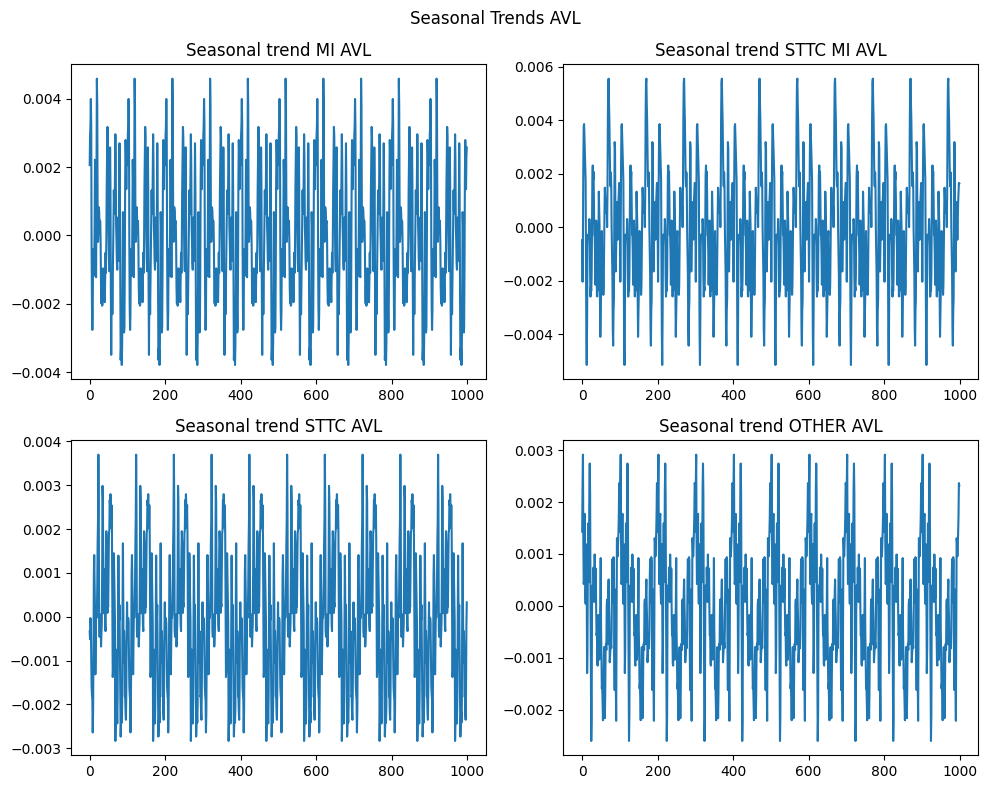

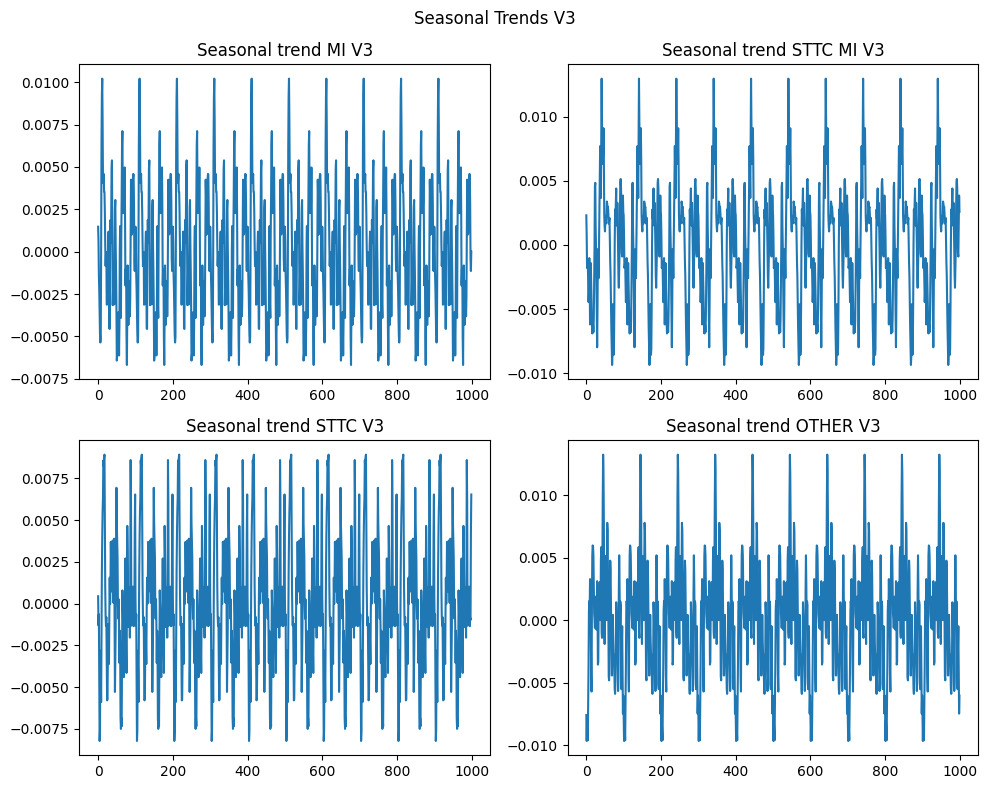

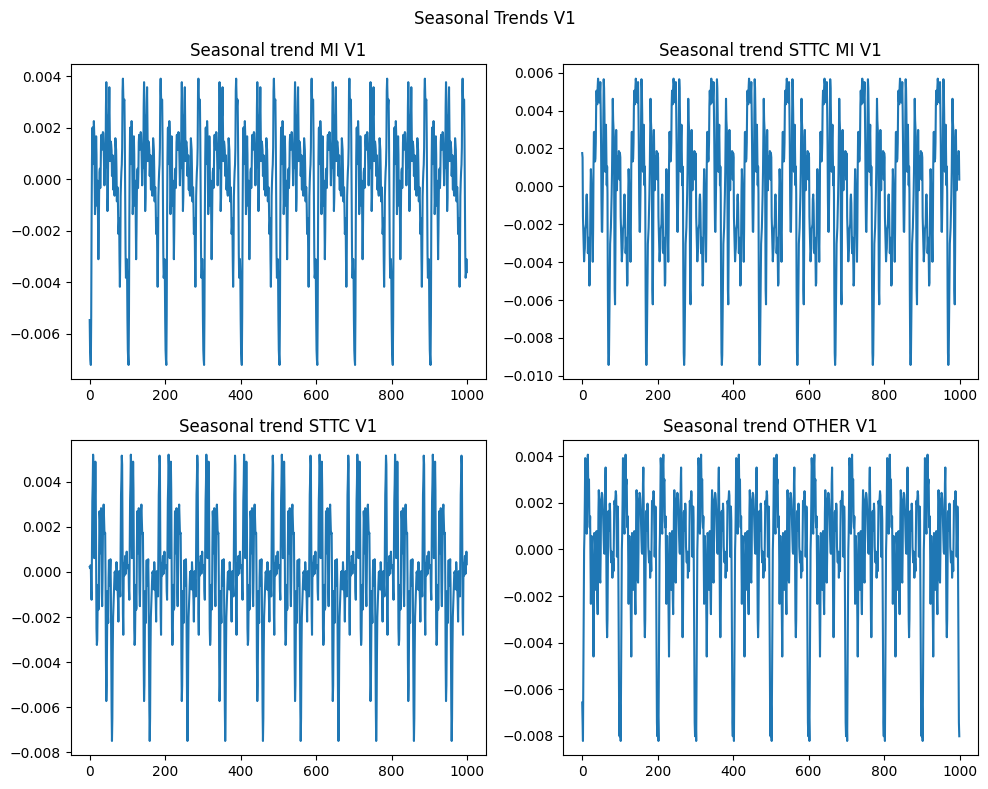

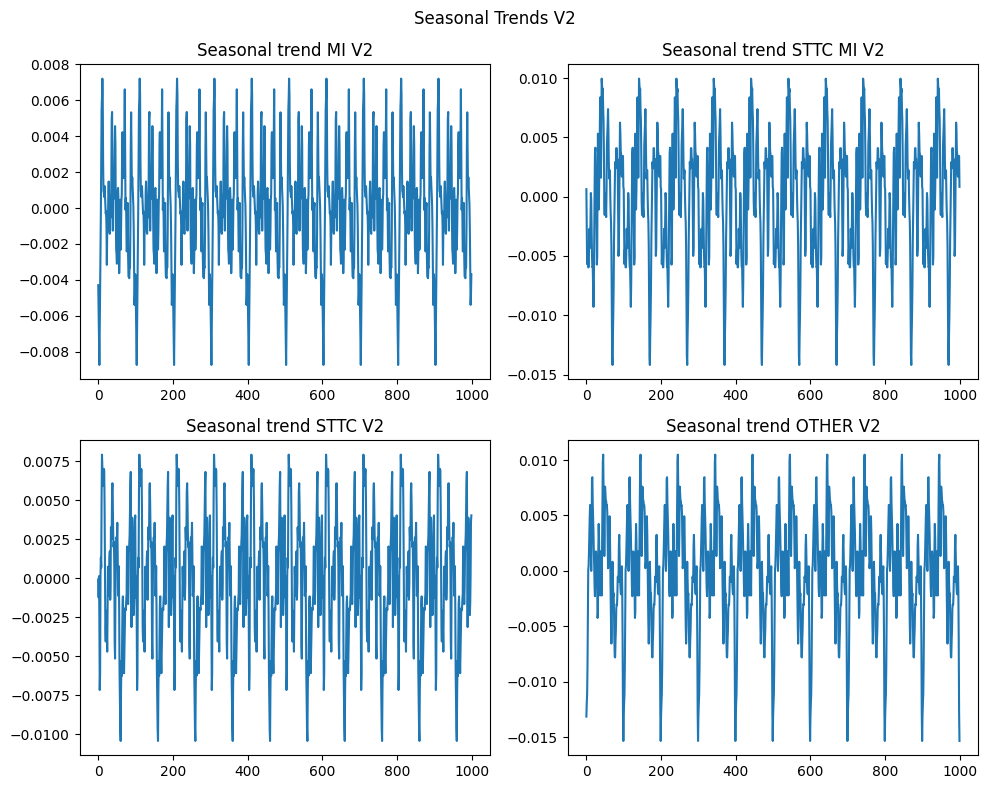

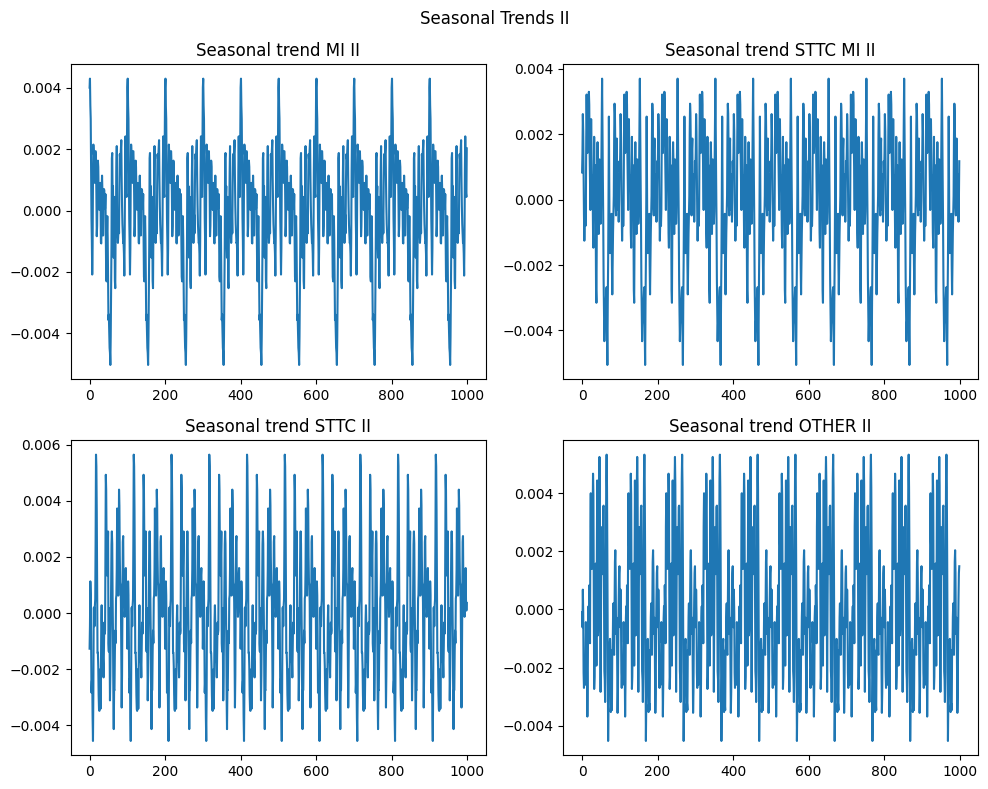

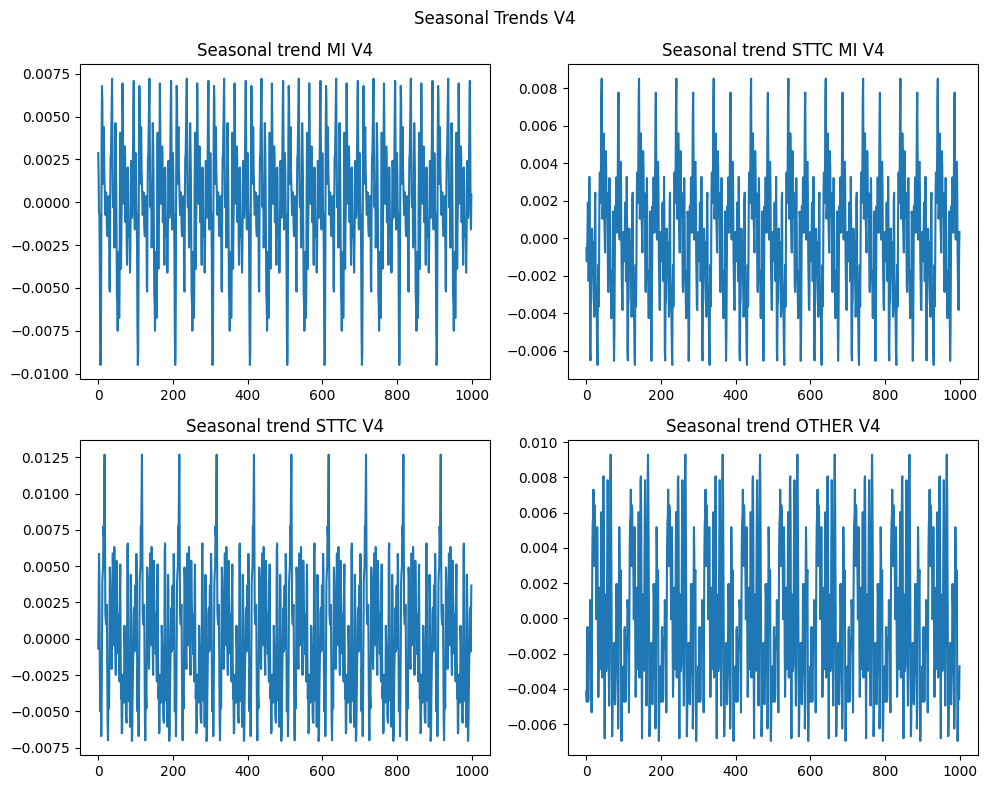

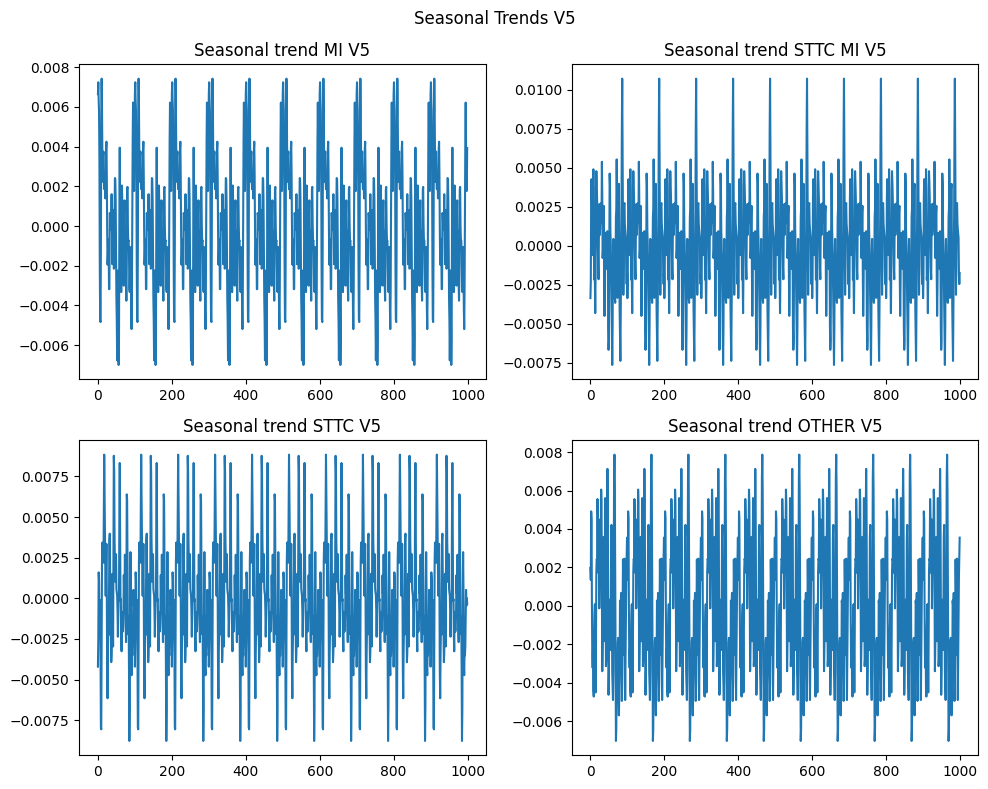

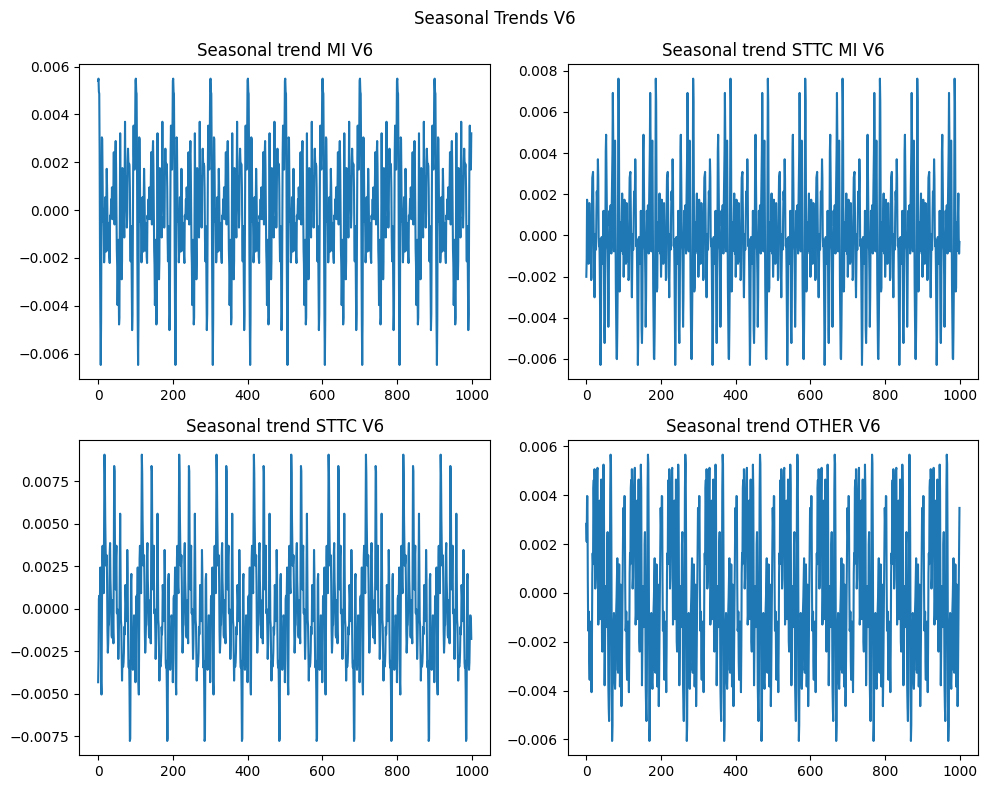

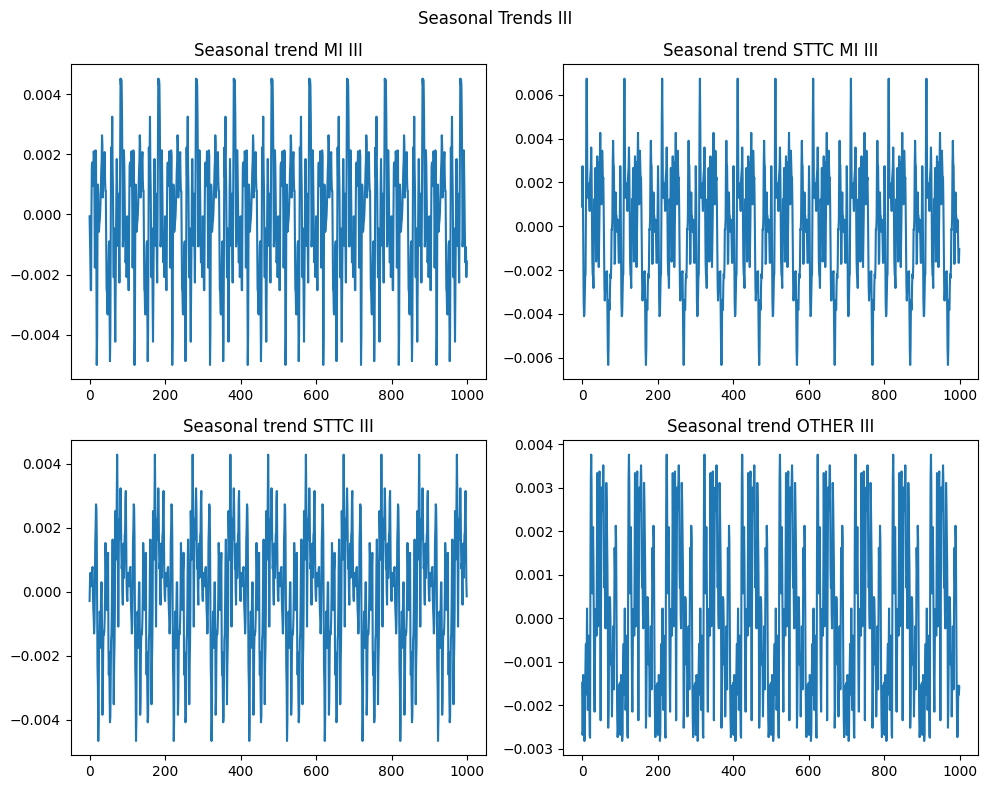

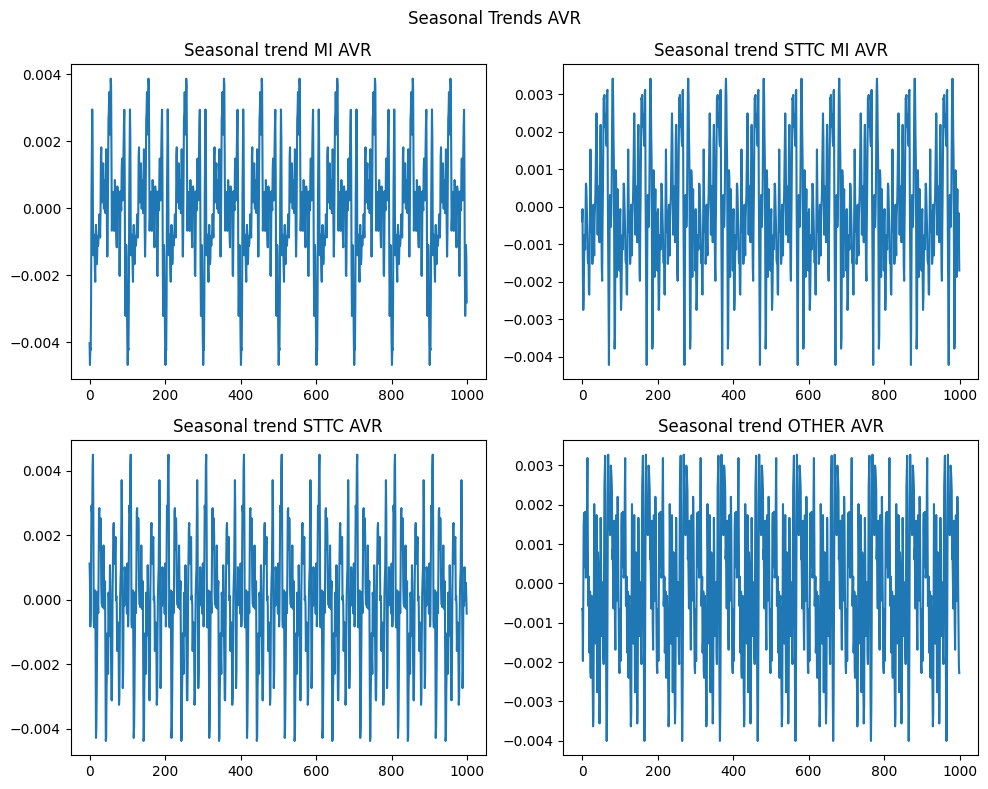

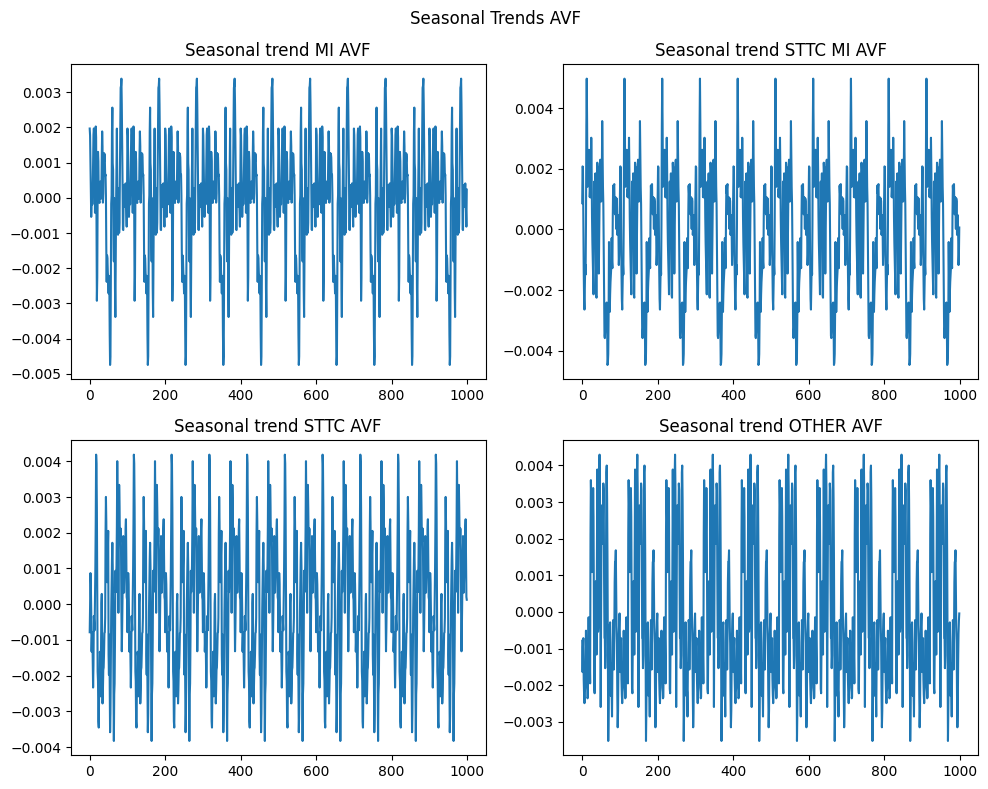

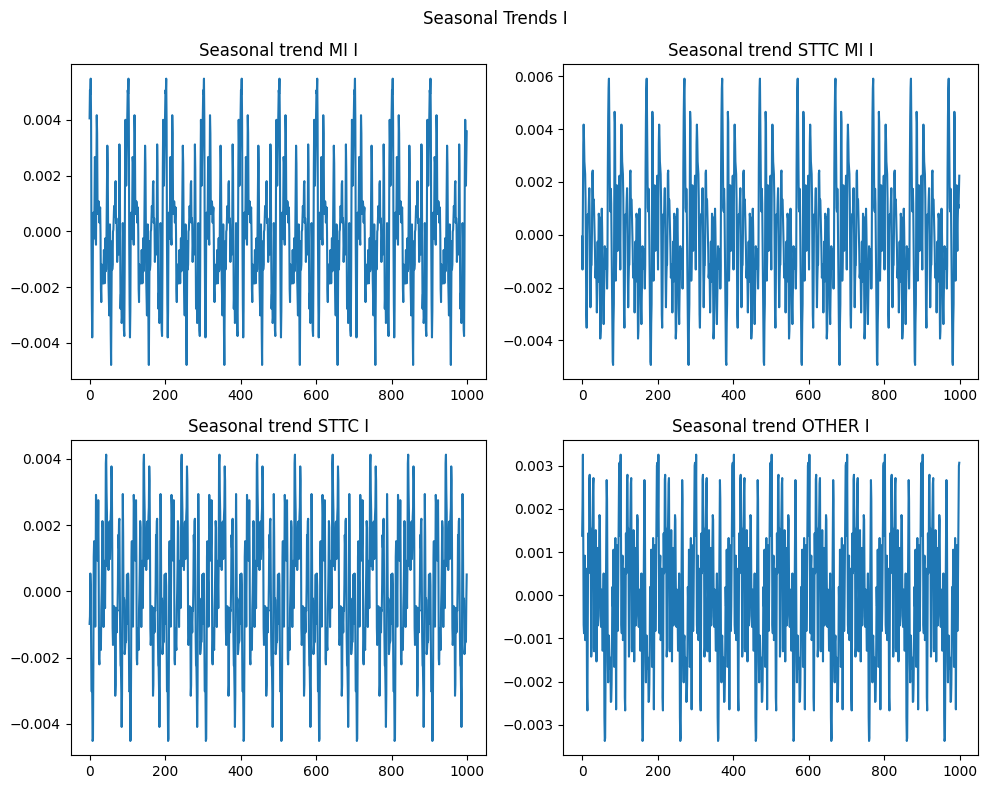

In [30]:
for label in list_signals:
    plot_seasonal_analysis(df_mi_signals, df_sttc_mi_signals, df_sttc_signals, df_other_signals, label = label)